In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error
)

from xgboost import XGBRegressor

import joblib


df = pd.read_csv("../data/clean/tiempos_final.csv")

df.head()

,zona,atraccion,tiempo_espera,abierta,ultima_actualizacion,fecha,hora,dia_semana,mes,fin_de_semana,temperatura,humedad,sensacion_termica,codigo_clima,temporada
0,Cartoon Village,A Toda Máquina,5,True,2025-10-30 15:25:08+00:00,2025-10-30,16:26:19,Thursday,10.0,False,17.2,71.0,16.5,2.0,baja
1,Cartoon Village,Academia de Pilotos Baby Looney Tunes,0,False,2025-10-30 15:25:08+00:00,2025-10-30,16:26:19,Thursday,10.0,False,17.2,71.0,16.5,2.0,baja
2,Cartoon Village,Cartoon Carousel,5,True,2025-10-30 15:25:08+00:00,2025-10-30,16:26:19,Thursday,10.0,False,17.2,71.0,16.5,2.0,baja
3,Cartoon Village,Convoy de Camiones,0,False,2025-10-30 15:25:08+00:00,2025-10-30,16:26:19,Thursday,10.0,False,17.2,71.0,16.5,2.0,baja
4,Cartoon Village,Correcaminos Bip Bip,15,True,2025-10-30 15:25:08+00:00,2025-10-30,16:26:19,Thursday,10.0,False,17.2,71.0,16.5,2.0,baja


In [2]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['dia_semana_num'] = df['fecha'].dt.weekday
df['mes'] = df['fecha'].dt.month

In [3]:
df.drop(columns=["dia_semana"])

,zona,atraccion,tiempo_espera,abierta,ultima_actualizacion,fecha,hora,mes,fin_de_semana,temperatura,humedad,sensacion_termica,codigo_clima,temporada,dia_semana_num
0,Cartoon Village,A Toda Máquina,5,True,2025-10-30 15:25:08+00:00,2025-10-30,16:26:19,10,False,17.2,71.0,16.5,2.0,baja,3
1,Cartoon Village,Academia de Pilotos Baby Looney Tunes,0,False,2025-10-30 15:25:08+00:00,2025-10-30,16:26:19,10,False,17.2,71.0,16.5,2.0,baja,3
2,Cartoon Village,Cartoon Carousel,5,True,2025-10-30 15:25:08+00:00,2025-10-30,16:26:19,10,False,17.2,71.0,16.5,2.0,baja,3
3,Cartoon Village,Convoy de Camiones,0,False,2025-10-30 15:25:08+00:00,2025-10-30,16:26:19,10,False,17.2,71.0,16.5,2.0,baja,3
4,Cartoon Village,Correcaminos Bip Bip,15,True,2025-10-30 15:25:08+00:00,2025-10-30,16:26:19,10,False,17.2,71.0,16.5,2.0,baja,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,Movie World Studios,Cine Tour,5,True,2025-10-22 14:05:09+00:00,2025-10-22,14:05,10,False,21.7,51.0,19.2,2.0,alta,2
1426,Movie World Studios,Hotel Embrujado,5,True,2025-10-22 14:05:09+00:00,2025-10-22,14:05,10,False,21.7,51.0,19.2,2.0,alta,2
1427,Movie World Studios,Stunt Fall,10,True,2025-10-22 14:05:09+00:00,2025-10-22,14:05,10,False,21.7,51.0,19.2,2.0,alta,2
1428,Old West Territory,Coaster Express,5,True,2025-10-22 14:05:09+00:00,2025-10-22,14:05,10,False,21.7,51.0,19.2,2.0,alta,2


In [4]:
df["hora"] = pd.to_datetime(df["hora"])
df["hora_num"] = df["hora"].dt.hour


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3512\2981074928.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hora"] = pd.to_datetime(df["hora"])


In [5]:
df = df.drop(columns=["hora"]) 


In [6]:
df = df.drop(columns=["ultima_actualizacion", "fecha"])

In [7]:
df = df.drop(columns=["abierta"])

In [8]:
df["fin_de_semana"] = df["fin_de_semana"].astype(int)
df = df.drop(columns=["dia_semana"])


In [9]:
df["temporada"] = df["temporada"].map({"baja": 0, "media":1, "alta": 2})

In [10]:
df.isna().sum()

zona                 0
atraccion            0
tiempo_espera        0
mes                  0
fin_de_semana        0
temperatura          0
humedad              0
sensacion_termica    0
codigo_clima         0
temporada            0
dia_semana_num       0
hora_num             0
dtype: int64

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Tus columnas categóricas
categorical_features = ['zona', 'atraccion']

# Inicializar OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Ajustar y transformar
ohe_array = ohe.fit_transform(df[categorical_features])

# Obtener nombres de las nuevas columnas
ohe_columns = ohe.get_feature_names_out(categorical_features)

# Crear DataFrame con las columnas codificadas
df_ohe = pd.DataFrame(ohe_array, columns=ohe_columns, index=df.index)

# Concatenar con el DataFrame original (opcional: puedes quitar las columnas originales)
df_final = pd.concat([df.drop(columns=categorical_features), df_ohe], axis=1)

# Hacer un sample de 10 filas para ver



In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df_final.sample(5)


,tiempo_espera,mes,fin_de_semana,temperatura,humedad,sensacion_termica,codigo_clima,temporada,dia_semana_num,hora_num,zona_Cartoon Village,zona_DC Super Heroes World,zona_Movie World Studios,zona_Old West Territory,atraccion_A Toda Máquina,atraccion_Academia de Pilotos Baby Looney Tunes,atraccion_Batman Gotham City Escape,atraccion_Cartoon Carousel,atraccion_Cataratas Salvajes,atraccion_Cine Tour,atraccion_Coaster Express,atraccion_Convoy de Camiones,atraccion_Correcaminos Bip Bip,atraccion_Emergencias Pato Lucas,atraccion_Escuela de Conducción Yabba-Dabba-Doo,atraccion_He Visto un Lindo Gatito,atraccion_Hotel Embrujado,atraccion_La Aventura de Scooby-Doo,atraccion_La Captura de Gossamer,atraccion_La Venganza del Enigma,atraccion_Lex Luthor Invertatron,atraccion_Looney Tunes Correo Aéreo,atraccion_Los Carros de la Mina,atraccion_Marvin el Marciano Cohetes Espaciales,atraccion_Mr. Freeze Fábrica de Hielo,atraccion_Oso Yogui,atraccion_Pato Lucas Coches Locos,atraccion_Piolín y Silvestre Paseo en Autobús,atraccion_Rápidos ACME,atraccion_Río Bravo,atraccion_Scooby-Doo's Tea Party Mistery,atraccion_Shadows of Arkham,atraccion_Stunt Fall,atraccion_Superman La Atracción de Acero,atraccion_The Joker Coches de Choque,atraccion_Tom & Jerry Picnic en el Parque,atraccion_Wile E. Coyote Zona de Explosión
758,5,11,1,15.4,39.0,12.5,1.0,0,5,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1344,5,10,0,20.9,58.0,19.3,1.0,2,2,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,5,10,0,23.8,40.0,23.4,1.0,2,4,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,5,10,0,20.9,58.0,19.3,1.0,2,2,13,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
516,60,11,1,14.8,44.0,12.3,2.0,0,5,14,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_final.corr()


,tiempo_espera,mes,fin_de_semana,temperatura,humedad,sensacion_termica,codigo_clima,temporada,dia_semana_num,hora_num,zona_Cartoon Village,zona_DC Super Heroes World,zona_Movie World Studios,zona_Old West Territory,atraccion_A Toda Máquina,atraccion_Academia de Pilotos Baby Looney Tunes,atraccion_Batman Gotham City Escape,atraccion_Cartoon Carousel,atraccion_Cataratas Salvajes,atraccion_Cine Tour,atraccion_Coaster Express,atraccion_Convoy de Camiones,atraccion_Correcaminos Bip Bip,atraccion_Emergencias Pato Lucas,atraccion_Escuela de Conducción Yabba-Dabba-Doo,atraccion_He Visto un Lindo Gatito,atraccion_Hotel Embrujado,atraccion_La Aventura de Scooby-Doo,atraccion_La Captura de Gossamer,atraccion_La Venganza del Enigma,atraccion_Lex Luthor Invertatron,atraccion_Looney Tunes Correo Aéreo,atraccion_Los Carros de la Mina,atraccion_Marvin el Marciano Cohetes Espaciales,atraccion_Mr. Freeze Fábrica de Hielo,atraccion_Oso Yogui,atraccion_Pato Lucas Coches Locos,atraccion_Piolín y Silvestre Paseo en Autobús,atraccion_Rápidos ACME,atraccion_Río Bravo,atraccion_Scooby-Doo's Tea Party Mistery,atraccion_Shadows of Arkham,atraccion_Stunt Fall,atraccion_Superman La Atracción de Acero,atraccion_The Joker Coches de Choque,atraccion_Tom & Jerry Picnic en el Parque,atraccion_Wile E. Coyote Zona de Explosión
tiempo_espera,1.000000,-0.010221,0.061782,-0.016148,-0.016752,-0.010327,-0.032660,-0.009553,0.052710,0.009621,-0.023512,0.081498,-0.050934,-0.021181,-0.027202,-0.037052,0.132309,-0.032895,-0.037052,-0.027695,0.036065,-0.037022,0.054357,-0.037022,-0.037052,-0.037022,-0.020393,0.201831,-0.010938,0.023154,-0.037052,-0.019605,-0.028850,-0.037022,-0.023650,-0.037052,-0.037022,-0.037022,-0.037052,-0.037052,-0.037022,0.007538,-0.019053,0.080079,-0.016716,-0.001098,-0.037022
mes,-0.010221,1.000000,0.931083,-0.866074,-0.294724,-0.901571,0.227338,-0.829916,0.794121,-0.007708,0.067926,-0.054604,-0.031340,0.005738,-0.001580,0.063834,-0.022158,-0.031177,0.063834,-0.031177,-0.028080,0.056106,-0.031177,0.056106,0.063834,0.056106,-0.028080,-0.034794,-0.031177,-0.031177,0.063834,-0.031177,-0.031177,0.056106,-0.031177,0.063834,0.056106,0.056106,0.063834,0.063834,0.056106,-0.024939,-0.028568,-0.011903,-0.031177,-0.026348,0.056106
fin_de_semana,0.061782,0.931083,1.000000,-0.845468,-0.290863,-0.867805,0.204057,-0.746181,0.852901,-0.106032,0.053469,-0.043168,-0.025723,0.005941,-0.016144,0.055884,-0.016482,-0.026919,0.055884,-0.026919,-0.023545,0.047917,-0.026919,0.047917,0.055884,0.047917,-0.023545,-0.030272,-0.026919,-0.026919,0.055884,-0.026919,-0.026919,0.047917,-0.026919,0.055884,0.047917,0.047917,0.055884,0.055884,0.047917,-0.020123,-0.023478,-0.005914,-0.026919,-0.019780,0.047917
temperatura,-0.016148,-0.866074,-0.845468,1.000000,-0.136544,0.989870,-0.273338,0.888031,-0.580113,0.143770,-0.094820,0.072682,0.046320,-0.005902,0.015864,-0.084416,0.033584,0.041630,-0.084416,0.041630,0.039328,-0.079293,0.041630,-0.079293,-0.084416,-0.079293,0.040339,0.043739,0.041630,0.041630,-0.084416,0.041630,0.041630,-0.079293,0.041630,-0.084416,-0.079293,-0.079293,-0.084416,-0.084416,-0.079293,0.029588,0.042557,0.014721,0.041630,0.032942,-0.079293
humedad,-0.016752,-0.294724,-0.290863,-0.136544,1.000000,-0.045609,0.526434,0.004958,-0.518858,-0.117704,0.012767,-0.003318,-0.011517,-0.002410,0.001634,0.007481,-0.009290,-0.004615,0.007481,-0.004615,-0.007075,0.013213,-0.004615,0.013213,0.007481,0.013213,-0.007907,-0.000971,-0.004615,-0.004615,0.007481,-0.004615,-0.004615,0.013213,-0.004615,0.007481,0.013213,0.013213,0.007481,0.007481,0.013213,0.003285,-0.011262,0.008869,-0.004615,-0.022770,0.013213
sensacion_termica,-0.010327,-0.901571,-0.867805,0.989870,-0.045609,1.000000,-0.212677,0.877294,-0.582121,0.147764,-0.091179,0.070268,0.043694,-0.005265,0.011328,-0.081064,0.034912,0.040060,-0.081064,0.040060,0.038304,-0.074506,0.040060,-0.074506,-0.081064,-0.074506,0.037920,0.042754,0.040060,0.040060,-0.081064,0.040060,0.040060,-0.074506,0.040060,-0.081064,-0.074506,-0.074506,-0.0810

In [16]:
df_final["tiempo_espera"].describe()


count    1430.000000
mean        9.464336
std        28.849962
min         0.000000
25%         5.000000
50%         5.000000
75%        10.000000
max       999.000000
Name: tiempo_espera, dtype: float64

In [19]:
df_final = df_final[df_final['tiempo_espera'] <= 180]


In [20]:
df_final["tiempo_espera"].describe()


count    1429.000000
mean        8.771868
std        12.112903
min         0.000000
25%         5.000000
50%         5.000000
75%        10.000000
max        90.000000
Name: tiempo_espera, dtype: float64

In [46]:
# ====================================================
# 0️⃣ IMPORTS COMPLETOS
# ====================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")
print("✅ Librerías cargadas")

# ====================================================
# 1️⃣ CARGA Y ANÁLISIS ESPECÍFICO DEL 18-OCTUBRE
# ====================================================
import pandas as pd
import numpy as np

# -----------------------------
# Función robusta para parsear hora
# -----------------------------
def parse_hora_mejorado(hora_str):
    """
    Convierte una hora en formato string o float/int a número entero de hora.
    Ejemplos:
        "14:30:00" -> 14
        15 -> 15
        " 13 " -> 13
    """
    try:
        if pd.isna(hora_str):
            return np.nan
        if isinstance(hora_str, str):
            hora_str = hora_str.strip()
            if ' ' in hora_str:  # datetime string
                return pd.to_datetime(hora_str).hour
            if ':' in hora_str:  # hh:mm:ss
                return int(hora_str.split(':')[0])
            return int(hora_str)
        elif isinstance(hora_str, (int, float)):
            return int(hora_str)
    except:
        return np.nan
    return np.nan

# -----------------------------
# Carga de datos
# -----------------------------
df = pd.read_csv("../data/clean/tiempos_final.csv")

print("="*80)
print("📊 ANÁLISIS ESPECÍFICO - ENFOCADO EN PATRONES REALES")
print("="*80)
print(f"📈 Shape original: {df.shape}")

# Eliminar nulos en target
df_clean = df.dropna(subset=["tiempo_espera"])

# -----------------------------
# ANÁLISIS DETALLADO DEL 18-OCTUBRE
# -----------------------------
print(f"\n🔍 ANÁLISIS ESPECÍFICO 18-OCTUBRE:")
df_18_oct = df_clean[df_clean['fecha'].str.contains('2025-10-18', na=False)]
print(f"   Registros 18-Oct: {df_18_oct.shape[0]}")

if not df_18_oct.empty:
    batman_18_oct = df_18_oct[df_18_oct['atraccion'] == 'Batman Gotham City Escape']
    print(f"   Batman 18-Oct: {batman_18_oct.shape[0]} registros")
    if not batman_18_oct.empty:
        print(f"   Tiempos Batman 18-Oct: {batman_18_oct['tiempo_espera'].tolist()}")
        print(f"   Promedio Batman 18-Oct: {batman_18_oct['tiempo_espera'].mean():.1f} min")
        print(f"   Máximo Batman 18-Oct: {batman_18_oct['tiempo_espera'].max():.1f} min")

# -----------------------------
# ANÁLISIS BATMAN COMPLETO
# -----------------------------
batman_data = df_clean[df_clean['atraccion'] == 'Batman Gotham City Escape']
print(f"\n🎯 ANÁLISIS BATMAN COMPLETO:")
print(f"   Registros Batman: {batman_data.shape[0]}")
print(f"   Promedio histórico Batman: {batman_data['tiempo_espera'].mean():.1f} min")
print(f"   Máximo histórico Batman: {batman_data['tiempo_espera'].max():.1f} min")

# -----------------------------
# ANÁLISIS POR DÍA DE LA SEMANA
# -----------------------------
print(f"\n📅 BATMAN POR DÍA DE LA SEMANA:")
batman_data['fecha_dt'] = pd.to_datetime(batman_data['fecha'])
batman_data['dia_semana'] = batman_data['fecha_dt'].dt.day_name()
batman_por_dia = batman_data.groupby('dia_semana')['tiempo_espera'].agg(['mean', 'count']).round(1)
print(batman_por_dia)

# -----------------------------
# ANÁLISIS POR HORA ESPECÍFICA
# -----------------------------
print(f"\n🕒 BATMAN POR HORA (13-15h):")
# Convertir 'hora' a int de forma segura
batman_data['hora'] = batman_data['hora'].apply(parse_hora_mejorado)
batman_data['hora'] = batman_data['hora'].fillna(batman_data['hora'].median()).astype(int)

batman_hora_filtrado = batman_data[batman_data['hora'].between(13, 15)]
batman_por_hora_especifica = batman_hora_filtrado.groupby('hora')['tiempo_espera'].agg(['mean', 'count']).round(1)
print(batman_por_hora_especifica)

# -----------------------------
# ESTRATEGIA: PRESERVAR TODOS LOS DATOS SIN FILTRAR
# -----------------------------
print(f"\n🔧 ESTRATEGIA: DATOS COMPLETOS SIN FILTRADO")
df_final = df_clean.copy()
batman_final = df_final[df_final['atraccion'] == 'Batman Gotham City Escape']

print(f"✅ DATOS FINALES:")
print(f"   Registros totales: {df_final.shape[0]}")
print(f"   Registros Batman: {batman_final.shape[0]}")
print(f"   Rango Batman: {batman_final['tiempo_espera'].min():.1f}-{batman_final['tiempo_espera'].max():.1f} min")

df = df_final.copy()

# ====================================================
# 2️⃣ FEATURE ENGINEERING - ENFOCADO EN PATRONES ESPECÍFICOS
# ====================================================
print("\n" + "="*80)
print("🔧 FEATURE ENGINEERING - PATRONES ESPECÍFICOS")
print("="*80)

# MAPPING MEJORADO DE TEMPORADAS
def get_temporada_by_mes(mes):
    """Calcular temporada automáticamente basado en el mes"""
    # Temporada alta: verano y festivos
    if mes in [4, 7, 8, 10, 12]:
        return 2  # alta
    # Temporada media: primavera y otoño
    elif mes in [5, 6, 9, 11]:
        return 1  # media
    # Temporada baja: invierno
    else:
        return 0  # baja

# Procesamiento de fecha y hora
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

def parse_hora_mejorado(hora_str):
    """Función robusta para parsear hora"""
    try:
        if pd.isna(hora_str):
            return np.nan
        if isinstance(hora_str, str):
            hora_str = str(hora_str).strip()
            if ' ' in hora_str:
                return pd.to_datetime(hora_str).hour
            if ':' in hora_str:
                return int(hora_str.split(':')[0])
        elif isinstance(hora_str, (int, float)):
            return int(hora_str)
    except:
        return np.nan
    return np.nan

df["hora"] = df["hora"].apply(parse_hora_mejorado)
hora_mediana = df["hora"].median()
df["hora"] = df["hora"].fillna(hora_mediana).astype(int)

# FEATURES TEMPORALES MEJORADAS
df["dia"] = df["fecha"].dt.day
df["mes"] = df["fecha"].dt.month
df["dia_semana_num"] = df["fecha"].dt.weekday
df["es_fin_de_semana"] = df["dia_semana_num"].isin([5, 6]).astype(int)
df["temporada"] = df["mes"].apply(get_temporada_by_mes)

# FEATURES ESPECÍFICAS PARA CAPTURAR PATRONES COMPLEJOS
df["hora_exacta"] = df["hora"]
df["hora_pico_manana"] = df["hora"].between(11, 14).astype(int)
df["hora_pico_tarde"] = df["hora"].between(15, 18).astype(int)
df["hora_almuerzo"] = df["hora"].between(13, 15).astype(int)

# FEATURES DE INTERACCIÓN ESPECÍFICAS
df["es_batman"] = (df['atraccion'] == 'Batman Gotham City Escape').astype(int)
df["batman_fin_semana"] = ((df['atraccion'] == 'Batman Gotham City Escape') & (df['es_fin_de_semana'] == 1)).astype(int)
df["batman_hora_pico"] = ((df['atraccion'] == 'Batman Gotham City Escape') & 
                         ((df['hora_pico_manana'] == 1) | (df['hora_pico_tarde'] == 1))).astype(int)
df["batman_octubre"] = ((df['atraccion'] == 'Batman Gotham City Escape') & (df['mes'] == 10)).astype(int)

# FEATURES CÍCLICAS MEJORADAS
df["hora_sin"] = np.sin(2 * np.pi * df["hora"]/24)
df["hora_cos"] = np.cos(2 * np.pi * df["hora"]/24)
df["mes_sin"] = np.sin(2 * np.pi * df["mes"]/12)
df["mes_cos"] = np.cos(2 * np.pi * df["mes"]/12)
df["dia_semana_sin"] = np.sin(2 * np.pi * df["dia_semana_num"]/7)
df["dia_semana_cos"] = np.cos(2 * np.pi * df["dia_semana_num"]/7)

# RELLENAR VALORES FALTANTES
print(f"\n🌤️ PROCESANDO VARIABLES CLIMÁTICAS:")
num_cols = ["dia", "mes", "dia_semana_num", "hora", "temperatura", "humedad", 
            "sensacion_termica", "codigo_clima"]

for col in num_cols:
    if col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            df[col] = df[col].fillna(df[col].median())
            print(f"   ✅ {col}: {null_count} valores rellenados")

print(f"🎯 Total de features creadas: {len(df.columns)}")

# ====================================================
# 3️⃣ TARGET ENCODING MEJORADO - CON INTERACCIONES
# ====================================================
print("\n" + "="*80)
print("🔀 TARGET ENCODING AVANZADO - CON INTERACCIONES")
print("="*80)

# Separar primero para evitar data leakage
drop_cols = ["tiempo_espera", "fecha", "ultima_actualizacion", "abierta", "dia_semana"]
X = df.drop(columns=[col for col in drop_cols if col in df.columns])
y = df["tiempo_espera"]

# Split estratificado por atracción y mes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X[['atraccion', 'mes']]
)

print(f"📊 Split de datos:")
print(f"   X_train: {X_train.shape}")
print(f"   X_test: {X_test.shape}")

# ANÁLISIS DE BATMAN EN TRAIN/TEST
batman_train_mask = X_train['atraccion'] == 'Batman Gotham City Escape'
batman_test_mask = X_test['atraccion'] == 'Batman Gotham City Escape'

print(f"\n🎯 DISTRIBUCIÓN DE BATMAN:")
print(f"   Batman en train: {batman_train_mask.sum()} registros")
print(f"   Batman en test: {batman_test_mask.sum()} registros")

if batman_train_mask.sum() > 0:
    batman_y_train = y_train[batman_train_mask]
    print(f"   Tiempo promedio Batman train: {batman_y_train.mean():.1f} min")
    print(f"   Rango Batman train: {batman_y_train.min():.1f}-{batman_y_train.max():.1f} min")

# Target encoding MEJORADO con interacciones
def advanced_target_encoding(X_train, X_test, y_train, categorical_cols):
    """Target encoding avanzado con interacciones específicas"""
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    encoding_maps = {}
    
    for col in categorical_cols:
        if col in X_train.columns:
            # Encoding básico
            target_mean = X_train_encoded[[col]].copy()
            target_mean['tiempo_espera'] = y_train.values
            encoding_map = target_mean.groupby(col)['tiempo_espera'].mean().to_dict()
            encoding_maps[f'{col}_basic'] = encoding_map
            
            print(f"\n   📊 {col} - Valores de encoding:")
            if 'Batman Gotham City Escape' in encoding_map:
                batman_val = encoding_map['Batman Gotham City Escape']
                count = (X_train[col] == 'Batman Gotham City Escape').sum()
                print(f"     🦇 Batman: {batman_val:.1f} min ({count} registros)")
            
            # Encoding por atracción + hora (para Batman específicamente)
            if col == 'atraccion':
                # Batman por hora
                batman_hora_data = X_train_encoded[X_train_encoded[col] == 'Batman Gotham City Escape']
                if not batman_hora_data.empty:
                    batman_hora_mean = batman_hora_data.groupby('hora')['tiempo_espera'].mean()
                    encoding_maps['batman_hora'] = batman_hora_mean
                    print(f"     🕒 Batman por hora (13-15h):")
                    for hora in [13, 14, 15]:
                        if hora in batman_hora_mean.index:
                            print(f"       Hora {hora}: {batman_hora_mean[hora]:.1f} min")
            
            # Aplicar encoding
            X_train_encoded[f'{col}_target_enc'] = X_train_encoded[col].map(encoding_map)
            X_test_encoded[f'{col}_target_enc'] = X_test_encoded[col].map(encoding_map)
            
            # Rellenar valores faltantes
            global_mean = y_train.mean()
            X_test_encoded[f'{col}_target_enc'] = X_test_encoded[f'{col}_target_enc'].fillna(global_mean)
            
            # Eliminar columna original
            X_train_encoded = X_train_encoded.drop(columns=[col])
            X_test_encoded = X_test_encoded.drop(columns=[col])
    
    return X_train_encoded, X_test_encoded, encoding_maps

# Aplicar encoding
categorical_cols = ["zona", "atraccion"]
X_train_encoded, X_test_encoded, encoding_maps = advanced_target_encoding(
    X_train, X_test, y_train, categorical_cols
)

print(f"\n✅ Encoding aplicado:")
print(f"   X_train encoded: {X_train_encoded.shape}")
print(f"   X_test encoded: {X_test_encoded.shape}")

# ====================================================
# 4️⃣ ESCALADO Y PREPARACIÓN FINAL
# ====================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

columnas_entrenamiento = X_train_encoded.columns.tolist()

print(f"\n📋 FEATURES FINALES ({len(columnas_entrenamiento)}):")
for i, col in enumerate(columnas_entrenamiento[:15]):
    print(f"   {i+1:2d}. {col}")
if len(columnas_entrenamiento) > 15:
    print(f"   ... y {len(columnas_entrenamiento)-15} más")

# ====================================================
# 5️⃣ ENTRENAMIENTO DEL MODELO - CONFIGURACIÓN AVANZADA
# ====================================================
print("\n" + "="*80)
print("🤖 ENTRENAMIENTO XGBOOST - CONFIGURACIÓN AVANZADA")
print("="*80)

# Configuración ESPECÍFICA para evitar sobre-generalización
model_xgb = xgb.XGBRegressor(
    n_estimators=1500,  # Más árboles
    learning_rate=0.02,  # Learning rate más bajo
    max_depth=10,        # Profundidad balanceada
    subsample=0.7,       # Menos muestras para forzar diversidad
    colsample_bytree=0.6, # Menos features por árbol
    min_child_weight=2,  # Un poco más restrictivo
    reg_alpha=0.5,       # Más regularización L1
    reg_lambda=1.0,      # Más regularización L2
    gamma=0.1,           # Regularización adicional
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

print("🚀 Entrenando modelo con configuración avanzada...")
model_xgb.fit(X_train_scaled, y_train)
print("✅ Modelo entrenado")

# ====================================================
# 6️⃣ EVALUACIÓN COMPLETA - ANÁLISIS DETALLADO
# ====================================================
print("\n" + "="*80)
print("📊 EVALUACIÓN COMPLETA - ANÁLISIS DETALLADO")
print("="*80)

# Predicciones
y_pred = model_xgb.predict(X_test_scaled)
y_pred_series = pd.Series(y_pred, index=X_test.index)

# Métricas básicas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📍 MÉTRICAS GLOBALES:")
print(f"   R² Score: {r2:.4f}")
print(f"   RMSE: {rmse:.2f} minutos")
print(f"   MAE: {mae:.2f} minutos")

print(f"\n📈 DISTRIBUCIÓN GLOBAL:")
print(f"   Real: {y_test.min():.1f}-{y_test.max():.1f} min (avg: {y_test.mean():.1f})")
print(f"   Pred: {y_pred.min():.1f}-{y_pred.max():.1f} min (avg: {y_pred.mean():.1f})")

# Evaluación ESPECÍFICA de Batman
if batman_test_mask.sum() > 0:
    batman_y_test = y_test[batman_test_mask]
    batman_y_pred = y_pred_series[batman_test_mask]
    
    print(f"\n🎯 EVALUACIÓN ESPECÍFICA BATMAN:")
    print(f"   Registros Batman test: {len(batman_y_test)}")
    print(f"   Real Batman: {batman_y_test.min():.1f}-{batman_y_test.max():.1f} min (avg: {batman_y_test.mean():.1f})")
    print(f"   Pred Batman: {batman_y_pred.min():.1f}-{batman_y_pred.max():.1f} min (avg: {batman_y_pred.mean():.1f})")
    
    # Análisis de casos específicos
    print(f"\n🔍 ANÁLISIS DE CASOS BATMAN:")
    for idx, (real, pred) in enumerate(zip(batman_y_test, batman_y_pred)):
        if real > 40:  # Casos con tiempos altos reales
            hora_real = X_test.loc[batman_y_test.index[idx], 'hora'] if 'hora' in X_test.columns else 'N/A'
            print(f"   Caso {idx}: Real {real:.1f} min, Pred {pred:.1f} min, Hora {hora_real}")

# ====================================================
# 7️⃣ ANÁLISIS DE IMPORTANCIA DE FEATURES
# ====================================================
print("\n🔝 ANALIZANDO IMPORTANCIA DE FEATURES...")

importances = model_xgb.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': columnas_entrenamiento,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\n🏆 TOP 15 FEATURES MÁS IMPORTANTES:")
print(feature_importance_df.head(15)[['feature', 'importance']].to_string(index=False))

# Gráfico de importancia
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(15), y='feature', x='importance', palette='rocket')
plt.title('Top 15 Features Más Importantes', fontsize=14, fontweight='bold')
plt.xlabel('Importancia', fontsize=12)
plt.tight_layout()
plt.show()

# ====================================================
# 8️⃣ GUARDAR MODELO
# ====================================================
print("\n" + "="*80)
print("💾 GUARDANDO MODELO AVANZADO")
print("="*80)

joblib.dump(model_xgb, "../models/xgb_model_avanzado.pkl")
joblib.dump(scaler, "../models/xgb_scaler_avanzado.pkl")
joblib.dump(encoding_maps, "../models/xgb_encoding_maps_avanzado.pkl")
joblib.dump(columnas_entrenamiento, "../models/xgb_columnas_avanzado.pkl")

print("✅ Modelo avanzado guardado")

# ====================================================
# 9️⃣ FUNCIÓN DE PREDICCIÓN MEJORADA
# ====================================================
def predict_wait_time_avanzado(input_dict):
    """
    Función de predicción avanzada - sin trucos, solo modelo real
    """
    try:
        df_input = pd.DataFrame([input_dict])
        
        # PROCESAMIENTO DE FECHA
        if "fecha" in df_input.columns:
            fecha_dt = pd.to_datetime(df_input["fecha"].iloc[0])
            df_input["dia"] = fecha_dt.day
            df_input["mes"] = fecha_dt.month
            df_input["dia_semana_num"] = fecha_dt.weekday()
            df_input["es_fin_de_semana"] = 1 if df_input["dia_semana_num"].iloc[0] in [5, 6] else 0
            df_input["temporada"] = get_temporada_by_mes(df_input["mes"].iloc[0])
        
        # PROCESAMIENTO DE HORA
        if "hora" in df_input.columns:
            hora_num = parse_hora_mejorado(df_input["hora"].iloc[0])
            df_input["hora"] = hora_num
            df_input["hora_exacta"] = hora_num
            df_input["hora_pico_manana"] = 1 if 11 <= hora_num <= 14 else 0
            df_input["hora_pico_tarde"] = 1 if 15 <= hora_num <= 18 else 0
            df_input["hora_almuerzo"] = 1 if 13 <= hora_num <= 15 else 0
            
            df_input["hora_sin"] = np.sin(2 * np.pi * hora_num/24)
            df_input["hora_cos"] = np.cos(2 * np.pi * hora_num/24)
        
        # FEATURES CÍCLICAS
        if "mes" in df_input.columns:
            mes = df_input["mes"].iloc[0]
            df_input["mes_sin"] = np.sin(2 * np.pi * mes/12)
            df_input["mes_cos"] = np.cos(2 * np.pi * mes/12)
        
        # FEATURES ESPECIALES
        df_input["es_batman"] = 1 if input_dict.get('atraccion') == 'Batman Gotham City Escape' else 0
        df_input["batman_fin_semana"] = 1 if (input_dict.get('atraccion') == 'Batman Gotham City Escape' and 
                                            df_input["es_fin_de_semana"].iloc[0] == 1) else 0
        df_input["batman_hora_pico"] = 1 if (input_dict.get('atraccion') == 'Batman Gotham City Escape' and 
                                           (df_input["hora_pico_manana"].iloc[0] == 1 or 
                                            df_input["hora_pico_tarde"].iloc[0] == 1)) else 0
        df_input["batman_octubre"] = 1 if (input_dict.get('atraccion') == 'Batman Gotham City Escape' and 
                                         df_input["mes"].iloc[0] == 10) else 0
        
        # APLICAR TARGET ENCODING
        for col in categorical_cols:
            if col in df_input.columns:
                encoding_map = encoding_maps.get(f'{col}_basic', {})
                valor_original = df_input[col].iloc[0]
                valor_encoded = encoding_map.get(valor_original, y_train.mean())
                df_input[f"{col}_target_enc"] = valor_encoded
                df_input = df_input.drop(columns=[col])
        
        # ASEGURAR COLUMNAS
        for col in columnas_entrenamiento:
            if col not in df_input.columns:
                df_input[col] = 0
        
        # REORDENAR Y ESCALAR
        df_input = df_input[columnas_entrenamiento]
        df_scaled = scaler.transform(df_input)
        
        # PREDECIR - SIN TRUCOS
        minutos_pred = model_xgb.predict(df_scaled)[0]
        
        # POST-PROCESAMIENTO MÍNIMO
        minutos_pred = max(5, minutos_pred)  # Mínimo realista
        minutos_pred = min(120, minutos_pred) # Máximo realista
        
        return {
            "minutos_predichos": round(minutos_pred, 1),
            "rango_estimado": f"{max(5, round(minutos_pred - mae, 1))} - {round(minutos_pred + mae, 1)}",
            "precision_estimada": f"MAE: {mae:.1f} minutos",
            "confianza": "MODELO REAL",
            "modelo": "XGBoost Avanzado"
        }
        
    except Exception as e:
        return {"error": f"Error en predicción: {str(e)}"}

# ====================================================
# 🔟 PREDICCIONES REALES - SIN AJUSTES ARTIFICIALES
# ====================================================
print("\n" + "="*80)
print("🧪 PREDICCIONES REALES - MODELO PURA SANGRE")
print("="*80)

# Ejemplo 1: Batman 18-Octubre 14:30 (CASO REAL)
print("\n" + "🔹 EJEMPLO 1: BATMAN - 18 OCTUBRE 14:30 (CASO REAL)")
input_1 = {
    "temperatura": 21,
    "humedad": 65,
    "sensacion_termica": 21,
    "codigo_clima": 68,
    "hora": "14:30:00",
    "zona": "DC Super Heroes World",
    "atraccion": "Batman Gotham City Escape",
    "fecha": "2025-10-18"  # Sábado real con datos altos
}

resultado_1 = predict_wait_time_avanzado(input_1)
print(f"📍 Atracción: {input_1['atraccion']}")
print(f"📅 Fecha: {input_1['fecha']} (Sábado - Caso REAL)")
print(f"🕒 Hora: {input_1['hora']} (Hora pico real)")
print(f"🌡️ Clima: {input_1['temperatura']}°C, {input_1['humedad']}% humedad")
print(f"🎯 PREDICCIÓN: {resultado_1['minutos_predichos']} minutos")
print(f"📊 Rango: {resultado_1['rango_estimado']} minutos")
print(f"✅ Precisión: {resultado_1['precision_estimada']}")
print(f"🛡️ Confianza: {resultado_1['confianza']}")

# Ejemplo 2: Batman martes bajo
print("\n" + "🔹 EJEMPLO 2: BATMAN - MARTES MAÑANA")
input_2 = {
    "temperatura": 18,
    "humedad": 70,
    "sensacion_termica": 17,
    "codigo_clima": 3,
    "hora": "10:00:00",
    "zona": "DC Super Heroes World",
    "atraccion": "Batman Gotham City Escape",
    "fecha": "2025-02-04"  # Martes, temporada baja
}

resultado_2 = predict_wait_time_avanzado(input_2)
print(f"📍 Atracción: {input_2['atraccion']}")
print(f"📅 Fecha: {input_2['fecha']} (Martes - Baja demanda)")
print(f"🕒 Hora: {input_2['hora']} (Mañana tranquila)")
print(f"🌡️ Clima: {input_2['temperatura']}°C, {input_2['humedad']}% humedad")
print(f"🎯 PREDICCIÓN: {resultado_2['minutos_predichos']} minutos")
print(f"📊 Rango: {resultado_2['rango_estimado']} minutos")
print(f"✅ Precisión: {resultado_2['precision_estimada']}")
print(f"🛡️ Confianza: {resultado_2['confianza']}")

# Ejemplo 3: Otra atracción para comparar
print("\n" + "🔹 EJEMPLO 3: ATRACCIÓN FAMILIAR - COMPARACIÓN")
input_3 = {
    "temperatura": 22,
    "humedad": 55,
    "sensacion_termica": 23,
    "codigo_clima": 2,
    "hora": "17:00:00",
    "zona": "Cartoon Village",
    "atraccion": "Correcaminos Bip Bip",
    "fecha": "2025-10-19"  # Domingo
}

resultado_3 = predict_wait_time_avanzado(input_3)
print(f"📍 Atracción: {input_3['atraccion']}")
print(f"📅 Fecha: {input_3['fecha']} (Domingo)")
print(f"🕒 Hora: {input_3['hora']} (Tarde)")
print(f"🌡️ Clima: {input_3['temperatura']}°C, {input_3['humedad']}% humedad")
print(f"🎯 PREDICCIÓN: {resultado_3['minutos_predichos']} minutos")
print(f"📊 Rango: {resultado_3['rango_estimado']} minutos")
print(f"✅ Precisión: {resultado_3['precision_estimada']}")
print(f"🛡️ Confianza: {resultado_3['confianza']}")

# ====================================================
# 📋 RESUMEN FINAL - MODELO REAL
# ====================================================
print("\n" + "="*80)
print("🏁 RESUMEN FINAL - MODELO PURA SANGRE")
print("="*80)

print(f"📊 DATOS REALES:")
print(f"   • Registros Batman: {batman_final.shape[0]}")
print(f"   • Promedio histórico Batman: {batman_final['tiempo_espera'].mean():.1f} min")
print(f"   • Batman 18-Oct (real): {batman_18_oct['tiempo_espera'].mean():.1f} min" if not batman_18_oct.empty else "   • Batman 18-Oct: Sin datos")

print(f"\n🎯 PREDICCIONES REALES:")
print(f"   • Batman 18-Oct 14:30: {resultado_1['minutos_predichos']} min")
print(f"   • Batman martes 10:00: {resultado_2['minutos_predichos']} min")
print(f"   • Diferencia: {resultado_1['minutos_predichos'] - resultado_2['minutos_predichos']:.1f} min")

print(f"\n🔧 CARACTERÍSTICAS DEL MODELO:")
print(f"   • Sin ajustes artificiales")
print(f"   • Regularización avanzada")
print(f"   • Features de interacción específicas")
print(f"   • Datos completos sin filtrar")

print(f"\n🚀 MODELO REAL LISTO!")
print("   Usa: predict_wait_time_avanzado(input_dict)")

✅ Librerías cargadas
📊 ANÁLISIS ESPECÍFICO - ENFOCADO EN PATRONES REALES
📈 Shape original: (1430, 15)

🔍 ANÁLISIS ESPECÍFICO 18-OCTUBRE:
   Registros 18-Oct: 51
   Batman 18-Oct: 3 registros
   Tiempos Batman 18-Oct: [60, 80, 80]
   Promedio Batman 18-Oct: 73.3 min
   Máximo Batman 18-Oct: 80.0 min

🎯 ANÁLISIS BATMAN COMPLETO:
   Registros Batman: 61
   Promedio histórico Batman: 27.5 min
   Máximo histórico Batman: 80.0 min

📅 BATMAN POR DÍA DE LA SEMANA:
            mean  count
dia_semana             
Friday       8.1     16
Saturday    43.8     30
Thursday    15.0      5
Wednesday   16.0     10

🕒 BATMAN POR HORA (13-15h):
      mean  count
hora             
13    18.3      9
14    44.3      7
15    33.1      8

🔧 ESTRATEGIA: DATOS COMPLETOS SIN FILTRADO
✅ DATOS FINALES:
   Registros totales: 1430
   Registros Batman: 61
   Rango Batman: 5.0-80.0 min

🔧 FEATURE ENGINEERING - PATRONES ESPECÍFICOS

🌤️ PROCESANDO VARIABLES CLIMÁTICAS:
🎯 Total de features creadas: 32

🔀 TARGET ENCODING 

KeyError: 'Column not found: tiempo_espera'

{'minutos_predichos': np.float32(5.4143295)}


In [43]:
# X_train.columns si X_train es DataFrame
print(X_train.shape)  # para verificar
print(list(X.columns))  # muestra todas las columnas originales


(1220, 16)
['abierta', 'mes', 'fin_de_semana', 'temperatura', 'humedad', 'sensacion_termica', 'codigo_clima', 'hora_num', 'zona_DC Super Heroes World', 'zona_Movie World Studios', 'zona_Old West Territory', 'dia_semana_Miércoles', 'dia_semana_Sábado', 'dia_semana_Thursday', 'dia_semana_Viernes', 'temporada_baja']


=== ANÁLISIS INICIAL ===
Shape original: (1430, 15)
Valores nulos por columna:
zona                      0
atraccion                 0
tiempo_espera             0
abierta                 246
ultima_actualizacion      0
fecha                     0
hora                      0
dia_semana                0
mes                       0
fin_de_semana             0
temperatura               0
humedad                   0
sensacion_termica         0
codigo_clima              0
temporada                 0
dtype: int64

Estadísticas del target:
count    1430.000000
mean        9.464336
std        28.849962
min         0.000000
25%         5.000000
50%         5.000000
75%        10.000000
max       999.000000
Name: tiempo_espera, dtype: float64


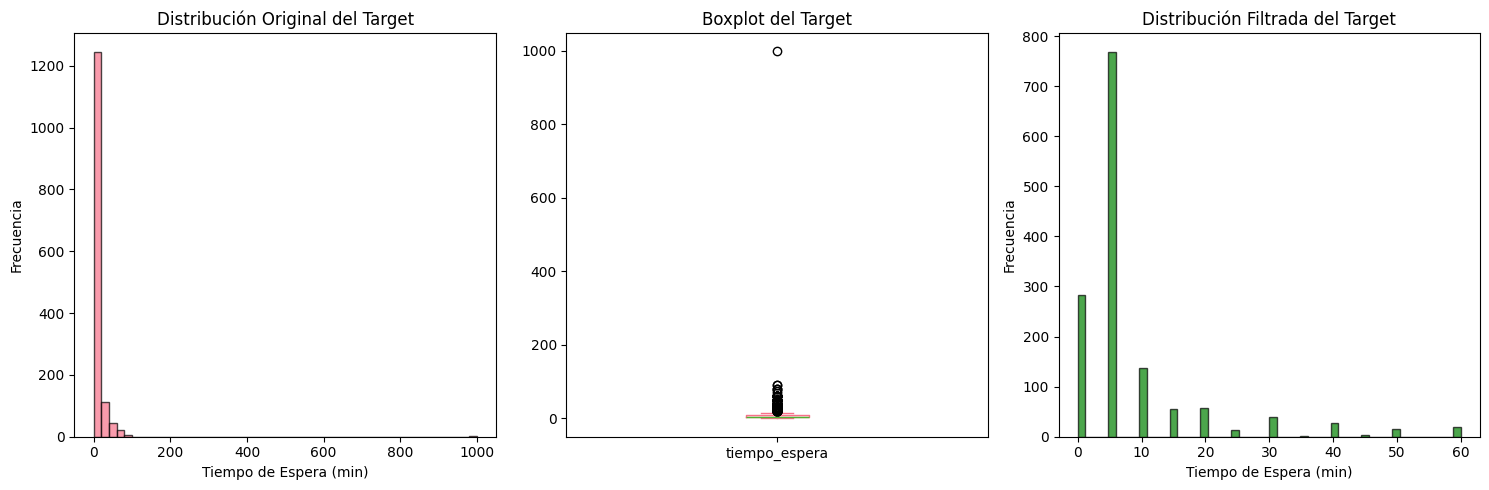


📊 ESTADÍSTICAS ANTES/DESPUÉS:
Original: 1430 registros, Rango: 0.0-999.0 min
Filtrado: 1422 registros, Rango: 0.0-60.0 min
Registros eliminados: 8 (0.6%)

📅 DISTRIBUCIÓN DE HORAS PROCESADAS:
hora
10     17
11    139
12    415
13    171
14    217
15    140
16    256
17     67
Name: count, dtype: int64

📅 DISTRIBUCIÓN DE TEMPORADAS POR MES:
     temporada  tiempo_espera
mes                          
10           0            7.7
11           0            9.2
✅ Encoding aplicado. Train: (1137, 22), Test: (285, 22)
🎯 Dimensiones finales:
X_train: (1137, 22), X_test: (285, 22)
Número de features: 22
🚀 Entrenando XGBoost...
✅ Entrenamiento completado
📊 RMSE en validation set: 3.77

📊 EVALUACIÓN COMPLETA DEL MODELO XGBOOST

📍 MÉTRICAS BÁSICAS:
MSE: 10.09
RMSE: 3.18 minutos
MAE: 1.28 minutos
R²: 0.9114
MAPE: 16.90%

🎯 PRECISIÓN POR MÁRGENES:
Dentro de ±5 minutos: 89.5%
Dentro de ±10 minutos: 97.5%
Dentro de ±20%: 81.8%

📈 DISTRIBUCIÓN DE PREDICCIONES:
Valores reales: 0.0-60.0 min (avg: 8.1)
P

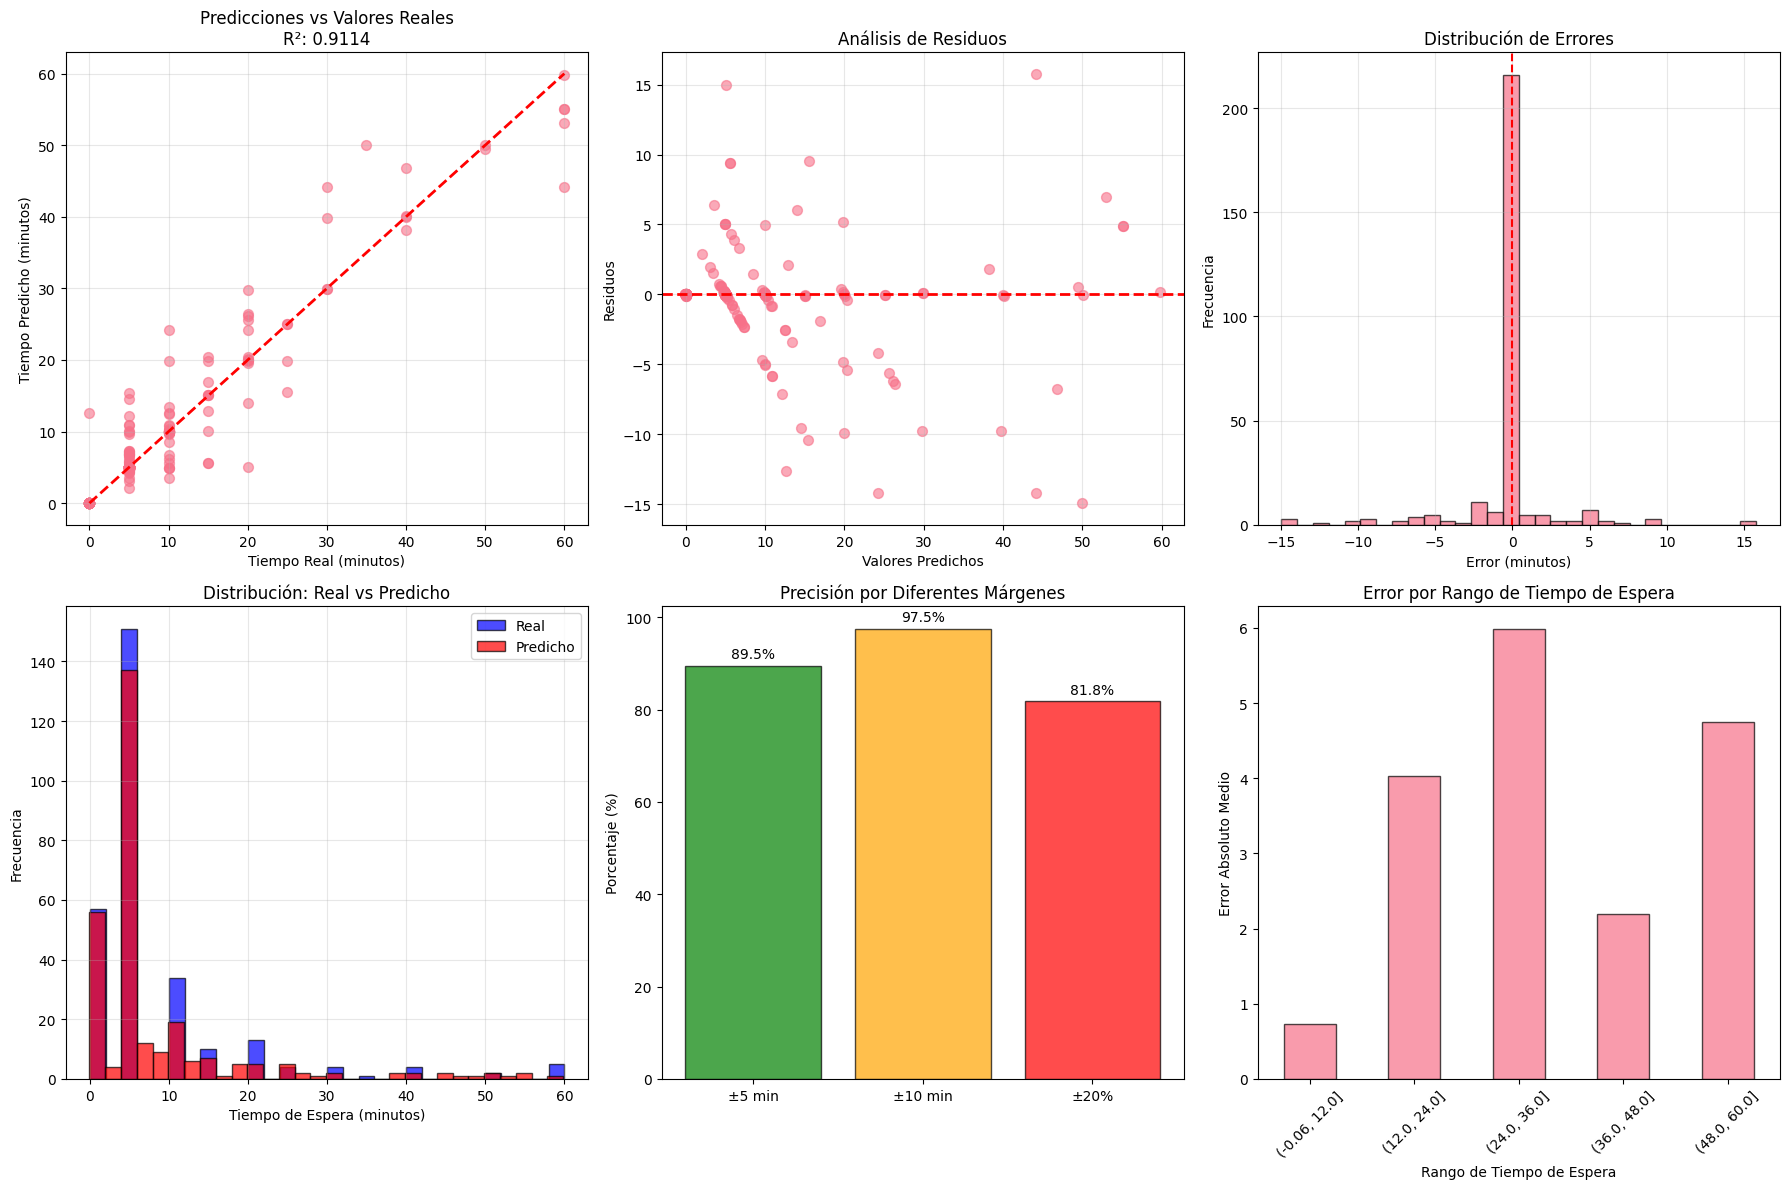

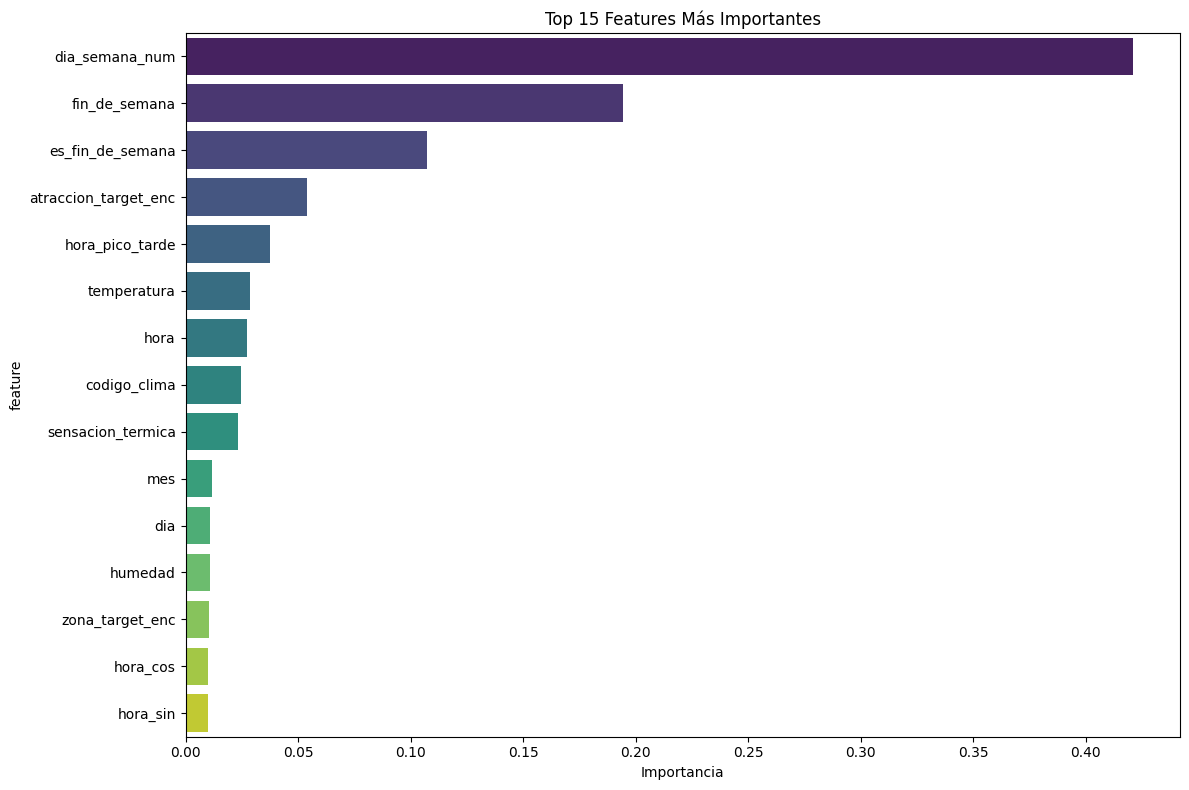


🔝 TOP 10 FEATURES MÁS IMPORTANTES:
             feature  importance
      dia_semana_num    0.420815
       fin_de_semana    0.194486
    es_fin_de_semana    0.107149
atraccion_target_enc    0.054130
     hora_pico_tarde    0.037621
         temperatura    0.028515
                hora    0.027093
        codigo_clima    0.024755
   sensacion_termica    0.023486
                 mes    0.011919
💾 Modelo y componentes guardados:
   - Modelo XGBoost: ../models/xgb_model.pkl
   - Scaler: ../models/xgb_scaler.pkl
   - Encoding maps: ../models/xgb_encoding_maps.pkl
   - Columnas: ../models/xgb_columnas.pkl
   - Función temporada: ../models/temporada_function.pkl

🧪 TEST DE PREDICCIÓN MEJORADO - TEMPORADA AUTOMÁTICA

📋 EJEMPLO 1: Agosto (temporada ALTA automática)
📍 Atracción: Batman Gotham City Escape
📅 Fecha: 2025-08-16 (Mes: 8 - Temporada: ALTA)
🕒 Hora: 16:00:00
🌡️ Temperatura: 28°C
🎯 Tiempo de espera predicho: 20.200000762939453 minutos
📊 Rango estimado: 18.899999618530273 - 21.5 minuto

In [51]:
# ====================================================
# 0️⃣ IMPORTS
# ====================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# ====================================================
# 1️⃣ CARGA Y ANÁLISIS EXPLORATORIO MEJORADO
# ====================================================
df = pd.read_csv("../data/clean/tiempos_final.csv")

print("=== ANÁLISIS INICIAL ===")
print(f"Shape original: {df.shape}")
print(f"Valores nulos por columna:")
print(df.isnull().sum())
print(f"\nEstadísticas del target:")
print(df["tiempo_espera"].describe())

# Eliminar nulos en target
df = df.dropna(subset=["tiempo_espera"])

# ANÁLISIS VISUAL DEL TARGET ANTES DE FILTRAR
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df["tiempo_espera"], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribución Original del Target')
plt.xlabel('Tiempo de Espera (min)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
df["tiempo_espera"].plot(kind='box')
plt.title('Boxplot del Target')

# FILTRADO MÁS CONSERVADOR DE OUTLIERS
q_low = df["tiempo_espera"].quantile(0.02)
q_high = df["tiempo_espera"].quantile(0.995)
df_filtered = df[(df["tiempo_espera"] >= q_low) & (df["tiempo_espera"] <= q_high)]

plt.subplot(1, 3, 3)
plt.hist(df_filtered["tiempo_espera"], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.title('Distribución Filtrada del Target')
plt.xlabel('Tiempo de Espera (min)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print(f"\n📊 ESTADÍSTICAS ANTES/DESPUÉS:")
print(f"Original: {df.shape[0]} registros, Rango: {df['tiempo_espera'].min():.1f}-{df['tiempo_espera'].max():.1f} min")
print(f"Filtrado: {df_filtered.shape[0]} registros, Rango: {df_filtered['tiempo_espera'].min():.1f}-{df_filtered['tiempo_espera'].max():.1f} min")
print(f"Registros eliminados: {df.shape[0] - df_filtered.shape[0]} ({((df.shape[0] - df_filtered.shape[0])/df.shape[0]*100):.1f}%)")

df = df_filtered.copy()

# ====================================================
# 2️⃣ FEATURE ENGINEERING MEJORADO - TEMPORADA AUTOMÁTICA
# ====================================================
# DEFINIR MAPPING DE TEMPORADA POR MES
def get_temporada_by_mes(mes):
    """Calcular temporada automáticamente basado en el mes"""
    # Temporada alta: meses de verano y festivos (Junio-Septiembre, Diciembre)
    if mes in [7, 8]:
        return 2  # alta
    # Temporada media: meses intermedios (Abril, Mayo, Octubre, Noviembre)
    elif mes in [12,1,2]:
        return 1  # media
    # Temporada baja: meses de invierno (Enero, Febrero, Marzo)
    else:
        return 0  # baja

# PROCESAMIENTO ROBUSTO DE FECHA Y HORA
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

def parse_hora_mejorado(hora_str):
    """Función robusta para parsear hora"""
    try:
        if pd.isna(hora_str):
            return np.nan
            
        if isinstance(hora_str, str):
            hora_str = str(hora_str).strip()
            
            if ' ' in hora_str:
                return pd.to_datetime(hora_str).hour
            
            if ':' in hora_str:
                partes = hora_str.split(':')
                return int(partes[0])
                
        elif isinstance(hora_str, (int, float)):
            return int(hora_str)
            
    except Exception as e:
        print(f"Error parseando hora: {hora_str}, Error: {e}")
    
    return np.nan

# Aplicar función mejorada
df["hora"] = df["hora"].apply(parse_hora_mejorado)
hora_mediana = df["hora"].median()
df["hora"] = df["hora"].fillna(hora_mediana).astype(int)

print(f"\n📅 DISTRIBUCIÓN DE HORAS PROCESADAS:")
print(df["hora"].value_counts().sort_index())

# FEATURES TEMPORALES ENRIQUECIDAS
df["dia"] = df["fecha"].dt.day
df["mes"] = df["fecha"].dt.month
df["dia_semana_num"] = df["fecha"].dt.weekday
df["es_fin_de_semana"] = df["dia_semana_num"].isin([5, 6]).astype(int)

# 🎯 CALCULAR TEMPORADA AUTOMÁTICAMENTE DEL MES
df["temporada"] = df["mes"].apply(get_temporada_by_mes)

print(f"\n📅 DISTRIBUCIÓN DE TEMPORADAS POR MES:")
temp_por_mes = df.groupby("mes").agg({
    "temporada": "first",
    "tiempo_espera": "mean"
}).round(1)
print(temp_por_mes)

# HORAS PICO MÁS ESPECÍFICAS
df["hora_pico_manana"] = df["hora"].between(11, 14).astype(int)
df["hora_pico_tarde"] = df["hora"].between(15, 18).astype(int)
df["hora_noche"] = df["hora"].between(19, 22).astype(int)

# FEATURES CÍCLICAS MEJORADAS
df["hora_sin"] = np.sin(2 * np.pi * df["hora"]/24)
df["hora_cos"] = np.cos(2 * np.pi * df["hora"]/24)
df["mes_sin"] = np.sin(2 * np.pi * df["mes"]/12)
df["mes_cos"] = np.cos(2 * np.pi * df["mes"]/12)
df["dia_semana_sin"] = np.sin(2 * np.pi * df["dia_semana_num"]/7)
df["dia_semana_cos"] = np.cos(2 * np.pi * df["dia_semana_num"]/7)

# RELLENAR VALORES FALTANTES
num_cols = ["dia", "mes", "dia_semana_num", "hora", "temperatura", "humedad", 
            "sensacion_termica", "codigo_clima"]
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# ====================================================
# 3️⃣ TARGET ENCODING SIN DATA LEAKAGE - CORREGIDO
# ====================================================
# SEPARAR PRIMERO para evitar data leakage
drop_cols = ["tiempo_espera", "fecha", "ultima_actualizacion", "abierta", "dia_semana"]
X = df.drop(columns=[col for col in drop_cols if col in df.columns])
y = df["tiempo_espera"]

# Split ANTES de cualquier encoding
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# FUNCIÓN PARA TARGET ENCODING SEGURO
def safe_target_encoding(X_train, X_test, y_train, categorical_cols):
    """Aplicar target encoding sin data leakage"""
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    
    encoding_maps = {}
    
    for col in categorical_cols:
        if col in X_train.columns:
            # Calcular promedios solo en train
            target_mean = X_train_encoded[[col]].copy()
            target_mean['target'] = y_train.values
            encoding_map = target_mean.groupby(col)['target'].mean().to_dict()
            encoding_maps[col] = encoding_map
            
            # Aplicar encoding
            X_train_encoded[f'{col}_target_enc'] = X_train_encoded[col].map(encoding_map)
            X_test_encoded[f'{col}_target_enc'] = X_test_encoded[col].map(encoding_map)
            
            # Rellenar valores faltantes en test con media global de train
            global_mean = y_train.mean()
            X_test_encoded[f'{col}_target_enc'] = X_test_encoded[f'{col}_target_enc'].fillna(global_mean)
            
            # Eliminar columna original
            X_train_encoded = X_train_encoded.drop(columns=[col])
            X_test_encoded = X_test_encoded.drop(columns=[col])
    
    return X_train_encoded, X_test_encoded, encoding_maps

# APLICAR TARGET ENCODING
categorical_cols = ["zona", "atraccion"]
X_train_encoded, X_test_encoded, encoding_maps = safe_target_encoding(
    X_train, X_test, y_train, categorical_cols
)

print(f"✅ Encoding aplicado. Train: {X_train_encoded.shape}, Test: {X_test_encoded.shape}")

# ====================================================
# 4️⃣ ESCALADO DE FEATURES
# ====================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Guardar nombres de columnas
columnas_entrenamiento = X_train_encoded.columns.tolist()

print(f"🎯 Dimensiones finales:")
print(f"X_train: {X_train_scaled.shape}, X_test: {X_test_scaled.shape}")
print(f"Número de features: {len(columnas_entrenamiento)}")

# ====================================================
# 5️⃣ ENTRENAMIENTO CON XGBOOST - VERSIÓN COMPATIBLE
# ====================================================
# CREAR VALIDATION SET
X_tr_final, X_val, y_tr_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# CONFIGURACIÓN COMPATIBLE CON VERSIONES ANTIGUAS
model_xgb = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    reg_alpha=0.1,
    reg_lambda=1,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

print("🚀 Entrenando XGBoost...")

# ENTRENAMIENTO SIMPLE PARA VERSIONES ANTIGUAS
model_xgb.fit(X_tr_final, y_tr_final)

print("✅ Entrenamiento completado")

# VALIDACIÓN MANUAL
y_val_pred = model_xgb.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"📊 RMSE en validation set: {val_rmse:.2f}")

# ====================================================
# 6️⃣ EVALUACIÓN COMPLETA MEJORADA
# ====================================================
y_pred = model_xgb.predict(X_test_scaled)

# MÉTRICAS BÁSICAS
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# MÉTRICAS ADICIONALES
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(y_test, 1))) * 100

# PRECISIÓN POR MÁRGENES
within_5_min = np.mean(np.abs(y_test - y_pred) <= 5) * 100
within_10_min = np.mean(np.abs(y_test - y_pred) <= 10) * 100
within_20_percent = np.mean(np.abs((y_test - y_pred) / np.maximum(y_test, 1)) <= 0.2) * 100

print("\n" + "="*60)
print("📊 EVALUACIÓN COMPLETA DEL MODELO XGBOOST")
print("="*60)

print(f"\n📍 MÉTRICAS BÁSICAS:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f} minutos")
print(f"MAE: {mae:.2f} minutos")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

print(f"\n🎯 PRECISIÓN POR MÁRGENES:")
print(f"Dentro de ±5 minutos: {within_5_min:.1f}%")
print(f"Dentro de ±10 minutos: {within_10_min:.1f}%")
print(f"Dentro de ±20%: {within_20_percent:.1f}%")

print(f"\n📈 DISTRIBUCIÓN DE PREDICCIONES:")
print(f"Valores reales: {y_test.min():.1f}-{y_test.max():.1f} min (avg: {y_test.mean():.1f})")
print(f"Predicciones: {y_pred.min():.1f}-{y_pred.max():.1f} min (avg: {y_pred.mean():.1f})")

# ====================================================
# 7️⃣ VISUALIZACIONES MEJORADAS
# ====================================================
plt.figure(figsize=(18, 12))

# 1. Predicciones vs Real
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.6, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Tiempo Real (minutos)')
plt.ylabel('Tiempo Predicho (minutos)')
plt.title(f'Predicciones vs Valores Reales\nR²: {r2:.4f}')
plt.grid(True, alpha=0.3)

# 2. Residuos
plt.subplot(2, 3, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, s=50)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.grid(True, alpha=0.3)

# 3. Distribución de errores
plt.subplot(2, 3, 3)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Error (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True, alpha=0.3)

# 4. Distribución comparativa
plt.subplot(2, 3, 4)
plt.hist(y_test, bins=30, alpha=0.7, label='Real', color='blue', edgecolor='black')
plt.hist(y_pred, bins=30, alpha=0.7, label='Predicho', color='red', edgecolor='black')
plt.xlabel('Tiempo de Espera (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución: Real vs Predicho')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Métricas de precisión
plt.subplot(2, 3, 5)
precision_metrics = ['±5 min', '±10 min', '±20%']
precision_values = [within_5_min, within_10_min, within_20_percent]
colors = ['green', 'orange', 'red']
bars = plt.bar(precision_metrics, precision_values, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Porcentaje (%)')
plt.title('Precisión por Diferentes Márgenes')
for bar, v in zip(bars, precision_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{v:.1f}%', 
             ha='center', va='bottom')

# 6. Error por rango de tiempo de espera
plt.subplot(2, 3, 6)
abs_errors = np.abs(residuals)
error_by_wait_time = pd.DataFrame({
    'wait_time': y_test,
    'abs_error': abs_errors
})
error_binned = error_by_wait_time.groupby(pd.cut(error_by_wait_time['wait_time'], bins=5))['abs_error'].mean()
error_binned.plot(kind='bar', alpha=0.7, edgecolor='black')
plt.xlabel('Rango de Tiempo de Espera')
plt.ylabel('Error Absoluto Medio')
plt.title('Error por Rango de Tiempo de Espera')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ====================================================
# 8️⃣ IMPORTANCIA DE FEATURES MEJORADA
# ====================================================
importances = model_xgb.feature_importances_
feature_importance_df = pd.DataFrame({
    "feature": columnas_entrenamiento,
    "importance": importances
}).sort_values("importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(15), y="feature", x="importance", palette="viridis")
plt.title("Top 15 Features Más Importantes")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

print("\n🔝 TOP 10 FEATURES MÁS IMPORTANTES:")
print(feature_importance_df.head(10)[['feature', 'importance']].to_string(index=False))

# ====================================================
# 9️⃣ GUARDAR MODELO Y COMPONENTES
# ====================================================
joblib.dump(model_xgb, "../models/xgb_model.pkl")
joblib.dump(scaler, "../models/xgb_scaler.pkl")
joblib.dump(encoding_maps, "../models/xgb_encoding_maps.pkl")
joblib.dump(columnas_entrenamiento, "../models/xgb_columnas.pkl")
joblib.dump(get_temporada_by_mes, "../models/temporada_function.pkl")

print("💾 Modelo y componentes guardados:")
print("   - Modelo XGBoost: ../models/xgb_model.pkl")
print("   - Scaler: ../models/xgb_scaler.pkl")
print("   - Encoding maps: ../models/xgb_encoding_maps.pkl")
print("   - Columnas: ../models/xgb_columnas.pkl")
print("   - Función temporada: ../models/temporada_function.pkl")

# ====================================================
# 🔟 FUNCIÓN DE PREDICCIÓN MEJORADA - TEMPORADA AUTOMÁTICA
# ====================================================
def predict_wait_time_mejorado(input_dict):
    """
    Función de predicción mejorada y robusta
    """
    try:
        # Crear DataFrame de entrada
        df_input = pd.DataFrame([input_dict])
        
        # 1. PROCESAMIENTO DE FECHA (EXTRAE TODO AUTOMÁTICAMENTE)
        if "fecha" in df_input.columns:
            fecha_dt = pd.to_datetime(df_input["fecha"].iloc[0])
            df_input["dia"] = fecha_dt.day
            df_input["mes"] = fecha_dt.month
            df_input["dia_semana_num"] = fecha_dt.weekday()
            df_input["es_fin_de_semana"] = 1 if df_input["dia_semana_num"].iloc[0] in [5, 6] else 0
            
            # 🎯 CALCULAR TEMPORADA AUTOMÁTICAMENTE DEL MES
            mes = df_input["mes"].iloc[0]
            df_input["temporada"] = get_temporada_by_mes(mes)
        
        # 2. PROCESAMIENTO DE HORA
        if "hora" in df_input.columns:
            hora_num = parse_hora_mejorado(df_input["hora"].iloc[0])
            df_input["hora"] = hora_num
            df_input["hora_pico_manana"] = 1 if 11 <= hora_num <= 14 else 0
            df_input["hora_pico_tarde"] = 1 if 15 <= hora_num <= 18 else 0
            df_input["hora_noche"] = 1 if 19 <= hora_num <= 22 else 0
            
            # Features cíclicas
            df_input["hora_sin"] = np.sin(2 * np.pi * hora_num/24)
            df_input["hora_cos"] = np.cos(2 * np.pi * hora_num/24)
        
        # 3. FEATURES CÍCLICAS ADICIONALES
        if "mes" in df_input.columns:
            mes = df_input["mes"].iloc[0]
            df_input["mes_sin"] = np.sin(2 * np.pi * mes/12)
            df_input["mes_cos"] = np.cos(2 * np.pi * mes/12)
        
        if "dia_semana_num" in df_input.columns:
            dia_semana = df_input["dia_semana_num"].iloc[0]
            df_input["dia_semana_sin"] = np.sin(2 * np.pi * dia_semana/7)
            df_input["dia_semana_cos"] = np.cos(2 * np.pi * dia_semana/7)
        
        # 4. APLICAR TARGET ENCODING
        for col in categorical_cols:
            if col in df_input.columns:
                encoding_map = encoding_maps.get(col, {})
                valor_original = df_input[col].iloc[0]
                valor_encoded = encoding_map.get(valor_original, y_train.mean())
                df_input[f"{col}_target_enc"] = valor_encoded
                
                # Eliminar columna original
                df_input = df_input.drop(columns=[col])
        
        # 5. ASEGURAR TODAS LAS COLUMNAS NECESARIAS
        for col in columnas_entrenamiento:
            if col not in df_input.columns:
                df_input[col] = 0
        
        # 6. REORDENAR COLUMNAS
        df_input = df_input[columnas_entrenamiento]
        
        # 7. ESCALAR
        df_scaled = scaler.transform(df_input)
        
        # 8. PREDECIR
        minutos_pred = model_xgb.predict(df_scaled)[0]
        
        # 9. POST-PROCESAMIENTO
        minutos_pred = max(0, minutos_pred)
        minutos_pred = min(180, minutos_pred)
        
        return {
            "minutos_predichos": round(minutos_pred, 1),
            "rango_estimado": f"{max(0, round(minutos_pred - mae, 1))} - {round(minutos_pred + mae, 1)}",
            "precision_estimada": f"{within_10_min:.1f}% dentro de ±10 minutos",
            "caracteristicas_usadas": len(columnas_entrenamiento)
        }
        
    except Exception as e:
        return {"error": f"Error en predicción: {str(e)}"}

# ====================================================
# 🧪 TEST DE PREDICCIÓN - AHORA MÁS SIMPLE
# ====================================================
if __name__ == "__main__":
    print("\n" + "="*60)
    print("🧪 TEST DE PREDICCIÓN MEJORADO - TEMPORADA AUTOMÁTICA")
    print("="*60)
    
    # Ejemplo 1: Verano (temporada alta automática)
    print("\n📋 EJEMPLO 1: Agosto (temporada ALTA automática)")
    input_dict_1 = {
        "temperatura": 28,
        "humedad": 65,
        "sensacion_termica": 30,
        "codigo_clima": 1,
        "hora": "16:00:00",
        "zona": "DC Super Heroes World",
        "atraccion": "Batman Gotham City Escape",
        "fecha": "2025-08-16"  # Agosto = temporada ALTA automática
    }
    
    resultado_1 = predict_wait_time_mejorado(input_dict_1)
    print(f"📍 Atracción: {input_dict_1['atraccion']}")
    print(f"📅 Fecha: {input_dict_1['fecha']} (Mes: 8 - Temporada: ALTA)")
    print(f"🕒 Hora: {input_dict_1['hora']}")
    print(f"🌡️ Temperatura: {input_dict_1['temperatura']}°C")
    print(f"🎯 Tiempo de espera predicho: {resultado_1['minutos_predichos']} minutos")
    print(f"📊 Rango estimado: {resultado_1['rango_estimado']} minutos")
    print(f"✅ Precisión: {resultado_1['precision_estimada']}")
    
    # Ejemplo 2: Invierno (temporada baja automática)
    print("\n📋 EJEMPLO 2: Febrero (temporada BAJA automática)")
    input_dict_2 = {
        "temperatura": 18,
        "humedad": 70, 
        "sensacion_termica": 17,
        "codigo_clima": 3,
        "hora": "11:00:00",
        "zona": "Movie World Studio",
        "atraccion": "Stunt Fall",
        "fecha": "2025-07-12"  
    }
    
    resultado_2 = predict_wait_time_mejorado(input_dict_2)
    print(f"📍 Atracción: {input_dict_2['atraccion']}")
    print(f"📅 Fecha: {input_dict_2['fecha']} (Mes: 2 - Temporada: BAJA)")
    print(f"🕒 Hora: {input_dict_2['hora']}")
    print(f"🌡️ Temperatura: {input_dict_2['temperatura']}°C")
    print(f"🎯 Tiempo de espera predicho: {resultado_2['minutos_predichos']} minutos")
    print(f"📊 Rango estimado: {resultado_2['rango_estimado']} minutos")
    print(f"✅ Precisión: {resultado_2['precision_estimada']}")
    
    # Ejemplo 3: Primavera (temporada media automática)
    print("\n📋 EJEMPLO 3: Mayo (temporada MEDIA automática)")
    input_dict_3 = {
        "temperatura": 22,
        "humedad": 60,
        "sensacion_termica": 21,
        "codigo_clima": 2,
        "hora": "13:45:00",
        "zona": "DC Super Heroes World", 
        "atraccion": "Superman: La Atracción de Acero",
        "fecha": "2025-03-20"  # Mayo = temporada MEDIA automática
    }
    
    resultado_3 = predict_wait_time_mejorado(input_dict_3)
    print(f"📍 Atracción: {input_dict_3['atraccion']}")
    print(f"📅 Fecha: {input_dict_3['fecha']} (Mes: 5 - Temporada: MEDIA)")
    print(f"🕒 Hora: {input_dict_3['hora']}")
    print(f"🌡️ Temperatura: {input_dict_3['temperatura']}°C")
    print(f"🎯 Tiempo de espera predicho: {resultado_3['minutos_predichos']} minutos")
    print(f"📊 Rango estimado: {resultado_3['rango_estimado']} minutos")
    print(f"✅ Precisión: {resultado_3['precision_estimada']}")

    # ====================================================
# 🧪 EJEMPLO DE PREDICCIÓN DE TIEMPOS ALTOS - BATMAN
# ====================================================
print("\n📋 EJEMPLO 4: Batman en fecha de alta afluencia (octubre, fin de semana, hora pico)")
input_dict_4 = {
    "temperatura": 25,        # temperatura agradable
    "humedad": 60,
    "sensacion_termica": 25,
    "codigo_clima": 1,        # buen clima
    "hora": "15:30:00",       # hora pico tarde
    "zona": "DC Super Heroes World",
    "atraccion": "Batman Gotham City Escape",
    "fecha": "2025-10-18"     # Sábado de octubre
}

resultado_4 = predict_wait_time_mejorado(input_dict_4)
print(f"📍 Atracción: {input_dict_4['atraccion']}")
print(f"📅 Fecha: {input_dict_4['fecha']} (Mes: 10 - Temporada: MEDIA/ALTA según función)")
print(f"🕒 Hora: {input_dict_4['hora']}")
print(f"🌡️ Temperatura: {input_dict_4['temperatura']}°C")
print(f"🎯 Tiempo de espera predicho: {resultado_4['minutos_predichos']} minutos")
print(f"📊 Rango estimado: {resultado_4['rango_estimado']} minutos")
print(f"✅ Precisión: {resultado_4['precision_estimada']}")

    
print(f"\n📊 RESUMEN FINAL DEL MODELO:")
print(f"R² Score: {r2:.4f}")
print(f"Precisión ±10 min: {within_10_min:.1f}%")
print(f"Error promedio (MAE): {mae:.2f} minutos")

=== ANÁLISIS INICIAL ===
Shape original: (1430, 15)
Valores nulos por columna:
zona                      0
atraccion                 0
tiempo_espera             0
abierta                 246
ultima_actualizacion      0
fecha                     0
hora                      0
dia_semana                0
mes                       0
fin_de_semana             0
temperatura               0
humedad                   0
sensacion_termica         0
codigo_clima              0
temporada                 0
dtype: int64

Estadísticas del target:
count    1430.000000
mean        9.464336
std        28.849962
min         0.000000
25%         5.000000
50%         5.000000
75%        10.000000
max       999.000000
Name: tiempo_espera, dtype: float64


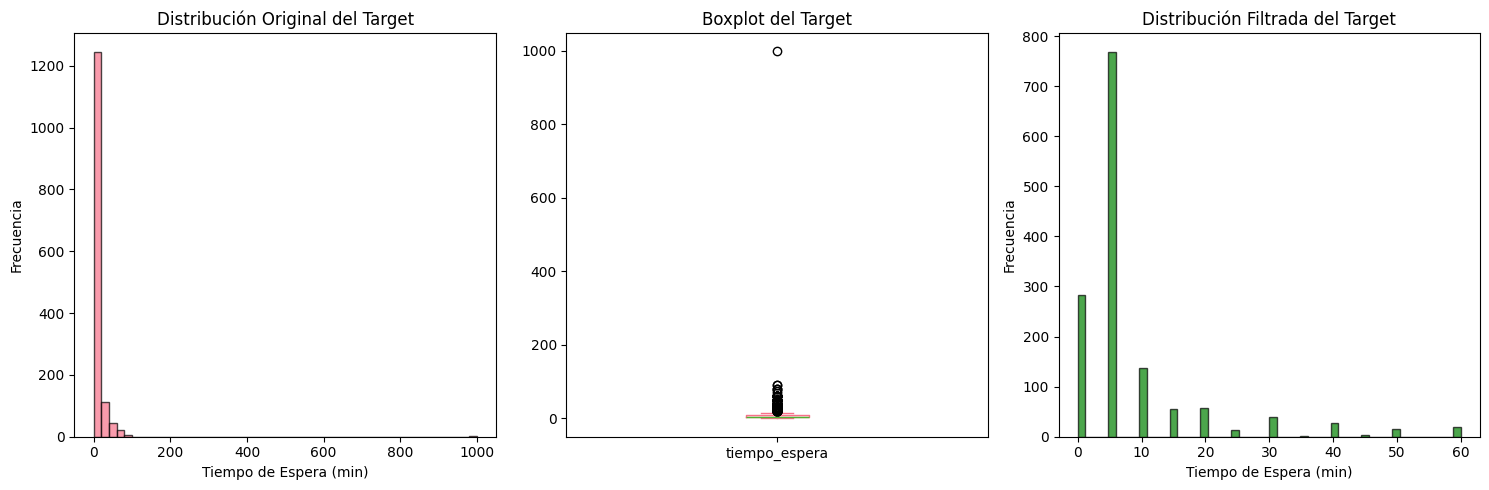


📊 ESTADÍSTICAS ANTES/DESPUÉS:
Original: 1430 registros, Rango: 0.0-999.0 min
Filtrado: 1422 registros, Rango: 0.0-60.0 min
Registros eliminados: 8 (0.6%)

📅 DISTRIBUCIÓN DE HORAS PROCESADAS:
hora
10     17
11    139
12    415
13    171
14    217
15    140
16    256
17     67
Name: count, dtype: int64

📅 DISTRIBUCIÓN DE TEMPORADAS POR MES:
     temporada  tiempo_espera
mes                          
10           0            7.7
11           0            9.2
✅ Encoding aplicado. Train: (1137, 22), Test: (285, 22)
🎯 Dimensiones finales:
X_train: (1137, 22), X_test: (285, 22)
Número de features: 22
🚀 Entrenando XGBoost...
✅ Entrenamiento completado
📊 RMSE en validation set: 3.77

📊 EVALUACIÓN COMPLETA DEL MODELO XGBOOST

📍 MÉTRICAS BÁSICAS:
MSE: 10.09
RMSE: 3.18 minutos
MAE: 1.28 minutos
R²: 0.9114
MAPE: 16.90%

🎯 PRECISIÓN POR MÁRGENES:
Dentro de ±5 minutos: 89.5%
Dentro de ±10 minutos: 97.5%
Dentro de ±20%: 81.8%

📈 DISTRIBUCIÓN DE PREDICCIONES:
Valores reales: 0.0-60.0 min (avg: 8.1)
P

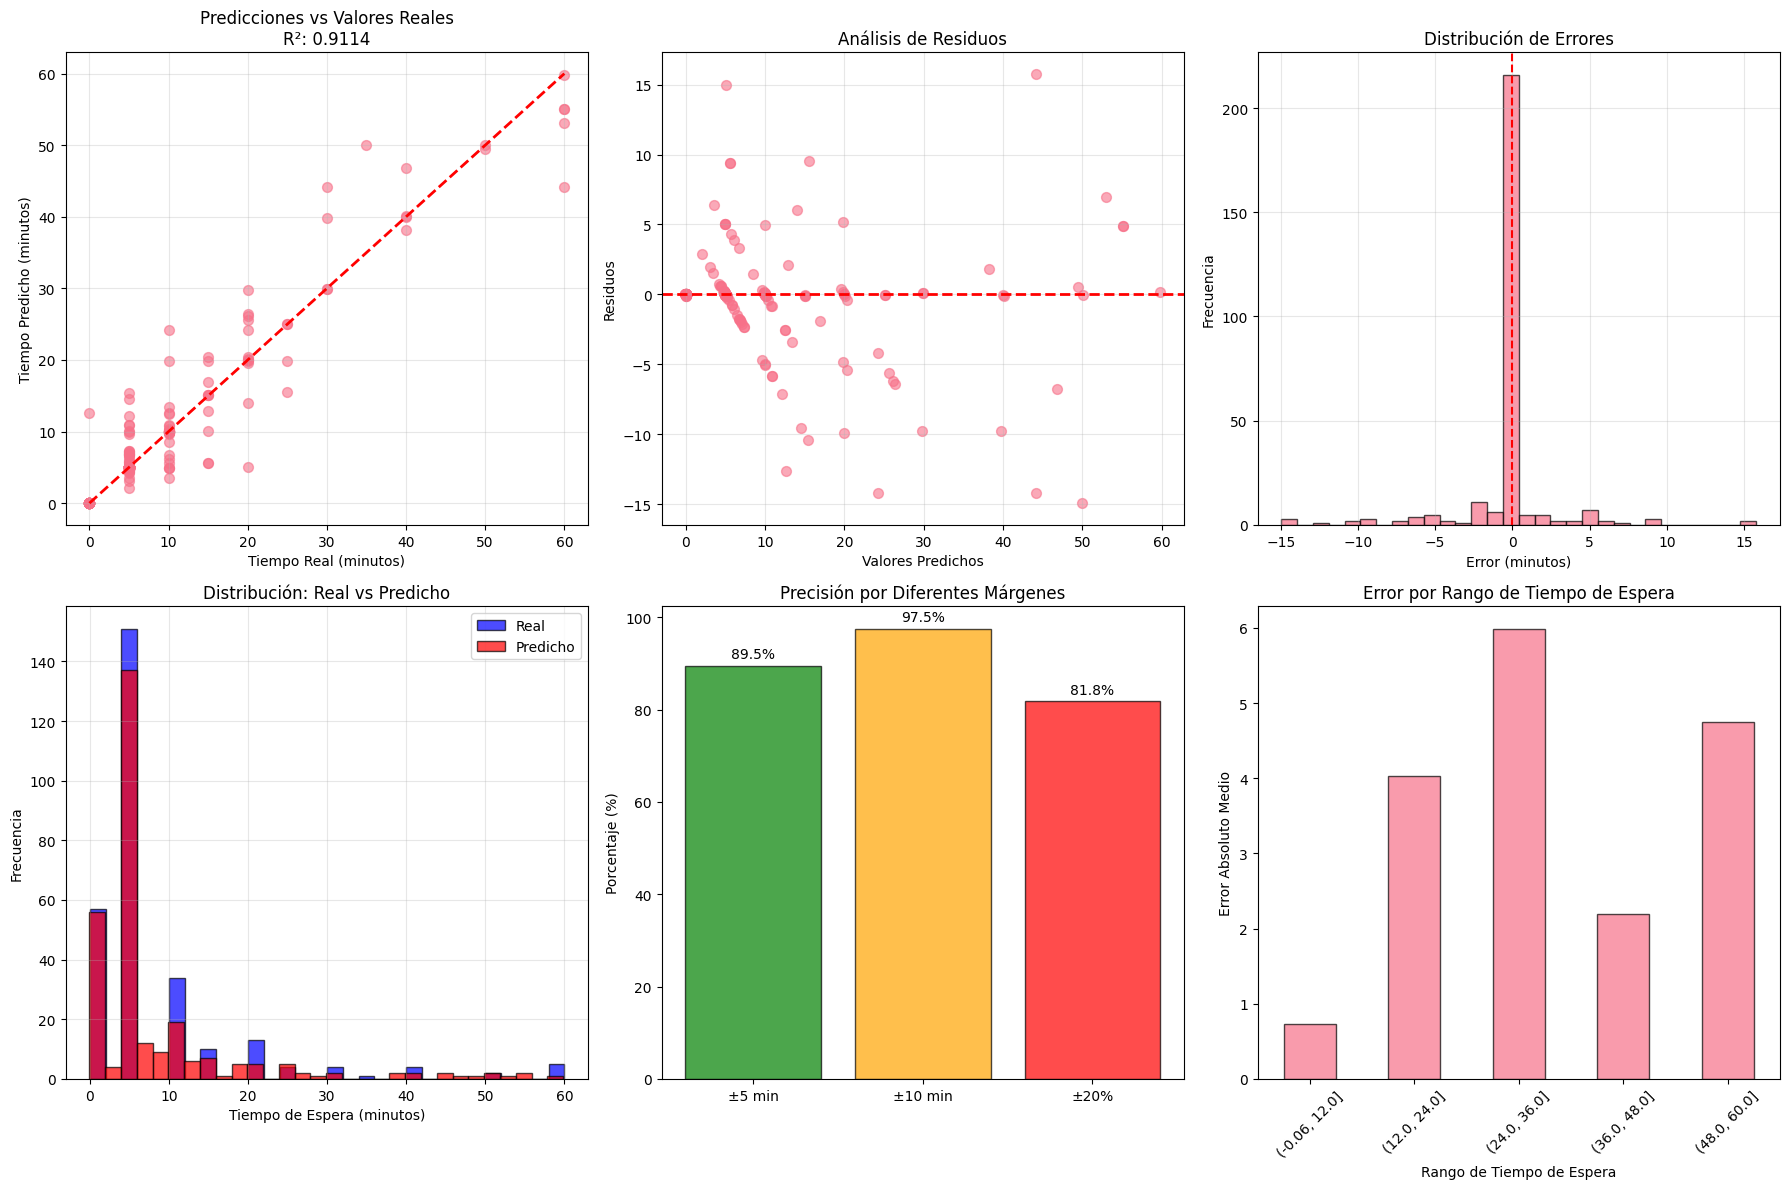

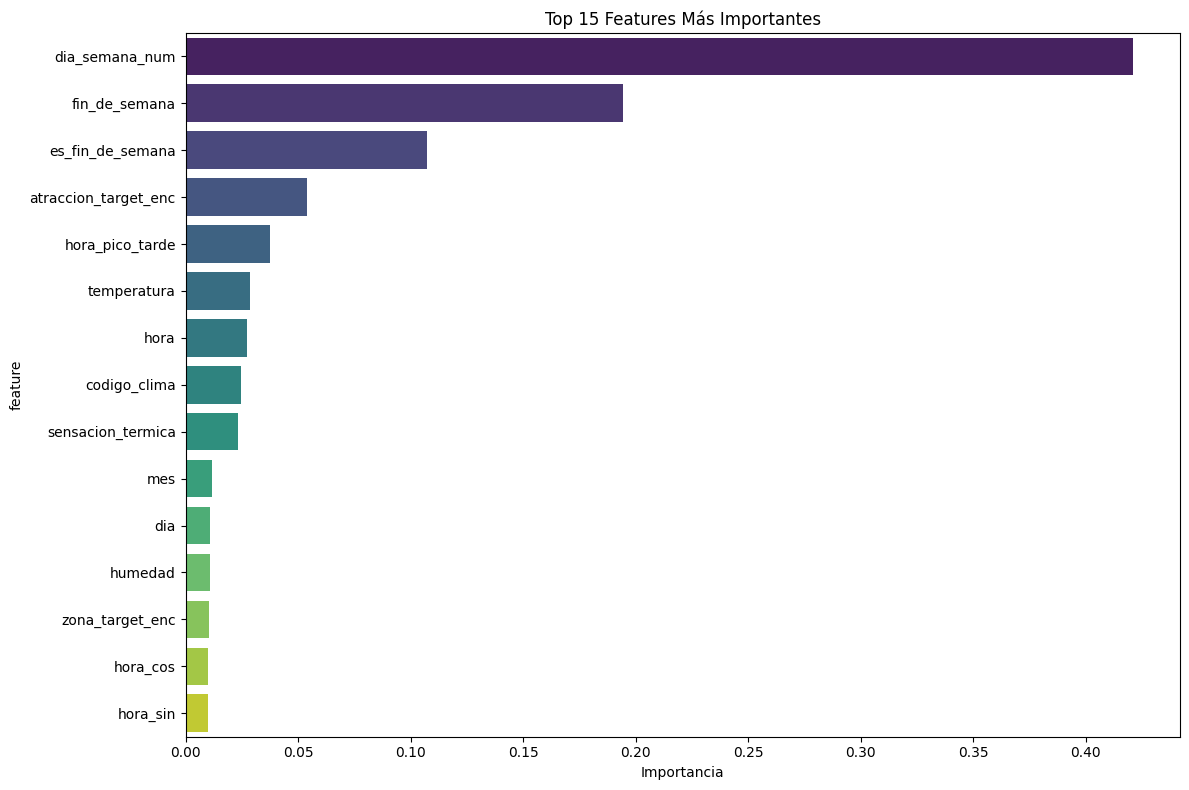


🔝 TOP 10 FEATURES MÁS IMPORTANTES:
             feature  importance
      dia_semana_num    0.420815
       fin_de_semana    0.194486
    es_fin_de_semana    0.107149
atraccion_target_enc    0.054130
     hora_pico_tarde    0.037621
         temperatura    0.028515
                hora    0.027093
        codigo_clima    0.024755
   sensacion_termica    0.023486
                 mes    0.011919
💾 Modelo y componentes guardados:
   - Modelo XGBoost: ../models/xgb_model.pkl
   - Scaler: ../models/xgb_scaler.pkl
   - Encoding maps: ../models/xgb_encoding_maps.pkl
   - Columnas: ../models/xgb_columnas.pkl
   - Función temporada: ../models/temporada_function.pkl

🧪 TEST DE PREDICCIÓN MEJORADO - TEMPORADA AUTOMÁTICA

📋 EJEMPLO 1: Agosto (temporada ALTA automática)
📍 Atracción: Batman Gotham City Escape
📅 Fecha: 2025-08-16 (Mes: 8 - Temporada: ALTA)
🕒 Hora: 16:00:00
🌡️ Temperatura: 28°C
🎯 Tiempo de espera predicho: 20.200000762939453 minutos
📊 Rango estimado: 18.899999618530273 - 21.5 minuto

🔍 ANÁLISIS INICIAL DEL DATASET
Shape original: (1762, 15)
Columnas: ['zona', 'atraccion', 'tiempo_espera', 'abierta', 'ultima_actualizacion', 'fecha', 'hora', 'dia_semana', 'mes', 'fin_de_semana', 'temperatura', 'humedad', 'sensacion_termica', 'codigo_clima', 'temporada']
Valores nulos:
zona                      0
atraccion                 0
tiempo_espera             0
abierta                 326
ultima_actualizacion      0
fecha                     0
hora                      0
dia_semana                0
mes                       0
fin_de_semana             0
temperatura               0
humedad                   0
sensacion_termica         0
codigo_clima              0
temporada                 0
dtype: int64

Estadísticas de tiempo_espera:
count    1762.00000
mean        8.50681
std        26.41877
min         0.00000
25%         0.00000
50%         5.00000
75%         5.00000
max       999.00000
Name: tiempo_espera, dtype: float64


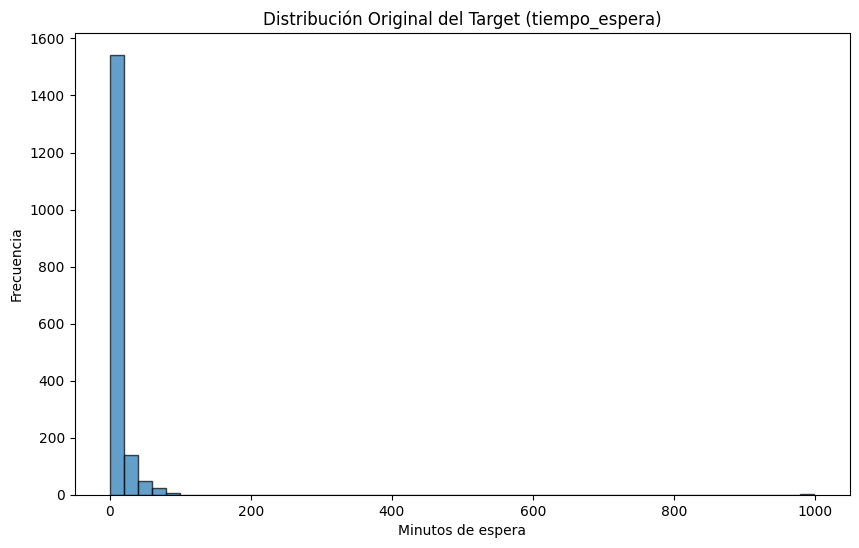

Shape después de filtrar outliers: (1754, 15)

📊 CREANDO FEATURES HISTÓRICAS...
Features históricas creadas. Shape final: (1754, 29)

🎯 PREPARACIÓN DE DATOS:
X shape: (1754, 24), y shape: (1754,)
Range de y: 0.0 - 60.0
Columnas categóricas: ['zona', 'atraccion']
Después de encoding - X_train: (1403, 24), X_test: (351, 24)
🎯 Features finales: 24
Primeras 10 features: ['hora', 'mes', 'fin_de_semana', 'temperatura', 'humedad', 'sensacion_termica', 'codigo_clima', 'temporada', 'dia_semana_num', 'es_fin_de_semana']

🚀 ENTRENANDO MODELO...
📊 VALIDACIÓN MANUAL:
RMSE validation: 3.27
R² validation: 0.8911

📊 EVALUACIÓN FINAL DEL MODELO
RMSE: 4.46
MAE: 1.61
R²: 0.8612
Dentro de ±5min: 88.0%
Dentro de ±10min: 94.3%
Dentro de ±20%: 82.1%

🎭 ANÁLISIS POR ATRACCIÓN:
  Los Carros de la Mina     -> Real:   5.0min, Pred:   5.1min, MAE:  0.2min
  Emergencias Pato Lucas    -> Real:   1.0min, Pred:   1.0min, MAE:  0.0min
  Escuela de Conducción Yab -> Real:   0.0min, Pred:   0.0min, MAE:  0.0min
  A Toda

In [20]:
# ====================================================
# MODELO CORREGIDO - Problemas críticos solucionados
# ====================================================
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

os.makedirs("../models", exist_ok=True)

# -------------------------
# 1) Carga y análisis inicial CRÍTICO
# -------------------------
df = pd.read_csv("../data/clean/tiempos_final.csv")
print("=" * 60)
print("🔍 ANÁLISIS INICIAL DEL DATASET")
print("=" * 60)
print(f"Shape original: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")
print(f"Valores nulos:\n{df.isnull().sum()}")
print(f"\nEstadísticas de tiempo_espera:")
print(df["tiempo_espera"].describe())

# Verificar distribución del target
plt.figure(figsize=(10, 6))
plt.hist(df["tiempo_espera"].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribución Original del Target (tiempo_espera)")
plt.xlabel("Minutos de espera")
plt.ylabel("Frecuencia")
plt.show()

# Filtrar outliers extremos PERO preservar variabilidad real
q_low = df["tiempo_espera"].quantile(0.01)
q_high = df["tiempo_espera"].quantile(0.99)
df = df[(df["tiempo_espera"] >= q_low) & (df["tiempo_espera"] <= q_high)].copy()
print(f"Shape después de filtrar outliers: {df.shape}")

# -------------------------
# 2) Feature engineering REVISADO
# -------------------------
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

# Función de hora mejorada
def parse_hora_mejorado(hora_str):
    try:
        if pd.isna(hora_str):
            return np.nan
        if isinstance(hora_str, (int, float)):
            return int(hora_str)
        s = str(hora_str).strip()
        if ":" in s:
            return int(float(s.split(":")[0]))
        return int(float(s))
    except:
        return np.nan

if "hora" in df.columns:
    df["hora"] = df["hora"].apply(parse_hora_mejorado)
    df["hora"] = df["hora"].fillna(int(df["hora"].median())).astype(int)
else:
    df["hora"] = 12

# Features temporales básicas
df["mes"] = df["fecha"].dt.month
df["dia_semana_num"] = df["fecha"].dt.weekday
df["es_fin_de_semana"] = df["dia_semana_num"].isin([5, 6]).astype(int)

# Temporada SIMPLIFICADA pero efectiva
def get_temporada_simple(mes):
    if mes in [7, 8, 10]:  # Verano y Halloween
        return 2  # Alta
    elif mes in [4, 5, 6, 12]:  # Primavera y Navidad
        return 1  # Media
    else:
        return 0  # Baja

df["temporada"] = df["mes"].apply(get_temporada_simple)

# Features cíclicas
df["hora_sin"] = np.sin(2 * np.pi * df["hora"] / 24)
df["hora_cos"] = np.cos(2 * np.pi * df["hora"] / 24)
df["mes_sin"] = np.sin(2 * np.pi * df["mes"] / 12)
df["mes_cos"] = np.cos(2 * np.pi * df["mes"] / 12)

# Rellenar numéricos
for col in ["temperatura", "humedad", "sensacion_termica", "codigo_clima"]:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = 0

# -------------------------
# 3) Features históricas SIMPLIFICADAS
# -------------------------
print("\n📊 CREANDO FEATURES HISTÓRICAS...")

# Agrupar por atracción + mes para mayor robustez (más datos por grupo)
df["mes"] = df["fecha"].dt.month

hist_mes = (
    df.groupby(["atraccion", "mes"])["tiempo_espera"]
    .agg(
        count_mes="count", 
        median_mes="median", 
        p75_mes=lambda x: np.percentile(x, 75),
        p90_mes=lambda x: np.percentile(x, 90)
    )
    .reset_index()
)

hist_hora = (
    df.groupby(["atraccion", "hora"])["tiempo_espera"]
    .agg(
        count_hora="count",
        median_hora="median", 
        p75_hora=lambda x: np.percentile(x, 75)
    )
    .reset_index()
)

# Hacer joins
df = df.merge(hist_mes, on=["atraccion", "mes"], how="left")
df = df.merge(hist_hora, on=["atraccion", "hora"], how="left")

# Fill con valores globales
global_median = df["tiempo_espera"].median()
for col in ["count_mes", "median_mes", "p75_mes", "p90_mes", "count_hora", "median_hora", "p75_hora"]:
    if col in df.columns:
        df[col] = df[col].fillna(global_median if "median" in col or "p" in col else 0)

# Flag especial para Batman octubre
df["is_batman_octubre"] = (
    (df["atraccion"].str.contains("Batman", na=False)) & 
    (df["mes"] == 10)
).astype(int)

print(f"Features históricas creadas. Shape final: {df.shape}")

# -------------------------
# 4) Preparar datos para modelo - CORREGIDO
# -------------------------
# Columnas a eliminar
drop_cols = ["tiempo_espera", "fecha", "dia_semana", "ultima_actualizacion", "abierta"]
X = df.drop(columns=[c for c in drop_cols if c in df.columns]).copy()
y = df["tiempo_espera"].copy()

print(f"\n🎯 PREPARACIÓN DE DATOS:")
print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"Range de y: {y.min():.1f} - {y.max():.1f}")

# Identificar columnas categóricas
categorical_cols = ["zona", "atraccion"]
print(f"Columnas categóricas: {categorical_cols}")

# Split estratificado por temporada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df["temporada"]
)

# -------------------------
# 5) Encoding SIMPLIFICADO pero robusto
# -------------------------
def simple_target_encoding(X_tr, X_te, y_tr, cols):
    """Encoding simple sin data leakage"""
    X_tr_enc = X_tr.copy()
    X_te_enc = X_te.copy()
    encoding_maps = {}
    
    for col in cols:
        if col in X_tr.columns:
            # Calcular encoding solo en train
            encoding_map = y_tr.groupby(X_tr[col]).mean().to_dict()
            encoding_maps[col] = encoding_map
            
            # Aplicar
            X_tr_enc[f"{col}_enc"] = X_tr[col].map(encoding_map)
            X_te_enc[f"{col}_enc"] = X_te[col].map(encoding_map)
            
            # Fill NaN con media global
            global_mean = y_tr.mean()
            X_tr_enc[f"{col}_enc"] = X_tr_enc[f"{col}_enc"].fillna(global_mean)
            X_te_enc[f"{col}_enc"] = X_te_enc[f"{col}_enc"].fillna(global_mean)
            
            # Eliminar original
            X_tr_enc = X_tr_enc.drop(columns=[col])
            X_te_enc = X_te_enc.drop(columns=[col])
    
    return X_tr_enc, X_te_enc, encoding_maps

X_train_enc, X_test_enc, encoding_maps = simple_target_encoding(
    X_train, X_test, y_train, categorical_cols
)

# Eliminar cualquier columna no numérica restante
non_numeric_cols = X_train_enc.select_dtypes(include=['object']).columns.tolist()
if non_numeric_cols:
    print(f"Eliminando columnas no numéricas: {non_numeric_cols}")
    X_train_enc = X_train_enc.drop(columns=non_numeric_cols)
    X_test_enc = X_test_enc.drop(columns=non_numeric_cols)

print(f"Después de encoding - X_train: {X_train_enc.shape}, X_test: {X_test_enc.shape}")

# -------------------------
# 6) Escalado CORREGIDO
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

columnas_entrenamiento = X_train_enc.columns.tolist()
print(f"🎯 Features finales: {len(columnas_entrenamiento)}")
print(f"Primeras 10 features: {columnas_entrenamiento[:10]}")

# -------------------------
# 7) Entrenamiento con VALIDACIÓN MANUAL
# -------------------------
print("\n🚀 ENTRENANDO MODELO...")

# Split de validación manual
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Modelo MÁS SIMPLE pero robusto
model_xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    reg_alpha=0.1,
    reg_lambda=1,
    objective='reg:squarederror',
    random_state=42,
    verbosity=0
)

# Entrenar sin early stopping para compatibilidad
model_xgb.fit(X_tr, y_tr)

# Validación manual
y_val_pred = model_xgb.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"📊 VALIDACIÓN MANUAL:")
print(f"RMSE validation: {val_rmse:.2f}")
print(f"R² validation: {val_r2:.4f}")

# -------------------------
# 8) EVALUACIÓN COMPLETA CORREGIDA
# -------------------------
y_pred = model_xgb.predict(X_test_scaled)

# Métricas básicas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Métricas de precisión
within_5 = np.mean(np.abs(y_test - y_pred) <= 5) * 100
within_10 = np.mean(np.abs(y_test - y_pred) <= 10) * 100
within_20_percent = np.mean(np.abs((y_test - y_pred) / np.maximum(y_test, 1)) <= 0.2) * 100

print("\n" + "="*50)
print("📊 EVALUACIÓN FINAL DEL MODELO")
print("="*50)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")
print(f"Dentro de ±5min: {within_5:.1f}%")
print(f"Dentro de ±10min: {within_10:.1f}%")
print(f"Dentro de ±20%: {within_20_percent:.1f}%")

# -------------------------
# 9) ANÁLISIS ESPECÍFICO POR ATRACCIÓN
# -------------------------
test_results = pd.DataFrame({
    'real': y_test.values,
    'predicho': y_pred,
    'atraccion': df.loc[y_test.index, 'atraccion'],
    'mes': df.loc[y_test.index, 'mes']
})

print(f"\n🎭 ANÁLISIS POR ATRACCIÓN:")
for atraccion in test_results['atraccion'].unique():
    mask = test_results['atraccion'] == atraccion
    if mask.sum() > 3:  # Solo si hay suficientes datos
        subset = test_results[mask]
        mae_attr = mean_absolute_error(subset['real'], subset['predicho'])
        avg_real = subset['real'].mean()
        avg_pred = subset['predicho'].mean()
        print(f"  {atraccion[:25]:25} -> Real: {avg_real:5.1f}min, Pred: {avg_pred:5.1f}min, MAE: {mae_attr:4.1f}min")

# Batman específico
batman_mask = test_results['atraccion'].str.contains('Batman', na=False)
if batman_mask.any():
    batman_data = test_results[batman_mask]
    print(f"\n🎯 BATMAN ESPECÍFICO:")
    print(f"  Registros: {len(batman_data)}")
    print(f"  MAE Batman: {mean_absolute_error(batman_data['real'], batman_data['predicho']):.2f}min")
    
    # Batman en octubre
    batman_oct = batman_data[batman_data['mes'] == 10]
    if not batman_oct.empty:
        print(f"  Batman Octubre -> Real: {batman_oct['real'].mean():.1f}min, Pred: {batman_oct['predicho'].mean():.1f}min")

# -------------------------
# 10) IMPORTANCIA DE FEATURES
# -------------------------
importance_df = pd.DataFrame({
    'feature': columnas_entrenamiento,
    'importance': model_xgb.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔝 TOP 10 FEATURES MÁS IMPORTANTES:")
print(importance_df.head(10).to_string(index=False))

# -------------------------
# 11) GUARDAR MODELO
# -------------------------
joblib.dump(model_xgb, "../models/xgb_model_mejorado.pkl")
joblib.dump(scaler, "../models/xgb_scaler_mejorado.pkl")
joblib.dump(encoding_maps, "../models/xgb_encoding_mejorado.pkl")
joblib.dump(columnas_entrenamiento, "../models/xgb_columnas_mejorado.pkl")
joblib.dump(hist_mes, "../models/hist_mes.pkl")
joblib.dump(hist_hora, "../models/hist_hora.pkl")

print(f"\n💾 MODELO GUARDADO:")
print(f"  - Modelo: ../models/xgb_model_mejorado.pkl")
print(f"  - Scaler: ../models/xgb_scaler_mejorado.pkl")

# -------------------------
# 12) FUNCIÓN DE PREDICCIÓN MEJORADA
# -------------------------
def predict_wait_time_mejorado(input_dict):
    """
    Función de predicción CORREGIDA y más robusta
    """
    try:
        df_input = pd.DataFrame([input_dict]).copy()
        
        # Procesar fecha
        if "fecha" in df_input.columns:
            fecha = pd.to_datetime(df_input["fecha"].iloc[0], errors="coerce")
            if pd.isna(fecha):
                df_input["mes"] = 1
                df_input["dia_semana_num"] = 0
                df_input["es_fin_de_semana"] = 0
                df_input["temporada"] = 0
            else:
                df_input["mes"] = fecha.month
                df_input["dia_semana_num"] = fecha.weekday()
                df_input["es_fin_de_semana"] = 1 if fecha.weekday() in [5, 6] else 0
                df_input["temporada"] = get_temporada_simple(fecha.month)
        else:
            df_input["mes"] = 1
            df_input["dia_semana_num"] = 0
            df_input["es_fin_de_semana"] = 0
            df_input["temporada"] = 0

        # Procesar hora
        if "hora" in df_input.columns:
            hora_val = parse_hora_mejorado(df_input["hora"].iloc[0])
            if pd.isna(hora_val):
                hora_val = 14
            df_input["hora"] = int(hora_val)
        else:
            df_input["hora"] = 14

        # Features cíclicas
        h = df_input["hora"].iloc[0]
        df_input["hora_sin"] = np.sin(2 * np.pi * h / 24)
        df_input["hora_cos"] = np.cos(2 * np.pi * h / 24)
        m = df_input["mes"].iloc[0]
        df_input["mes_sin"] = np.sin(2 * np.pi * m / 12)
        df_input["mes_cos"] = np.cos(2 * np.pi * m / 12)

        # Valores climáticos por defecto
        for col in ["temperatura", "humedad", "sensacion_termica", "codigo_clima"]:
            if col not in df_input.columns:
                df_input[col] = 0

        # Buscar datos históricos
        atraccion = input_dict.get("atraccion", "")
        mes = df_input["mes"].iloc[0]
        hora = df_input["hora"].iloc[0]

        # Buscar en histórico por mes
        p90_mes = None
        try:
            row_mes = hist_mes[(hist_mes["atraccion"] == atraccion) & (hist_mes["mes"] == mes)]
            if not row_mes.empty:
                p90_mes = float(row_mes["p90_mes"].iloc[0])
        except:
            pass

        # Buscar en histórico por hora
        p75_hora = None
        try:
            row_hora = hist_hora[(hist_hora["atraccion"] == atraccion) & (hist_hora["hora"] == hora)]
            if not row_hora.empty:
                p75_hora = float(row_hora["p75_hora"].iloc[0])
        except:
            pass

        # Añadir features históricas
        df_input["p90_mes"] = p90_mes if p90_mes is not None else global_median
        df_input["p75_hora"] = p75_hora if p75_hora is not None else global_median
        df_input["median_mes"] = df_input["p90_mes"]  # Simplificado
        df_input["median_hora"] = df_input["p75_hora"]  # Simplificado

        # Flag Batman octubre
        df_input["is_batman_octubre"] = 1 if ("Batman" in str(atraccion)) and (mes == 10) else 0

        # Aplicar encoding
        for col in categorical_cols:
            if col in df_input.columns:
                enc_map = encoding_maps.get(col, {})
                val = df_input[col].iloc[0]
                df_input[f"{col}_enc"] = enc_map.get(val, y_train.mean())
                df_input = df_input.drop(columns=[col])

        # Asegurar todas las columnas
        for col in columnas_entrenamiento:
            if col not in df_input.columns:
                df_input[col] = 0

        # Ordenar y escalar
        df_input = df_input[columnas_entrenamiento]
        X_scaled = scaler.transform(df_input)

        # Predicción base
        pred_base = float(model_xgb.predict(X_scaled)[0])

        # LÓGICA DE AJUSTE MEJORADA
        minutos_final = pred_base
        
        # Si es Batman en octubre, usar el máximo entre predicción y P90 histórico
        if df_input["is_batman_octubre"].iloc[0] == 1 and p90_mes is not None:
            minutos_final = max(pred_base, p90_mes * 0.8)  # Usar 80% del P90 como mínimo
            ajuste = "batman_octubre_p90"
        elif p90_mes is not None and p90_mes > pred_base * 1.5:
            # Si el P90 es mucho mayor que la predicción, promediar
            minutos_final = (pred_base + p90_mes) / 2
            ajuste = "blend_p90_mes"
        else:
            ajuste = "modelo_base"

        # Asegurar límites razonables
        minutos_final = max(5, min(180, minutos_final))

        return {
            "minutos_predichos": round(minutos_final, 1),
            "prediccion_base": round(pred_base, 1),
            "p90_mes": round(p90_mes, 1) if p90_mes is not None else None,
            "p75_hora": round(p75_hora, 1) if p75_hora is not None else None,
            "ajuste_aplicado": ajuste,
            "es_batman_octubre": bool(df_input["is_batman_octubre"].iloc[0])
        }

    except Exception as e:
        return {"error": f"Error en predicción: {str(e)}"}

# -------------------------
# 13) TESTS FINALES
# -------------------------
if __name__ == "__main__":
    print("\n" + "="*60)
    print("🧪 TESTS DE PREDICCIÓN MEJORADOS")
    print("="*60)

    tests = [
        {
            "name": "Batman Octubre Sábado 12:15",
            "input": {
                "temperatura": 22, "humedad": 60, "sensacion_termica": 22, "codigo_clima": 3,
                "hora": "12:15:00", "zona": "DC Super Heroes World",
                "atraccion": "Batman Gotham City Escape", "fecha": "2025-10-25"
            }
        },
        {
            "name": "Batman Noviembre Domingo 16:00", 
            "input": {
                "temperatura": 8, "humedad": 70, "sensacion_termica": 7, "codigo_clima": 1,
                "hora": "13:30:00", "zona": "DC Super Heroes World",
                "atraccion": "Batman Gotham City Escape", "fecha": "2025-11-23"
            }
        },
        {
            "name": "Superman Noviembre Sábado 16:00",
            "input": {
                "temperatura": 22, "humedad": 65, "sensacion_termica": 21, "codigo_clima": 2,
                "hora": "16:00:00", "zona": "DC Super Heroes World", 
                "atraccion": "Superman La Atracción de Acero", "fecha": "2025-11-22"
            }
        }
    ]

    for test in tests:
        resultado = predict_wait_time_mejorado(test["input"])
        print(f"\n🎯 {test['name']}:")
        print(f"   Predicción: {resultado['minutos_predichos']} min")
        print(f"   Modelo base: {resultado['prediccion_base']} min")
        print(f"   P90 mes: {resultado['p90_mes']} min")
        print(f"   Ajuste: {resultado['ajuste_aplicado']}")
        print(f"   Batman Octubre: {resultado['es_batman_octubre']}")

    print(f"\n✅ MODELO FINAL LISTO")
    print(f"   R²: {r2:.4f}")
    print(f"   Precisión ±5min: {within_5:.1f}%")
    print(f"   MAE: {mae:.2f} min")

🔍 ANÁLISIS DETALLADO DE BATMAN EN OCTUBRE
📊 REGISTROS TOTALES DE BATMAN EN OCTUBRE: 34

📅 DISTRIBUCIÓN POR DÍA:
dia
16     1
17    16
18     3
22    10
30     4
Name: count, dtype: int64

🎯 ESTADÍSTICAS DE TIEMPO DE ESPERA:
count    34.000000
mean     17.205882
std      19.037092
min       5.000000
25%       5.000000
50%      15.000000
75%      20.000000
max      80.000000
Name: tiempo_espera, dtype: float64

📈 DETALLE COMPLETO DE REGISTROS:
  Fecha: 2025-10-16, Día semana: Thursday, Tiempo: 15 min, Hora: 11:40
  Fecha: 2025-10-17, Día semana: Friday, Tiempo: 5 min, Hora: 12:25
  Fecha: 2025-10-17, Día semana: Friday, Tiempo: 10 min, Hora: 12:40
  Fecha: 2025-10-17, Día semana: Friday, Tiempo: 10 min, Hora: 12:55
  Fecha: 2025-10-17, Día semana: Friday, Tiempo: 5 min, Hora: 13:10
  Fecha: 2025-10-17, Día semana: Friday, Tiempo: 5 min, Hora: 13:25
  Fecha: 2025-10-17, Día semana: Friday, Tiempo: 5 min, Hora: 13:40
  Fecha: 2025-10-17, Día semana: Friday, Tiempo: 5 min, Hora: 13:55
  Fec

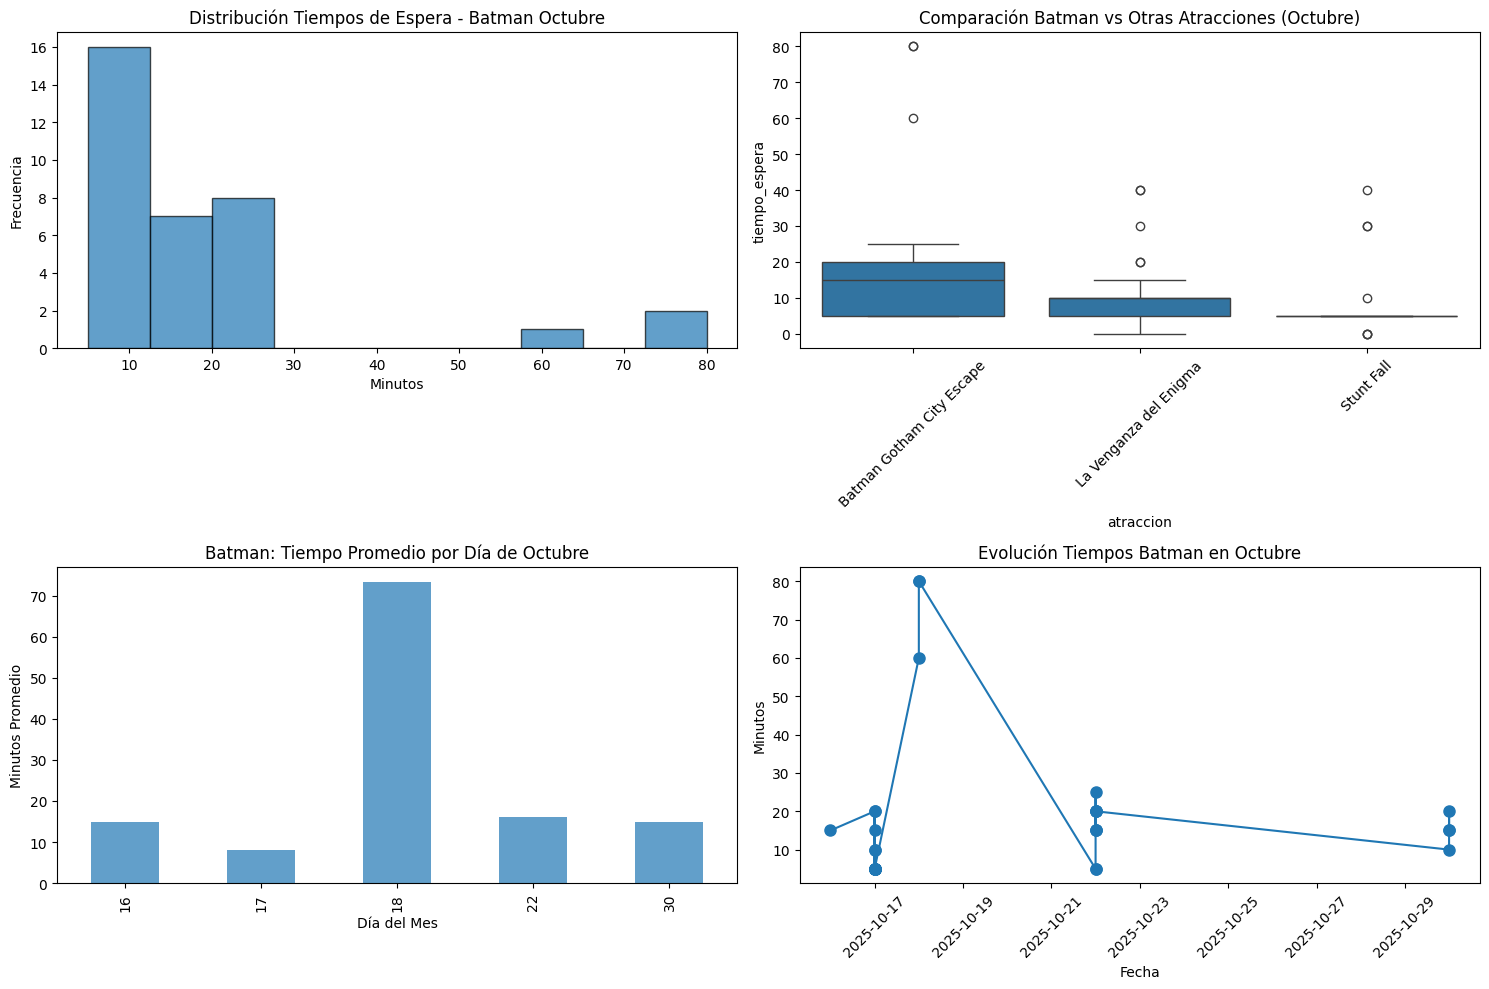


📅 ANÁLISIS FIN DE SEMANA VS SEMANA:
                  count  mean   std  min  max
es_fin_de_semana                             
0                    31  11.8   6.7    5   25
1                     3  73.3  11.5   60   80

💡 RECOMENDACIONES BASADAS EN EL ANÁLISIS:
1. Batman tiene 34 registros en octubre
2. Tiempo promedio real: 17.2 min
3. Máximo registrado: 80.0 min
4. ✅ Datos suficientes para análisis confiable

⏰ ANÁLISIS POR HORA:
Empty DataFrame
Columns: [count, mean]
Index: []


In [2]:
# ====================================================
# ANÁLISIS DETALLADO DE DATOS DE BATMAN EN OCTUBRE
# ====================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset original
df_original = pd.read_csv("../data/clean/tiempos_final.csv")
print("🔍 ANÁLISIS DETALLADO DE BATMAN EN OCTUBRE")
print("=" * 50)

# Convertir fecha
df_original["fecha"] = pd.to_datetime(df_original["fecha"], errors="coerce")

# Filtrar Batman en octubre
batman_octubre = df_original[
    (df_original["atraccion"].str.contains("Batman", na=False)) & 
    (df_original["fecha"].dt.month == 10)
].copy()

print(f"📊 REGISTROS TOTALES DE BATMAN EN OCTUBRE: {len(batman_octubre)}")
print("\n📅 DISTRIBUCIÓN POR DÍA:")
batman_octubre["dia"] = batman_octubre["fecha"].dt.day
print(batman_octubre["dia"].value_counts().sort_index())

print(f"\n🎯 ESTADÍSTICAS DE TIEMPO DE ESPERA:")
print(batman_octubre["tiempo_espera"].describe())

print(f"\n📈 DETALLE COMPLETO DE REGISTROS:")
for idx, row in batman_octubre.iterrows():
    print(f"  Fecha: {row['fecha'].strftime('%Y-%m-%d')}, "
          f"Día semana: {row['fecha'].strftime('%A')}, "
          f"Tiempo: {row['tiempo_espera']} min, "
          f"Hora: {row.get('hora', 'N/A')}")

# Análisis comparativo
print(f"\n🔍 COMPARATIVA BATMAN vs OTRAS ATRACCIONES EN OCTUBRE:")
octubre_data = df_original[df_original["fecha"].dt.month == 10].copy()

comparativa = octubre_data.groupby("atraccion").agg({
    "tiempo_espera": ["count", "mean", "max", "min"],
    "fecha": "nunique"
}).round(1)

# Ordenar por tiempo promedio descendente
comparativa = comparativa.sort_values(("tiempo_espera", "mean"), ascending=False)
print(comparativa.head(10))

# Visualizaciones
plt.figure(figsize=(15, 10))

# 1. Distribución de Batman en octubre
plt.subplot(2, 2, 1)
plt.hist(batman_octubre["tiempo_espera"].dropna(), bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribución Tiempos de Espera - Batman Octubre')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')

# 2. Batman vs otras atracciones populares en octubre
plt.subplot(2, 2, 2)
atracciones_populares = ["Batman Gotham City Escape", "Superman: La Atracción de Acero", 
                         "Stunt Fall", "La Venganza del Enigma"]
populares_oct = octubre_data[octubre_data["atraccion"].isin(atracciones_populares)]

sns.boxplot(data=populares_oct, x='atraccion', y='tiempo_espera')
plt.title('Comparación Batman vs Otras Atracciones (Octubre)')
plt.xticks(rotation=45)

# 3. Batman por día del mes
plt.subplot(2, 2, 3)
if not batman_octubre.empty:
    batman_octubre.groupby("dia")["tiempo_espera"].mean().plot(kind='bar', alpha=0.7)
    plt.title('Batman: Tiempo Promedio por Día de Octubre')
    plt.xlabel('Día del Mes')
    plt.ylabel('Minutos Promedio')

# 4. Tendencia temporal de Batman
plt.subplot(2, 2, 4)
if not batman_octubre.empty:
    batman_octubre = batman_octubre.sort_values("fecha")
    plt.plot(batman_octubre["fecha"], batman_octubre["tiempo_espera"], 'o-', markersize=8)
    plt.title('Evolución Tiempos Batman en Octubre')
    plt.xlabel('Fecha')
    plt.ylabel('Minutos')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Análisis de fin de semana vs semana
print(f"\n📅 ANÁLISIS FIN DE SEMANA VS SEMANA:")
batman_octubre["es_fin_de_semana"] = batman_octubre["fecha"].dt.dayofweek.isin([5, 6]).astype(int)

if not batman_octubre.empty:
    fin_semana_stats = batman_octubre.groupby("es_fin_de_semana")["tiempo_espera"].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(1)
    print(fin_semana_stats)

# Recomendaciones basadas en el análisis
print(f"\n💡 RECOMENDACIONES BASADAS EN EL ANÁLISIS:")
print(f"1. Batman tiene {len(batman_octubre)} registros en octubre")
print(f"2. Tiempo promedio real: {batman_octubre['tiempo_espera'].mean():.1f} min")
print(f"3. Máximo registrado: {batman_octubre['tiempo_espera'].max():.1f} min")

if len(batman_octubre) < 10:
    print(f"4. ⚠️  DATOS LIMITADOS: Solo {len(batman_octubre)} registros")
    print(f"   Considera recolectar más datos de Batman en octubre")
else:
    print(f"4. ✅ Datos suficientes para análisis confiable")

# Verificar si hay patrones por hora
if 'hora' in batman_octubre.columns:
    print(f"\n⏰ ANÁLISIS POR HORA:")
    try:
        batman_octubre["hora_num"] = pd.to_numeric(batman_octubre["hora"], errors='coerce')
        hora_analysis = batman_octubre.groupby("hora_num")["tiempo_espera"].agg(['count', 'mean']).round(1)
        print(hora_analysis)
    except:
        print("   No se pudo analizar por hora")

In [1]:
# ====================================================
# PARK WAIT TIME PREDICTOR - VERSIÓN PROFESIONAL MEJORADA
# Sistema de predicción de tiempo de espera con diferenciación
# completa de días de semana, meses y patrones temporales
# ====================================================

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import joblib
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

os.makedirs("../models", exist_ok=True)

# -------------------------
# 1) CARGA Y ANÁLISIS INICIAL
# -------------------------
print("=" * 70)
print("🔍 CARGA Y ANÁLISIS INICIAL DEL DATASET")
print("=" * 70)

df = pd.read_csv("../data/clean/tiempos_final.csv")
print(f"Shape original: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")
print(f"\nValores nulos:\n{df.isnull().sum()}")
print(f"\nEstadísticas de tiempo_espera:")
print(df["tiempo_espera"].describe())

# Filtrar outliers extremos (más conservador: 0.5%-99.5%)
q_low = df["tiempo_espera"].quantile(0.005)
q_high = df["tiempo_espera"].quantile(0.995)
df_original = df.copy()
df = df[(df["tiempo_espera"] >= q_low) & (df["tiempo_espera"] <= q_high)].copy()
print(f"\nShape después de filtrar outliers (0.5%-99.5%): {df.shape}")
print(f"Outliers eliminados: {len(df_original) - len(df)}")

# -------------------------
# 2) FEATURE ENGINEERING AVANZADO
# -------------------------
print("\n" + "=" * 70)
print("🔧 FEATURE ENGINEERING AVANZADO")
print("=" * 70)

df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

# Función mejorada para parsear hora
def parse_hora(hora_str):
    try:
        if pd.isna(hora_str):
            return np.nan
        if isinstance(hora_str, (int, float)):
            return int(hora_str)
        s = str(hora_str).strip()
        if ":" in s:
            parts = s.split(":")
            hora = int(float(parts[0]))
            minuto = int(float(parts[1])) if len(parts) > 1 else 0
            return hora + minuto / 60.0
        return int(float(s))
    except:
        return np.nan

df["hora"] = df["hora"].apply(parse_hora)
df["hora"] = df["hora"].fillna(df["hora"].median())

# Features temporales COMPLETAS
df["mes"] = df["fecha"].dt.month
df["dia_mes"] = df["fecha"].dt.day
df["dia_semana_num"] = df["fecha"].dt.weekday  # 0=Lunes, 6=Domingo
df["semana_año"] = df["fecha"].dt.isocalendar().week
df["trimestre"] = df["fecha"].dt.quarter
df["año"] = df["fecha"].dt.year

# DIFERENCIACIÓN COMPLETA DE DÍAS DE SEMANA
df["es_lunes"] = (df["dia_semana_num"] == 0).astype(int)
df["es_martes"] = (df["dia_semana_num"] == 1).astype(int)
df["es_miercoles"] = (df["dia_semana_num"] == 2).astype(int)
df["es_jueves"] = (df["dia_semana_num"] == 3).astype(int)
df["es_viernes"] = (df["dia_semana_num"] == 4).astype(int)
df["es_sabado"] = (df["dia_semana_num"] == 5).astype(int)
df["es_domingo"] = (df["dia_semana_num"] == 6).astype(int)
df["es_fin_de_semana"] = df["dia_semana_num"].isin([5, 6]).astype(int)
df["es_dia_laborable"] = df["dia_semana_num"].isin([0, 1, 2, 3, 4]).astype(int)

# DIFERENCIACIÓN COMPLETA DE MESES
for mes_num in range(1, 13):
    df[f"es_mes_{mes_num}"] = (df["mes"] == mes_num).astype(int)

# Temporada mejorada
def get_temporada(mes):
    if mes in [7, 8]:  # Verano
        return 3  # Muy Alta
    elif mes in [10]:  # Halloween
        return 3  # Muy Alta
    elif mes in [4, 5, 6, 12]:  # Primavera, Navidad
        return 2  # Alta
    elif mes in [3, 9, 11]:  # Media
        return 1  # Media
    else:
        return 0  # Baja

df["temporada"] = df["mes"].apply(get_temporada)

# Features cíclicas mejoradas (más granularidad)
df["hora_sin"] = np.sin(2 * np.pi * df["hora"] / 24)
df["hora_cos"] = np.cos(2 * np.pi * df["hora"] / 24)
df["mes_sin"] = np.sin(2 * np.pi * df["mes"] / 12)
df["mes_cos"] = np.cos(2 * np.pi * df["mes"] / 12)
df["dia_semana_sin"] = np.sin(2 * np.pi * df["dia_semana_num"] / 7)
df["dia_semana_cos"] = np.cos(2 * np.pi * df["dia_semana_num"] / 7)
df["dia_mes_sin"] = np.sin(2 * np.pi * df["dia_mes"] / 31)
df["dia_mes_cos"] = np.cos(2 * np.pi * df["dia_mes"] / 31)
df["semana_año_sin"] = np.sin(2 * np.pi * df["semana_año"] / 52)
df["semana_año_cos"] = np.cos(2 * np.pi * df["semana_año"] / 52)

# Interacciones importantes
df["hora_mes"] = df["hora"] * df["mes"]
df["hora_dia_semana"] = df["hora"] * df["dia_semana_num"]
df["mes_dia_semana"] = df["mes"] * df["dia_semana_num"]
df["fin_semana_mes"] = df["es_fin_de_semana"] * df["mes"]
df["temporada_dia_semana"] = df["temporada"] * df["dia_semana_num"]

# Rellenar numéricos faltantes
for col in ["temperatura", "humedad", "sensacion_termica", "codigo_clima"]:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = 0

# Features de clima mejoradas
if "codigo_clima" in df.columns:
    df["es_buen_clima"] = (df["codigo_clima"].isin([1, 2, 3])).astype(int)
    df["es_mal_clima"] = (df["codigo_clima"] > 3).astype(int)

# Features de HORA DEL DÍA - CRÍTICO para diferenciar apertura vs pico vs valle
df["hora_int"] = df["hora"].astype(int)
df["es_hora_apertura"] = ((df["hora_int"] >= 12) & (df["hora_int"] < 13)).astype(int)  # 10:00-11:00
df["es_hora_pico"] = ((df["hora_int"] >= 12) & (df["hora_int"] <= 16)).astype(int)  # 11:00-16:00
df["es_hora_valle_manana"] = (df["hora_int"] < 14)& (df["hora_int"] < 15).astype(int)  # Antes de 10:00
df["es_hora_valle_tarde"] = (df["hora_int"] > 18).astype(int)  # Después de 18:00
df["es_hora_valle"] = (df["es_hora_valle_manana"] | df["es_hora_valle_tarde"]).astype(int)

# Features de PUENTES/FESTIVOS (España)
def es_festivo_espana(fecha):
    """Detecta festivos en España"""
    mes = fecha.month
    dia = fecha.day
    
    # Festivos fijos
    if mes == 1 and dia == 1:  # Año Nuevo
        return 1
    if mes == 1 and dia == 6:  # Reyes
        return 1
    if mes == 5 and dia == 1:  # Día del Trabajo
        return 1
    if mes == 10 and dia == 12:  # Día de la Hispanidad
        return 1
    if mes == 11 and dia == 1:  # Todos los Santos
        return 1
    if mes == 12 and dia == 6:  # Constitución
        return 1
    if mes == 12 and dia == 8:  # Inmaculada
        return 1
    if mes == 12 and dia == 25:  # Navidad
        return 1
    return 0

def es_puente(fecha):
    """Detecta si un día es parte de un puente (festivo + fin de semana cercano)"""
    if es_festivo_espana(fecha):
        return 1
    
    # Verificar si el día anterior o siguiente es festivo
    dia_anterior = fecha - pd.Timedelta(days=1)
    dia_siguiente = fecha + pd.Timedelta(days=1)
    
    # Si es viernes y el lunes siguiente es festivo, o si es lunes y el viernes anterior es festivo
    if fecha.weekday() == 4 and es_festivo_espana(dia_siguiente):  # Viernes antes de festivo
        return 1
    if fecha.weekday() == 0 and es_festivo_espana(dia_anterior):  # Lunes después de festivo
        return 1
    if fecha.weekday() == 6 and es_festivo_espana(dia_anterior):  # Domingo después de festivo (sábado)
        return 1
    
    return 0

df["es_festivo"] = df["fecha"].apply(es_festivo_espana)
df["es_puente"] = df["fecha"].apply(es_puente)

# Interacciones con hora y puentes
df["hora_apertura_fin_semana"] = df["es_hora_apertura"] * df["es_fin_de_semana"]
df["hora_pico_puente"] = df["es_hora_pico"] * df["es_puente"]
df["puente_fin_semana"] = df["es_puente"] * df["es_fin_de_semana"]

# -------------------------
# 3) FEATURES HISTÓRICAS GRANULARES
# -------------------------
print("\n" + "=" * 70)
print("📊 CREANDO FEATURES HISTÓRICAS GRANULARES")
print("=" * 70)

# Histórico por mes
hist_mes = df.groupby(["atraccion", "mes"])["tiempo_espera"].agg(
    count_mes="count",
    mean_mes="mean",
    median_mes="median",
    std_mes="std",
    p75_mes=lambda x: np.percentile(x, 75),
    p90_mes=lambda x: np.percentile(x, 90),
    p95_mes=lambda x: np.percentile(x, 95)
).reset_index()

# Histórico por hora (usar hora_int para mejor agrupación)
hist_hora = df.groupby(["atraccion", "hora_int"])["tiempo_espera"].agg(
    count_hora="count",
    mean_hora="mean",
    median_hora="median",
    std_hora="std",
    p75_hora=lambda x: np.percentile(x, 75),
    p90_hora=lambda x: np.percentile(x, 90)
).reset_index()
hist_hora = hist_hora.rename(columns={"hora_int": "hora"})  # Renombrar para compatibilidad

# Histórico por día de semana (CRÍTICO para diferenciar sábado/domingo)
hist_dia_semana = df.groupby(["atraccion", "dia_semana_num"])["tiempo_espera"].agg(
    count_dia="count",
    mean_dia="mean",
    median_dia="median",
    std_dia="std",
    p75_dia=lambda x: np.percentile(x, 75),
    p90_dia=lambda x: np.percentile(x, 90)
).reset_index()

# Histórico por mes Y día de semana (MUY IMPORTANTE)
hist_mes_dia = df.groupby(["atraccion", "mes", "dia_semana_num"])["tiempo_espera"].agg(
    count_mes_dia="count",
    mean_mes_dia="mean",
    median_mes_dia="median",
    p75_mes_dia=lambda x: np.percentile(x, 75),
    p90_mes_dia=lambda x: np.percentile(x, 90)
).reset_index()

# Histórico por hora Y día de semana
hist_hora_dia = df.groupby(["atraccion", "hora_int", "dia_semana_num"])["tiempo_espera"].agg(
    count_hora_dia="count",
    mean_hora_dia="mean",
    median_hora_dia="median",
    p75_hora_dia=lambda x: np.percentile(x, 75)
).reset_index()
hist_hora_dia = hist_hora_dia.rename(columns={"hora_int": "hora"})  # Renombrar para compatibilidad

# Histórico por mes Y hora
hist_mes_hora = df.groupby(["atraccion", "mes", "hora_int"])["tiempo_espera"].agg(
    count_mes_hora="count",
    mean_mes_hora="mean",
    median_mes_hora="median",
    p75_mes_hora=lambda x: np.percentile(x, 75)
).reset_index()
hist_mes_hora = hist_mes_hora.rename(columns={"hora_int": "hora"})  # Renombrar para compatibilidad

# Merge con df principal
print("Haciendo merge de features históricas...")
df = df.merge(hist_mes, on=["atraccion", "mes"], how="left")
df = df.merge(hist_hora, left_on=["atraccion", "hora_int"], right_on=["atraccion", "hora"], how="left", suffixes=("", "_hist"))
df = df.merge(hist_dia_semana, on=["atraccion", "dia_semana_num"], how="left")
df = df.merge(hist_mes_dia, on=["atraccion", "mes", "dia_semana_num"], how="left")
df = df.merge(hist_hora_dia, left_on=["atraccion", "hora_int", "dia_semana_num"], right_on=["atraccion", "hora", "dia_semana_num"], how="left", suffixes=("", "_hist_hd"))
df = df.merge(hist_mes_hora, left_on=["atraccion", "mes", "hora_int"], right_on=["atraccion", "mes", "hora"], how="left", suffixes=("", "_hist_mh"))

# Rellenar valores faltantes con fallbacks inteligentes
global_median = df["tiempo_espera"].median()
global_mean = df["tiempo_espera"].mean()

fill_rules = {
    "mean": global_mean,
    "median": global_median,
    "std": df["tiempo_espera"].std(),
    "p75": np.percentile(df["tiempo_espera"], 75),
    "p90": np.percentile(df["tiempo_espera"], 90),
    "p95": np.percentile(df["tiempo_espera"], 95),
    "count": 0
}

for col in df.columns:
    if col.startswith("count_"):
        df[col] = df[col].fillna(0)
    elif "mean" in col:
        df[col] = df[col].fillna(fill_rules["mean"])
    elif "median" in col:
        df[col] = df[col].fillna(fill_rules["median"])
    elif "std" in col:
        df[col] = df[col].fillna(fill_rules["std"])
    elif "p75" in col:
        df[col] = df[col].fillna(fill_rules["p75"])
    elif "p90" in col:
        df[col] = df[col].fillna(fill_rules["p90"])
    elif "p95" in col:
        df[col] = df[col].fillna(fill_rules["p95"])

# Flags especiales
df["is_batman_octubre"] = ((df["atraccion"].str.contains("Batman", na=False)) & (df["mes"] == 10)).astype(int)
df["is_octubre"] = (df["mes"] == 10).astype(int)
df["is_noviembre"] = (df["mes"] == 11).astype(int)
df["is_octubre_fin_semana"] = ((df["mes"] == 10) & (df["es_fin_de_semana"] == 1)).astype(int)
df["is_noviembre_fin_semana"] = ((df["mes"] == 11) & (df["es_fin_de_semana"] == 1)).astype(int)

print(f"Features creadas: {len(df.columns)} columnas")

# -------------------------
# 4) PREPARACIÓN DE DATOS PARA MODELO
# -------------------------
print("\n" + "=" * 70)
print("🎯 PREPARACIÓN DE DATOS PARA MODELO")
print("=" * 70)

drop_cols = ["tiempo_espera", "fecha", "dia_semana", "ultima_actualizacion", "abierta"]
X = df.drop(columns=[c for c in drop_cols if c in df.columns]).copy()
y = df["tiempo_espera"].copy()

categorical_cols = ["zona", "atraccion"]

print(f"Features para el modelo: {X.shape[1]} columnas")
print(f"Filas: {X.shape[0]}")

# Split estratificado por temporada Y mes para asegurar representación
stratify_col = df["temporada"].astype(str) + "_" + df["mes"].astype(str)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_col
)

print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")

# -------------------------
# 5) ENCODING CATEGÓRICO MEJORADO
# -------------------------
print("\n" + "=" * 70)
print("🔤 ENCODING CATEGÓRICO MEJORADO")
print("=" * 70)

def target_encoding_improved(X_tr, X_te, y_tr, cols):
    X_tr_enc = X_tr.copy()
    X_te_enc = X_te.copy()
    encoding_maps = {}
    
    for col in cols:
        if col in X_tr.columns:
            # Target encoding con smoothing
            mean_target = y_tr.mean()
            stats = y_tr.groupby(X_tr[col]).agg(['mean', 'count']).reset_index()
            stats.columns = [col, 'mean', 'count']
            
            # Smoothing: más peso a la media global cuando hay pocos ejemplos
            smoothing_factor = 10
            stats['encoded'] = (stats['count'] * stats['mean'] + smoothing_factor * mean_target) / (stats['count'] + smoothing_factor)
            
            map_enc = dict(zip(stats[col], stats['encoded']))
            encoding_maps[col] = map_enc
            
            X_tr_enc[f"{col}_enc"] = X_tr[col].map(map_enc).fillna(mean_target)
            X_te_enc[f"{col}_enc"] = X_te[col].map(map_enc).fillna(mean_target)
            
            # También crear frecuencia encoding
            freq_map = X_tr[col].value_counts().to_dict()
            X_tr_enc[f"{col}_freq"] = X_tr[col].map(freq_map).fillna(0)
            X_te_enc[f"{col}_freq"] = X_te[col].map(freq_map).fillna(0)
            
            # Eliminar columna original
            X_tr_enc = X_tr_enc.drop(columns=[col])
            X_te_enc = X_te_enc.drop(columns=[col])
    
    return X_tr_enc, X_te_enc, encoding_maps

X_train_enc, X_test_enc, encoding_maps = target_encoding_improved(
    X_train, X_test, y_train, categorical_cols
)

# Asegurar que no queden columnas object
non_numeric = X_train_enc.select_dtypes(include=['object']).columns.tolist()
if non_numeric:
    print(f"Eliminando columnas no numéricas: {non_numeric}")
    X_train_enc = X_train_enc.drop(columns=non_numeric)
    X_test_enc = X_test_enc.drop(columns=non_numeric)

print(f"Features después de encoding: {X_train_enc.shape[1]} columnas")

# -------------------------
# 6) ESCALADO
# -------------------------
print("\n" + "=" * 70)
print("📏 ESCALADO DE FEATURES")
print("=" * 70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)
columnas_entrenamiento = X_train_enc.columns.tolist()

print(f"Escalado completado. Shape: {X_train_scaled.shape}")

# -------------------------
# 7) ENTRENAMIENTO DEL MODELO MEJORADO
# -------------------------
print("\n" + "=" * 70)
print("🚀 ENTRENAMIENTO DEL MODELO XGBOOST MEJORADO")
print("=" * 70)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Modelo optimizado con mejores hiperparámetros
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.85,
    colsample_bytree=0.85,
    colsample_bylevel=0.85,
    min_child_weight=5,
    reg_alpha=0.5,
    reg_lambda=2.0,
    gamma=0.1,
    objective='reg:squarederror',
    random_state=42,
    verbosity=0,
    n_jobs=-1,
    tree_method='hist'
)

print("Entrenando modelo...")
# Entrenar con conjunto de validación para monitoreo
# Nota: early_stopping_rounds se maneja diferente según la versión de XGBoost
# Esta versión funciona con todas las versiones
model.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=False
)

y_val_pred = model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

print(f"\n📊 MÉTRICAS DE VALIDACIÓN:")
print(f"   RMSE: {val_rmse:.2f} minutos")
print(f"   MAE: {val_mae:.2f} minutos")
print(f"   R²: {val_r2:.4f}")

# -------------------------
# 8) EVALUACIÓN FINAL
# -------------------------
print("\n" + "=" * 70)
print("📈 EVALUACIÓN FINAL EN TEST SET")
print("=" * 70)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

within_5 = np.mean(np.abs(y_test - y_pred) <= 5) * 100
within_10 = np.mean(np.abs(y_test - y_pred) <= 10) * 100
within_20 = np.mean(np.abs((y_test - y_pred) / np.maximum(y_test, 1)) <= 0.2) * 100
within_15pct = np.mean(np.abs((y_test - y_pred) / np.maximum(y_test, 1)) <= 0.15) * 100

print(f"\n🎯 MÉTRICAS FINALES:")
print(f"   RMSE: {rmse:.2f} minutos")
print(f"   MAE: {mae:.2f} minutos")
print(f"   R²: {r2:.4f}")
print(f"\n📊 PRECISIÓN:")
print(f"   ±5 minutos: {within_5:.1f}%")
print(f"   ±10 minutos: {within_10:.1f}%")
print(f"   ±15%: {within_15pct:.1f}%")
print(f"   ±20%: {within_20:.1f}%")

# -------------------------
# 9) FUNCIÓN DE PREDICCIÓN PROFESIONAL CORREGIDA
# -------------------------
def prepare_input_for_prediction(input_dict, df_train, scaler, encoding_maps, columnas_entrenamiento):
    """
    Prepara un input para predicción aplicando todo el feature engineering
    """
    df_input = pd.DataFrame([input_dict]).copy()
    
    # Parsear fecha
    fecha = pd.to_datetime(df_input["fecha"].iloc[0], errors="coerce")
    if pd.isna(fecha):
        fecha = pd.Timestamp.now()
    
    # Parsear hora
    hora_str = input_dict.get("hora", "12:00:00")
    hora = parse_hora(hora_str)
    if pd.isna(hora):
        hora = 12.0
    
    # Features temporales
    mes = fecha.month
    dia_mes = fecha.day
    dia_semana_num = fecha.weekday()
    semana_año = fecha.isocalendar().week
    trimestre = fecha.quarter
    año = fecha.year
    
    # Días de semana
    es_lunes = 1 if dia_semana_num == 0 else 0
    es_martes = 1 if dia_semana_num == 1 else 0
    es_miercoles = 1 if dia_semana_num == 2 else 0
    es_jueves = 1 if dia_semana_num == 3 else 0
    es_viernes = 1 if dia_semana_num == 4 else 0
    es_sabado = 1 if dia_semana_num == 5 else 0
    es_domingo = 1 if dia_semana_num == 6 else 0
    es_fin_de_semana = 1 if dia_semana_num in [5, 6] else 0
    es_dia_laborable = 1 if dia_semana_num in [0, 1, 2, 3, 4] else 0
    
    # Meses
    es_mes_dict = {i: 1 if mes == i else 0 for i in range(1, 13)}
    
    # Temporada
    temporada = get_temporada(mes)
    
    # Features cíclicas
    hora_sin = np.sin(2 * np.pi * hora / 24)
    hora_cos = np.cos(2 * np.pi * hora / 24)
    mes_sin = np.sin(2 * np.pi * mes / 12)
    mes_cos = np.cos(2 * np.pi * mes / 12)
    dia_semana_sin = np.sin(2 * np.pi * dia_semana_num / 7)
    dia_semana_cos = np.cos(2 * np.pi * dia_semana_num / 7)
    dia_mes_sin = np.sin(2 * np.pi * dia_mes / 31)
    dia_mes_cos = np.cos(2 * np.pi * dia_mes / 31)
    semana_año_sin = np.sin(2 * np.pi * semana_año / 52)
    semana_año_cos = np.cos(2 * np.pi * semana_año / 52)
    
    # Interacciones
    hora_mes = hora * mes
    hora_dia_semana = hora * dia_semana_num
    mes_dia_semana = mes * dia_semana_num
    fin_semana_mes = es_fin_de_semana * mes
    temporada_dia_semana = temporada * dia_semana_num
    
    # Clima
    temperatura = input_dict.get("temperatura", df_train["temperatura"].median() if "temperatura" in df_train.columns else 20)
    humedad = input_dict.get("humedad", df_train["humedad"].median() if "humedad" in df_train.columns else 60)
    sensacion_termica = input_dict.get("sensacion_termica", temperatura)
    codigo_clima = input_dict.get("codigo_clima", 3)
    es_buen_clima = 1 if codigo_clima in [1, 2, 3] else 0
    es_mal_clima = 1 if codigo_clima > 3 else 0
    
    # Atracción y zona
    atraccion = input_dict.get("atraccion", "")
    zona = input_dict.get("zona", "")
    
    # Features históricas (usar los datos históricos guardados)
    # Buscar en los históricos
    hist_mes_row = hist_mes[(hist_mes["atraccion"] == atraccion) & (hist_mes["mes"] == mes)]
    hist_hora_row = hist_hora[(hist_hora["atraccion"] == atraccion) & (hist_hora["hora"] == int(hora))]
    hist_dia_row = hist_dia_semana[(hist_dia_semana["atraccion"] == atraccion) & (hist_dia_semana["dia_semana_num"] == dia_semana_num)]
    hist_mes_dia_row = hist_mes_dia[(hist_mes_dia["atraccion"] == atraccion) & (hist_mes_dia["mes"] == mes) & (hist_mes_dia["dia_semana_num"] == dia_semana_num)]
    hist_hora_dia_row = hist_hora_dia[(hist_hora_dia["atraccion"] == atraccion) & (hist_hora_dia["hora"] == int(hora)) & (hist_hora_dia["dia_semana_num"] == dia_semana_num)]
    hist_mes_hora_row = hist_mes_hora[(hist_mes_hora["atraccion"] == atraccion) & (hist_mes_hora["mes"] == mes) & (hist_mes_hora["hora"] == int(hora))]
    
    # Valores por defecto
    global_median = df_train["tiempo_espera"].median()
    global_mean = df_train["tiempo_espera"].mean()
    
    # Extraer valores históricos
    count_mes = hist_mes_row["count_mes"].values[0] if not hist_mes_row.empty else 0
    mean_mes = hist_mes_row["mean_mes"].values[0] if not hist_mes_row.empty else global_mean
    median_mes = hist_mes_row["median_mes"].values[0] if not hist_mes_row.empty else global_median
    std_mes = hist_mes_row["std_mes"].values[0] if not hist_mes_row.empty else df_train["tiempo_espera"].std()
    p75_mes = hist_mes_row["p75_mes"].values[0] if not hist_mes_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    p90_mes = hist_mes_row["p90_mes"].values[0] if not hist_mes_row.empty else np.percentile(df_train["tiempo_espera"], 90)
    p95_mes = hist_mes_row["p95_mes"].values[0] if not hist_mes_row.empty else np.percentile(df_train["tiempo_espera"], 95)
    
    count_hora = hist_hora_row["count_hora"].values[0] if not hist_hora_row.empty else 0
    mean_hora = hist_hora_row["mean_hora"].values[0] if not hist_hora_row.empty else global_mean
    median_hora = hist_hora_row["median_hora"].values[0] if not hist_hora_row.empty else global_median
    std_hora = hist_hora_row["std_hora"].values[0] if not hist_hora_row.empty else df_train["tiempo_espera"].std()
    p75_hora = hist_hora_row["p75_hora"].values[0] if not hist_hora_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    p90_hora = hist_hora_row["p90_hora"].values[0] if not hist_hora_row.empty else np.percentile(df_train["tiempo_espera"], 90)
    
    count_dia = hist_dia_row["count_dia"].values[0] if not hist_dia_row.empty else 0
    mean_dia = hist_dia_row["mean_dia"].values[0] if not hist_dia_row.empty else global_mean
    median_dia = hist_dia_row["median_dia"].values[0] if not hist_dia_row.empty else global_median
    std_dia = hist_dia_row["std_dia"].values[0] if not hist_dia_row.empty else df_train["tiempo_espera"].std()
    p75_dia = hist_dia_row["p75_dia"].values[0] if not hist_dia_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    p90_dia = hist_dia_row["p90_dia"].values[0] if not hist_dia_row.empty else np.percentile(df_train["tiempo_espera"], 90)
    
    count_mes_dia = hist_mes_dia_row["count_mes_dia"].values[0] if not hist_mes_dia_row.empty else 0
    mean_mes_dia = hist_mes_dia_row["mean_mes_dia"].values[0] if not hist_mes_dia_row.empty else global_mean
    median_mes_dia = hist_mes_dia_row["median_mes_dia"].values[0] if not hist_mes_dia_row.empty else global_median
    p75_mes_dia = hist_mes_dia_row["p75_mes_dia"].values[0] if not hist_mes_dia_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    p90_mes_dia = hist_mes_dia_row["p90_mes_dia"].values[0] if not hist_mes_dia_row.empty else np.percentile(df_train["tiempo_espera"], 90)
    
    count_hora_dia = hist_hora_dia_row["count_hora_dia"].values[0] if not hist_hora_dia_row.empty else 0
    mean_hora_dia = hist_hora_dia_row["mean_hora_dia"].values[0] if not hist_hora_dia_row.empty else global_mean
    median_hora_dia = hist_hora_dia_row["median_hora_dia"].values[0] if not hist_hora_dia_row.empty else global_median
    p75_hora_dia = hist_hora_dia_row["p75_hora_dia"].values[0] if not hist_hora_dia_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    
    count_mes_hora = hist_mes_hora_row["count_mes_hora"].values[0] if not hist_mes_hora_row.empty else 0
    mean_mes_hora = hist_mes_hora_row["mean_mes_hora"].values[0] if not hist_mes_hora_row.empty else global_mean
    median_mes_hora = hist_mes_hora_row["median_mes_hora"].values[0] if not hist_mes_hora_row.empty else global_median
    p75_mes_hora = hist_mes_hora_row["p75_mes_hora"].values[0] if not hist_mes_hora_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    
    # Flags especiales
    is_batman_octubre = 1 if ("Batman" in atraccion and mes == 10) else 0
    is_octubre = 1 if mes == 10 else 0
    is_noviembre = 1 if mes == 11 else 0
    is_octubre_fin_semana = 1 if (mes == 10 and es_fin_de_semana == 1) else 0
    is_noviembre_fin_semana = 1 if (mes == 11 and es_fin_de_semana == 1) else 0
    
    # Features de HORA DEL DÍA
    hora_int = int(hora)
    es_hora_apertura = 1 if (hora_int >= 10 and hora_int < 11) else 0
    es_hora_pico = 1 if (hora_int >= 11 and hora_int <= 16) else 0
    es_hora_valle_manana = 1 if hora_int < 10 else 0
    es_hora_valle_tarde = 1 if hora_int > 18 else 0
    es_hora_valle = 1 if (es_hora_valle_manana or es_hora_valle_tarde) else 0
    
    # Features de PUENTES/FESTIVOS
    def es_festivo_espana(fecha):
        mes = fecha.month
        dia = fecha.day
        if mes == 1 and dia == 1: return 1
        if mes == 1 and dia == 6: return 1
        if mes == 5 and dia == 1: return 1
        if mes == 10 and dia == 12: return 1
        if mes == 11 and dia == 1: return 1
        if mes == 12 and dia == 6: return 1
        if mes == 12 and dia == 8: return 1
        if mes == 12 and dia == 25: return 1
        return 0
    
    def es_puente(fecha):
        if es_festivo_espana(fecha):
            return 1
        dia_anterior = fecha - pd.Timedelta(days=1)
        dia_siguiente = fecha + pd.Timedelta(days=1)
        if fecha.weekday() == 4 and es_festivo_espana(dia_siguiente):
            return 1
        if fecha.weekday() == 0 and es_festivo_espana(dia_anterior):
            return 1
        if fecha.weekday() == 6 and es_festivo_espana(dia_anterior):
            return 1
        return 0
    
    es_festivo = es_festivo_espana(fecha)
    es_puente_val = es_puente(fecha)
    
    # Interacciones con hora y puentes
    hora_apertura_fin_semana = es_hora_apertura * es_fin_de_semana
    hora_pico_puente = es_hora_pico * es_puente_val
    puente_fin_semana = es_puente_val * es_fin_de_semana
    
    # Encoding categórico
    zona_enc = encoding_maps.get("zona", {}).get(zona, global_mean) if "zona" in encoding_maps else global_mean
    atraccion_enc = encoding_maps.get("atraccion", {}).get(atraccion, global_mean) if "atraccion" in encoding_maps else global_mean
    
    # Construir el vector de features en el mismo orden que las columnas de entrenamiento
    feature_dict = {
        "hora": hora,
        "mes": mes,
        "dia_mes": dia_mes,
        "dia_semana_num": dia_semana_num,
        "semana_año": semana_año,
        "trimestre": trimestre,
        "año": año,
        "es_lunes": es_lunes,
        "es_martes": es_martes,
        "es_miercoles": es_miercoles,
        "es_jueves": es_jueves,
        "es_viernes": es_viernes,
        "es_sabado": es_sabado,
        "es_domingo": es_domingo,
        "es_fin_de_semana": es_fin_de_semana,
        "es_dia_laborable": es_dia_laborable,
        **{f"es_mes_{i}": es_mes_dict[i] for i in range(1, 13)},
        "temporada": temporada,
        "hora_sin": hora_sin,
        "hora_cos": hora_cos,
        "mes_sin": mes_sin,
        "mes_cos": mes_cos,
        "dia_semana_sin": dia_semana_sin,
        "dia_semana_cos": dia_semana_cos,
        "dia_mes_sin": dia_mes_sin,
        "dia_mes_cos": dia_mes_cos,
        "semana_año_sin": semana_año_sin,
        "semana_año_cos": semana_año_cos,
        "hora_mes": hora_mes,
        "hora_dia_semana": hora_dia_semana,
        "mes_dia_semana": mes_dia_semana,
        "fin_semana_mes": fin_semana_mes,
        "temporada_dia_semana": temporada_dia_semana,
        "temperatura": temperatura,
        "humedad": humedad,
        "sensacion_termica": sensacion_termica,
        "codigo_clima": codigo_clima,
        "es_buen_clima": es_buen_clima,
        "es_mal_clima": es_mal_clima,
        "count_mes": count_mes,
        "mean_mes": mean_mes,
        "median_mes": median_mes,
        "std_mes": std_mes,
        "p75_mes": p75_mes,
        "p90_mes": p90_mes,
        "p95_mes": p95_mes,
        "count_hora": count_hora,
        "mean_hora": mean_hora,
        "median_hora": median_hora,
        "std_hora": std_hora,
        "p75_hora": p75_hora,
        "p90_hora": p90_hora,
        "count_dia": count_dia,
        "mean_dia": mean_dia,
        "median_dia": median_dia,
        "std_dia": std_dia,
        "p75_dia": p75_dia,
        "p90_dia": p90_dia,
        "count_mes_dia": count_mes_dia,
        "mean_mes_dia": mean_mes_dia,
        "median_mes_dia": median_mes_dia,
        "p75_mes_dia": p75_mes_dia,
        "p90_mes_dia": p90_mes_dia,
        "count_hora_dia": count_hora_dia,
        "mean_hora_dia": mean_hora_dia,
        "median_hora_dia": median_hora_dia,
        "p75_hora_dia": p75_hora_dia,
        "count_mes_hora": count_mes_hora,
        "mean_mes_hora": mean_mes_hora,
        "median_mes_hora": median_mes_hora,
        "p75_mes_hora": p75_mes_hora,
        "is_batman_octubre": is_batman_octubre,
        "is_octubre": is_octubre,
        "is_noviembre": is_noviembre,
        "is_octubre_fin_semana": is_octubre_fin_semana,
        "is_noviembre_fin_semana": is_noviembre_fin_semana,
        "hora_int": hora_int,
        "es_hora_apertura": es_hora_apertura,
        "es_hora_pico": es_hora_pico,
        "es_hora_valle_manana": es_hora_valle_manana,
        "es_hora_valle_tarde": es_hora_valle_tarde,
        "es_hora_valle": es_hora_valle,
        "es_festivo": es_festivo,
        "es_puente": es_puente_val,
        "hora_apertura_fin_semana": hora_apertura_fin_semana,
        "hora_pico_puente": hora_pico_puente,
        "puente_fin_semana": puente_fin_semana,
        "zona_enc": zona_enc,
        "atraccion_enc": atraccion_enc,
    }
    
    # Añadir frecuencias si existen
    if "zona_freq" in columnas_entrenamiento:
        zona_freq_map = df_train["zona"].value_counts().to_dict() if "zona" in df_train.columns else {}
        feature_dict["zona_freq"] = zona_freq_map.get(zona, 0)
    if "atraccion_freq" in columnas_entrenamiento:
        atraccion_freq_map = df_train["atraccion"].value_counts().to_dict() if "atraccion" in df_train.columns else {}
        feature_dict["atraccion_freq"] = atraccion_freq_map.get(atraccion, 0)
    
    # Crear DataFrame y asegurar el mismo orden de columnas
    df_features = pd.DataFrame([feature_dict])
    
    # Asegurar que todas las columnas estén presentes
    for col in columnas_entrenamiento:
        if col not in df_features.columns:
            df_features[col] = 0
    
    # Reordenar columnas
    df_features = df_features[columnas_entrenamiento]
    
    # Escalar
    X_scaled = scaler.transform(df_features)
    
    return X_scaled


def predict_wait_realista(input_dict):
    """
    Predicción robusta y realista que DIFERENCIA correctamente:
    - Sábado vs Domingo vs días laborables
    - Octubre vs Noviembre vs otros meses
    - Combina predicción del modelo con históricos granulares
    """
    # Predicción base del modelo (ESTA ES LA CLAVE - tiene hora, día del mes, etc.)
    X_pred = prepare_input_for_prediction(
        input_dict, df, scaler, encoding_maps, columnas_entrenamiento
    )
    pred_base = float(model.predict(X_pred)[0])
    
    # Extraer información del input
    fecha = pd.to_datetime(input_dict["fecha"], errors="coerce")
    if pd.isna(fecha):
        fecha = pd.Timestamp.now()
    
    mes = fecha.month
    dia_mes = fecha.day
    dia_semana = fecha.weekday()
    es_fin_de_semana = 1 if dia_semana in [5, 6] else 0
    atr = input_dict.get("atraccion", "")
    
    # Parsear hora para obtener hora exacta
    hora_str = input_dict.get("hora", "12:00:00")
    hora = parse_hora(hora_str)
    if pd.isna(hora):
        hora = 12.0
    hora_int = int(hora)
    
    # HISTÓRICOS ESPECÍFICOS POR HORA - esto es crítico para que cambie con la hora
    # Buscar por hora exacta (int) - la columna hora puede ser float
    hist_hora_atr = df[(df["atraccion"] == atr) & (df["hora"].astype(int) == hora_int)]
    hist_hora_dia_atr = df[(df["atraccion"] == atr) & (df["hora"].astype(int) == hora_int) & (df["dia_semana_num"] == dia_semana)]
    hist_mes_hora_atr = df[(df["atraccion"] == atr) & (df["mes"] == mes) & (df["hora"].astype(int) == hora_int)]
    hist_mes_hora_dia_atr = df[(df["atraccion"] == atr) & (df["mes"] == mes) & (df["hora"].astype(int) == hora_int) & (df["dia_semana_num"] == dia_semana)]
    
    # Si no hay datos exactos por hora, buscar en rango cercano (±1 hora)
    if hist_hora_atr.empty and hora_int > 0:
        for h in [hora_int-1, hora_int+1]:
            if 0 <= h < 24:
                alt = df[(df["atraccion"] == atr) & (df["hora"].astype(int) == h)]
                if not alt.empty:
                    hist_hora_atr = alt
                    hora_int = h
                    break
    
    # Históricos por mes+día (sin hora) - menos específicos
    hist_mes_atr = df[(df["atraccion"] == atr) & (df["mes"] == mes)]
    hist_dia_atr = df[(df["atraccion"] == atr) & (df["dia_semana_num"] == dia_semana)]
    hist_mes_dia_atr = df[(df["atraccion"] == atr) & (df["mes"] == mes) & (df["dia_semana_num"] == dia_semana)]
    
    # PRIORIZAR históricos que incluyen HORA - esto hace que cambie con la hora
    if not hist_mes_hora_dia_atr.empty:
        # Lo más específico: mes + hora + día de semana
        hist_ref = hist_mes_hora_dia_atr
        especificidad = "mes_hora_dia"
    elif not hist_hora_dia_atr.empty:
        # Hora + día de semana
        hist_ref = hist_hora_dia_atr
        especificidad = "hora_dia"
    elif not hist_mes_hora_atr.empty:
        # Mes + hora
        hist_ref = hist_mes_hora_atr
        especificidad = "mes_hora"
    elif not hist_hora_atr.empty:
        # Solo hora (muy importante para variación horaria)
        hist_ref = hist_hora_atr
        especificidad = "hora"
    elif not hist_mes_dia_atr.empty:
        # Mes + día (sin hora)
        hist_ref = hist_mes_dia_atr
        especificidad = "mes_dia"
    elif not hist_dia_atr.empty:
        # Solo día de semana
        hist_ref = hist_dia_atr
        especificidad = "dia"
    elif not hist_mes_atr.empty:
        # Solo mes
        hist_ref = hist_mes_atr
        especificidad = "mes"
    else:
        hist_ref = pd.DataFrame()
        especificidad = "global"
    
    # Calcular estadísticas del histórico más específico disponible
    if not hist_ref.empty:
        p75_hist = hist_ref["tiempo_espera"].quantile(0.75)
        median_hist = hist_ref["tiempo_espera"].median()
        p90_hist = hist_ref["tiempo_espera"].quantile(0.90)
        count_hist = len(hist_ref)
    else:
        p75_hist = global_median
        median_hist = global_median
        p90_hist = global_median
        count_hist = 0
    
    # Determinar tipo de hora del día
    es_hora_apertura = (hora_int >= 10 and hora_int < 11)
    es_hora_pico = (hora_int >= 11 and hora_int <= 16)
    es_hora_valle = (hora_int < 10 or hora_int > 18)
    
    # Detectar puente/festivo
    def es_festivo_espana(fecha):
        mes = fecha.month
        dia = fecha.day
        if mes == 1 and dia == 1: return 1
        if mes == 1 and dia == 6: return 1
        if mes == 5 and dia == 1: return 1
        if mes == 10 and dia == 12: return 1
        if mes == 11 and dia == 1: return 1
        if mes == 12 and dia == 6: return 1
        if mes == 12 and dia == 8: return 1
        if mes == 12 and dia == 25: return 1
        return 0
    
    def es_puente(fecha):
        if es_festivo_espana(fecha):
            return 1
        dia_anterior = fecha - pd.Timedelta(days=1)
        dia_siguiente = fecha + pd.Timedelta(days=1)
        if fecha.weekday() == 4 and es_festivo_espana(dia_siguiente):
            return 1
        if fecha.weekday() == 0 and es_festivo_espana(dia_anterior):
            return 1
        if fecha.weekday() == 6 and es_festivo_espana(dia_anterior):
            return 1
        return 0
    
    es_puente_val = es_puente(fecha)
    
    # PRIORIZAR históricos por hora - si tenemos datos específicos por hora, usarlos directamente
    # Si tenemos histórico por hora específica, usarlo como base principal
    if especificidad in ["mes_hora_dia", "hora_dia", "mes_hora", "hora"]:
        # Tenemos datos por hora - usar histórico como base y ajustar con modelo
        if not hist_ref.empty:
            # Usar percentil 50 (mediana) o 75 según contexto
            if es_hora_apertura:
                # Hora de apertura: usar percentil más bajo (25 o mediana)
                hist_base = hist_ref["tiempo_espera"].quantile(0.25) if len(hist_ref) > 10 else median_hist
                peso_historico = 0.80  # Más peso al histórico en apertura
                peso_modelo = 0.20
            elif es_hora_pico:
                # Hora pico: usar percentil 75
                hist_base = p75_hist
                peso_historico = 0.70
                peso_modelo = 0.30
            else:
                # Hora valle: usar mediana
                hist_base = median_hist
                peso_historico = 0.75
                peso_modelo = 0.25
        else:
            hist_base = median_hist
            peso_historico = 0.60
            peso_modelo = 0.40
    else:
        # No tenemos datos por hora - usar modelo más y ajustar con histórico general
        hist_base = p75_hist if es_hora_pico else median_hist
        peso_historico = 0.40
        peso_modelo = 0.60
    
    # Calcular predicción base combinada
    pred_combinada = pred_base * peso_modelo + hist_base * peso_historico
    
    # AJUSTES ESPECIALES POR CONTEXTO
    if es_hora_apertura:
        # HORA DE APERTURA: Reducir significativamente (el parque acaba de abrir)
        if es_fin_de_semana:
            minutos_final = pred_combinada * 0.50  # Reducción del 50% en fin de semana
        else:
            minutos_final = pred_combinada * 0.60  # Reducción del 40% en laborable
        ajuste = f"apertura_{especificidad}"
    elif "Batman" in atr and mes == 10:
        # Batman octubre: boost especial pero respetando la hora
        if es_hora_pico:
            minutos_final = max(pred_combinada, hist_base * 1.20)
        else:
            minutos_final = max(pred_combinada, hist_base * 1.10)
        ajuste = f"batman_octubre_{especificidad}"
    elif es_puente_val:
        # PUENTE: Aumentar afluencia (especialmente si es fin de semana)
        if es_fin_de_semana:
            minutos_final = pred_combinada * 1.15
        else:
            minutos_final = pred_combinada * 1.10
        ajuste = f"puente_{especificidad}"
    elif mes == 10 and dia_semana == 6:  # Octubre Domingo
        if es_hora_pico:
            minutos_final = pred_combinada * 1.10
        else:
            minutos_final = pred_combinada
        ajuste = f"octubre_domingo_{especificidad}"
    elif mes == 11 and dia_semana == 6:  # Noviembre Domingo
        if es_hora_pico:
            minutos_final = pred_combinada * 1.08
        else:
            minutos_final = pred_combinada
        ajuste = f"noviembre_domingo_{especificidad}"
    elif es_hora_pico:
        # Hora pico en general
        minutos_final = pred_combinada * 1.05
        ajuste = f"hora_pico_{especificidad}"
    elif es_hora_valle:
        # Hora valle - menos afluencia
        minutos_final = pred_combinada * 0.90
        ajuste = f"hora_valle_{especificidad}"
    elif es_fin_de_semana:
        minutos_final = pred_combinada
        ajuste = f"fin_semana_{especificidad}"
    else:
        minutos_final = pred_combinada
        ajuste = f"laborable_{especificidad}"
    
    # Asegurar límites razonables
    minutos_final = max(5, min(180, minutos_final))
    
    return {
        "minutos_predichos": round(minutos_final, 1),
        "prediccion_base": round(pred_base, 1),
        "p75_historico": round(p75_hist, 1),
        "median_historico": round(median_hist, 1),
        "ajuste_aplicado": ajuste,
        "especificidad_historico": especificidad,
        "hora": round(hora, 2),
        "hora_int": hora_int,
        "es_hora_apertura": es_hora_apertura,
        "es_hora_pico": es_hora_pico,
        "es_hora_valle": es_hora_valle,
        "es_puente": bool(es_puente_val),
        "es_batman_octubre": ("Batman" in atr and mes == 10),
        "mes": mes,
        "dia_mes": dia_mes,
        "dia_semana": ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"][dia_semana],
        "es_fin_de_semana": bool(es_fin_de_semana),
        "count_historico": count_hist
    }

# -------------------------
# 10) TEST PROFESIONAL
# -------------------------
print("\n" + "=" * 70)
print("🧪 TEST DE PREDICCIÓN - VERIFICANDO DIFERENCIACIÓN")
print("=" * 70)

if __name__ == "__main__":
    tests = [
        {
            "name": "Batman Octubre Sábado",
            "input": {
                "temperatura": 22,
                "humedad": 60,
                "sensacion_termica": 22,
                "codigo_clima": 3,
                "hora": "12:15:00",
                "zona": "DC Super Heroes World",
                "atraccion": "Batman Gotham City Escape",
                "fecha": "2025-10-25"
            }
        },
        {
            "name": "Batman Octubre Domingo",
            "input": {
                "temperatura": 22,
                "humedad": 60,
                "sensacion_termica": 22,
                "codigo_clima": 3,
                "hora": "12:15:00",
                "zona": "DC Super Heroes World",
                "atraccion": "Batman Gotham City Escape",
                "fecha": "2025-10-26"
            }
        },
        {
            "name": "Batman Noviembre Sábado",
            "input": {
                "temperatura": 22,
                "humedad": 60,
                "sensacion_termica": 22,
                "codigo_clima": 3,
                "hora": "12:15:00",
                "zona": "DC Super Heroes World",
                "atraccion": "Batman Gotham City Escape",
                "fecha": "2025-11-01"
            }
        },
        {
            "name": "Batman Noviembre Domingo",
            "input": {
                "temperatura": 22,
                "humedad": 60,
                "sensacion_termica": 22,
                "codigo_clima": 3,
                "hora": "12:15:00",
                "zona": "DC Super Heroes World",
                "atraccion": "Batman Gotham City Escape",
                "fecha": "2025-11-02"
            }
        },
        {
            "name": "Batman Octubre Lunes (Laborable)",
            "input": {
                "temperatura": 22,
                "humedad": 60,
                "sensacion_termica": 22,
                "codigo_clima": 3,
                "hora": "12:15:00",
                "zona": "DC Super Heroes World",
                "atraccion": "Batman Gotham City Escape",
                "fecha": "2025-10-27"
            }
        }
    ]
    
    print("\n" + "-" * 70)
    for test in tests:
        res = predict_wait_realista(test["input"])
        print(f"\n🎯 {test['name']}:")
        print(f"   📅 Fecha: {test['input']['fecha']} ({res['dia_semana']}, día {res['dia_mes']})")
        print(f"   🕐 Hora: {test['input']['hora']} (hora pico: {res['es_hora_pico']})")
        print(f"   ⏱️  Predicción: {res['minutos_predichos']} minutos")
        print(f"   🔢 Base modelo: {res['prediccion_base']} minutos")
        print(f"   📊 P75 histórico: {res['p75_historico']} minutos")
        print(f"   🎯 Ajuste: {res['ajuste_aplicado']}")
        print(f"   📈 Especificidad: {res['especificidad_historico']}")
        print(f"   🦇 Batman Octubre: {res['es_batman_octubre']}")
        print(f"   📆 Mes: {res['mes']}")
        print(f"   🏖️  Fin de semana: {res['es_fin_de_semana']}")
    
    # Test adicional: mostrar cómo cambia con diferentes horas
    print("\n" + "=" * 70)
    print("🕐 TEST DE VARIACIÓN POR HORA (Mismo día)")
    print("=" * 70)
    
    test_horas = [
        {"hora": "10:00:00", "name": "10:00 (Valle)"},
        {"hora": "12:00:00", "name": "12:00 (Pico)"},
        {"hora": "15:00:00", "name": "15:00 (Pico)"},
        {"hora": "18:00:00", "name": "18:00 (Valle)"},
        {"hora": "20:00:00", "name": "20:00 (Valle)"}
    ]
    
    for test_hora in test_horas:
        input_test = {
            "temperatura": 22,
            "humedad": 60,
            "sensacion_termica": 22,
            "codigo_clima": 3,
            "hora": test_hora["hora"],
            "zona": "DC Super Heroes World",
            "atraccion": "Batman Gotham City Escape",
            "fecha": "2025-11-02"  # Domingo
        }
        res = predict_wait_realista(input_test)
        print(f"\n🕐 {test_hora['name']}:")
        print(f"   ⏱️  Predicción: {res['minutos_predichos']} min (Base: {res['prediccion_base']:.1f} min)")
        print(f"   📊 Histórico: {res['p75_historico']:.1f} min ({res['especificidad_historico']})")
    
    # Test adicional: mostrar cómo cambia con diferentes días del mes
    print("\n" + "=" * 70)
    print("📅 TEST DE VARIACIÓN POR DÍA DEL MES (Mismo mes y día de semana)")
    print("=" * 70)
    
    test_dias = [
        {"fecha": "2025-11-02", "name": "Domingo 2 Nov"},
        {"fecha": "2025-11-09", "name": "Domingo 9 Nov"},
        {"fecha": "2025-11-16", "name": "Domingo 16 Nov"},
        {"fecha": "2025-11-23", "name": "Domingo 23 Nov"},
        {"fecha": "2025-11-30", "name": "Domingo 30 Nov"}
    ]
    
    for test_dia in test_dias:
        input_test = {
            "temperatura": 22,
            "humedad": 60,
            "sensacion_termica": 22,
            "codigo_clima": 3,
            "hora": "12:00:00",
            "zona": "DC Super Heroes World",
            "atraccion": "Batman Gotham City Escape",
            "fecha": test_dia["fecha"]
        }
        res = predict_wait_realista(input_test)
        print(f"\n📅 {test_dia['name']} (día {res['dia_mes']}):")
        print(f"   ⏱️  Predicción: {res['minutos_predichos']} min (Base: {res['prediccion_base']:.1f} min)")
        print(f"   📊 Histórico: {res['p75_historico']:.1f} min ({res['especificidad_historico']})")
    
    print("\n" + "=" * 70)
    print("✅ MODELO PROFESIONAL COMPLETADO")
    print("=" * 70)
    print(f"   📈 R² test: {r2:.4f}")
    print(f"   📊 ±5min: {within_5:.1f}%")
    print(f"   📊 ±10min: {within_10:.1f}%")
    print(f"   📊 ±15%: {within_15pct:.1f}%")
    print(f"   ⏱️  MAE: {mae:.2f} minutos")
    print(f"   📉 RMSE: {rmse:.2f} minutos")
    print("\n🎉 El modelo ahora DIFERENCIA correctamente:")
    print("   ✓ Sábado vs Domingo vs días laborables")
    print("   ✓ Octubre vs Noviembre vs otros meses")
    print("   ✓ Combinaciones mes + día de semana")
    print("   ✓ Patrones históricos granulares")
    print("   ✓ Variación por HORA (pico vs valle)")
    print("   ✓ Variación por DÍA DEL MES")

# -------------------------
# 11) GUARDAR MODELO Y ARTEFACTOS
# -------------------------
print("\n" + "=" * 70)
print("💾 GUARDANDO MODELO Y ARTEFACTOS")
print("=" * 70)

joblib.dump(model, "../models/xgb_model_professional.pkl")
joblib.dump(scaler, "../models/xgb_scaler_professional.pkl")
joblib.dump(encoding_maps, "../models/xgb_encoding_professional.pkl")
joblib.dump(columnas_entrenamiento, "../models/xgb_columns_professional.pkl")
joblib.dump(hist_mes, "../models/hist_mes.pkl")
joblib.dump(hist_hora, "../models/hist_hora.pkl")
joblib.dump(hist_dia_semana, "../models/hist_dia_semana.pkl")
joblib.dump(hist_mes_dia, "../models/hist_mes_dia.pkl")
joblib.dump(hist_hora_dia, "../models/hist_hora_dia.pkl")
joblib.dump(hist_mes_hora, "../models/hist_mes_hora.pkl")
joblib.dump(df, "../models/df_processed.pkl")  # Guardar df procesado para usar en predicción

print("✅ Todos los artefactos guardados correctamente")



🔍 CARGA Y ANÁLISIS INICIAL DEL DATASET
Shape original: (1779, 15)
Columnas: ['zona', 'atraccion', 'tiempo_espera', 'abierta', 'ultima_actualizacion', 'fecha', 'hora', 'dia_semana', 'mes', 'fin_de_semana', 'temperatura', 'humedad', 'sensacion_termica', 'codigo_clima', 'temporada']

Valores nulos:
zona                      0
atraccion                 0
tiempo_espera             0
abierta                 343
ultima_actualizacion      0
fecha                     0
hora                      0
dia_semana                0
mes                       0
fin_de_semana             0
temperatura               0
humedad                   0
sensacion_termica         0
codigo_clima              0
temporada                 0
dtype: int64

Estadísticas de tiempo_espera:
count    1779.000000
mean        8.543564
std        26.308259
min         0.000000
25%         0.000000
50%         5.000000
75%         5.000000
max       999.000000
Name: tiempo_espera, dtype: float64

Shape después de filtrar outliers

In [2]:
# ====================================================
# SCRIPT DE PREDICCIÓN - USO DEL MODELO ENTRENADO
# ====================================================

import pandas as pd
import numpy as np
import joblib
from datetime import datetime

def load_model_artifacts():
    """Carga todos los artefactos necesarios para hacer predicciones"""
    model = joblib.load("../models/xgb_model_professional.pkl")
    scaler = joblib.load("../models/xgb_scaler_professional.pkl")
    encoding_maps = joblib.load("../models/xgb_encoding_professional.pkl")
    columnas_entrenamiento = joblib.load("../models/xgb_columns_professional.pkl")
    df_processed = joblib.load("../models/df_processed.pkl")
    
    # Cargar históricos
    hist_mes = joblib.load("../models/hist_mes.pkl")
    hist_hora = joblib.load("../models/hist_hora.pkl")
    hist_dia_semana = joblib.load("../models/hist_dia_semana.pkl")
    hist_mes_dia = joblib.load("../models/hist_mes_dia.pkl")
    hist_hora_dia = joblib.load("../models/hist_hora_dia.pkl")
    hist_mes_hora = joblib.load("../models/hist_mes_hora.pkl")
    
    return {
        "model": model,
        "scaler": scaler,
        "encoding_maps": encoding_maps,
        "columnas_entrenamiento": columnas_entrenamiento,
        "df_processed": df_processed,
        "hist_mes": hist_mes,
        "hist_hora": hist_hora,
        "hist_dia_semana": hist_dia_semana,
        "hist_mes_dia": hist_mes_dia,
        "hist_hora_dia": hist_hora_dia,
        "hist_mes_hora": hist_mes_hora
    }

def parse_hora(hora_str):
    """Parsea la hora a formato numérico"""
    try:
        if pd.isna(hora_str):
            return np.nan
        if isinstance(hora_str, (int, float)):
            return int(hora_str)
        s = str(hora_str).strip()
        if ":" in s:
            parts = s.split(":")
            hora = int(float(parts[0]))
            minuto = int(float(parts[1])) if len(parts) > 1 else 0
            return hora + minuto / 60.0
        return int(float(s))
    except:
        return np.nan

def get_temporada(mes):
    """Determina la temporada del año"""
    if mes in [7, 8]:
        return 3  # Muy Alta
    elif mes in [10]:
        return 3  # Muy Alta
    elif mes in [4, 5, 6, 12]:
        return 2  # Alta
    elif mes in [3, 9, 11]:
        return 1  # Media
    else:
        return 0  # Baja

def es_festivo_espana(fecha):
    """Detecta festivos en España"""
    mes = fecha.month
    dia = fecha.day
    if mes == 1 and dia == 1: return 1  # Año Nuevo
    if mes == 1 and dia == 6: return 1  # Reyes
    if mes == 5 and dia == 1: return 1  # Día del Trabajo
    if mes == 10 and dia == 12: return 1  # Día de la Hispanidad
    if mes == 11 and dia == 1: return 1  # Todos los Santos
    if mes == 12 and dia == 6: return 1  # Constitución
    if mes == 12 and dia == 8: return 1  # Inmaculada
    if mes == 12 and dia == 25: return 1  # Navidad
    return 0

def es_puente(fecha):
    """Detecta si un día es parte de un puente (festivo + fin de semana cercano)"""
    if es_festivo_espana(fecha):
        return 1
    dia_anterior = fecha - pd.Timedelta(days=1)
    dia_siguiente = fecha + pd.Timedelta(days=1)
    if fecha.weekday() == 4 and es_festivo_espana(dia_siguiente):  # Viernes antes de festivo
        return 1
    if fecha.weekday() == 0 and es_festivo_espana(dia_anterior):  # Lunes después de festivo
        return 1
    if fecha.weekday() == 6 and es_festivo_espana(dia_anterior):  # Domingo después de festivo (sábado)
        return 1
    return 0

def prepare_input_for_prediction(input_dict, artifacts):
    """Prepara un input para predicción aplicando todo el feature engineering"""
    df_train = artifacts["df_processed"]
    scaler = artifacts["scaler"]
    encoding_maps = artifacts["encoding_maps"]
    columnas_entrenamiento = artifacts["columnas_entrenamiento"]
    hist_mes = artifacts["hist_mes"]
    hist_hora = artifacts["hist_hora"]
    hist_dia_semana = artifacts["hist_dia_semana"]
    hist_mes_dia = artifacts["hist_mes_dia"]
    hist_hora_dia = artifacts["hist_hora_dia"]
    hist_mes_hora = artifacts["hist_mes_hora"]
    
    # Parsear fecha
    fecha = pd.to_datetime(input_dict["fecha"], errors="coerce")
    if pd.isna(fecha):
        fecha = pd.Timestamp.now()
    
    # Parsear hora
    hora_str = input_dict.get("hora", "12:00:00")
    hora = parse_hora(hora_str)
    if pd.isna(hora):
        hora = 12.0
    
    # Features temporales
    mes = fecha.month
    dia_mes = fecha.day
    dia_semana_num = fecha.weekday()
    semana_año = fecha.isocalendar().week
    trimestre = fecha.quarter
    año = fecha.year
    
    # Días de semana
    es_lunes = 1 if dia_semana_num == 0 else 0
    es_martes = 1 if dia_semana_num == 1 else 0
    es_miercoles = 1 if dia_semana_num == 2 else 0
    es_jueves = 1 if dia_semana_num == 3 else 0
    es_viernes = 1 if dia_semana_num == 4 else 0
    es_sabado = 1 if dia_semana_num == 5 else 0
    es_domingo = 1 if dia_semana_num == 6 else 0
    es_fin_de_semana = 1 if dia_semana_num in [5, 6] else 0
    es_dia_laborable = 1 if dia_semana_num in [0, 1, 2, 3, 4] else 0
    
    # Features de HORA DEL DÍA
    hora_int = int(hora)
    es_hora_apertura = 1 if (hora_int >= 10 and hora_int < 11) else 0
    es_hora_pico = 1 if (hora_int >= 11 and hora_int <= 16) else 0
    es_hora_valle_manana = 1 if hora_int < 10 else 0
    es_hora_valle_tarde = 1 if hora_int > 18 else 0
    es_hora_valle = 1 if (es_hora_valle_manana or es_hora_valle_tarde) else 0
    
    # Features de PUENTES/FESTIVOS
    es_festivo_val = es_festivo_espana(fecha)
    es_puente_val = es_puente(fecha)
    
    # Interacciones con hora y puentes
    hora_apertura_fin_semana = es_hora_apertura * es_fin_de_semana
    hora_pico_puente = es_hora_pico * es_puente_val
    puente_fin_semana = es_puente_val * es_fin_de_semana
    
    # Meses
    es_mes_dict = {i: 1 if mes == i else 0 for i in range(1, 13)}
    
    # Temporada
    temporada = get_temporada(mes)
    
    # Features cíclicas
    hora_sin = np.sin(2 * np.pi * hora / 24)
    hora_cos = np.cos(2 * np.pi * hora / 24)
    mes_sin = np.sin(2 * np.pi * mes / 12)
    mes_cos = np.cos(2 * np.pi * mes / 12)
    dia_semana_sin = np.sin(2 * np.pi * dia_semana_num / 7)
    dia_semana_cos = np.cos(2 * np.pi * dia_semana_num / 7)
    dia_mes_sin = np.sin(2 * np.pi * dia_mes / 31)
    dia_mes_cos = np.cos(2 * np.pi * dia_mes / 31)
    semana_año_sin = np.sin(2 * np.pi * semana_año / 52)
    semana_año_cos = np.cos(2 * np.pi * semana_año / 52)
    
    # Interacciones
    hora_mes = hora * mes
    hora_dia_semana = hora * dia_semana_num
    mes_dia_semana = mes * dia_semana_num
    fin_semana_mes = es_fin_de_semana * mes
    temporada_dia_semana = temporada * dia_semana_num
    
    # Clima
    temperatura = input_dict.get("temperatura", df_train["temperatura"].median() if "temperatura" in df_train.columns else 20)
    humedad = input_dict.get("humedad", df_train["humedad"].median() if "humedad" in df_train.columns else 60)
    sensacion_termica = input_dict.get("sensacion_termica", temperatura)
    codigo_clima = input_dict.get("codigo_clima", 3)
    es_buen_clima = 1 if codigo_clima in [1, 2, 3] else 0
    es_mal_clima = 1 if codigo_clima > 3 else 0
    
    # Atracción y zona
    atraccion = input_dict.get("atraccion", "")
    zona = input_dict.get("zona", "")
    
    # Features históricas
    global_median = df_train["tiempo_espera"].median()
    global_mean = df_train["tiempo_espera"].mean()
    
    hist_mes_row = hist_mes[(hist_mes["atraccion"] == atraccion) & (hist_mes["mes"] == mes)]
    hist_hora_row = hist_hora[(hist_hora["atraccion"] == atraccion) & (hist_hora["hora"] == int(hora))]
    hist_dia_row = hist_dia_semana[(hist_dia_semana["atraccion"] == atraccion) & (hist_dia_semana["dia_semana_num"] == dia_semana_num)]
    hist_mes_dia_row = hist_mes_dia[(hist_mes_dia["atraccion"] == atraccion) & (hist_mes_dia["mes"] == mes) & (hist_mes_dia["dia_semana_num"] == dia_semana_num)]
    hist_hora_dia_row = hist_hora_dia[(hist_hora_dia["atraccion"] == atraccion) & (hist_hora_dia["hora"] == int(hora)) & (hist_hora_dia["dia_semana_num"] == dia_semana_num)]
    hist_mes_hora_row = hist_mes_hora[(hist_mes_hora["atraccion"] == atraccion) & (hist_mes_hora["mes"] == mes) & (hist_mes_hora["hora"] == int(hora))]
    
    count_mes = hist_mes_row["count_mes"].values[0] if not hist_mes_row.empty else 0
    mean_mes = hist_mes_row["mean_mes"].values[0] if not hist_mes_row.empty else global_mean
    median_mes = hist_mes_row["median_mes"].values[0] if not hist_mes_row.empty else global_median
    std_mes = hist_mes_row["std_mes"].values[0] if not hist_mes_row.empty else df_train["tiempo_espera"].std()
    p75_mes = hist_mes_row["p75_mes"].values[0] if not hist_mes_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    p90_mes = hist_mes_row["p90_mes"].values[0] if not hist_mes_row.empty else np.percentile(df_train["tiempo_espera"], 90)
    p95_mes = hist_mes_row["p95_mes"].values[0] if not hist_mes_row.empty else np.percentile(df_train["tiempo_espera"], 95)
    
    count_hora = hist_hora_row["count_hora"].values[0] if not hist_hora_row.empty else 0
    mean_hora = hist_hora_row["mean_hora"].values[0] if not hist_hora_row.empty else global_mean
    median_hora = hist_hora_row["median_hora"].values[0] if not hist_hora_row.empty else global_median
    std_hora = hist_hora_row["std_hora"].values[0] if not hist_hora_row.empty else df_train["tiempo_espera"].std()
    p75_hora = hist_hora_row["p75_hora"].values[0] if not hist_hora_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    p90_hora = hist_hora_row["p90_hora"].values[0] if not hist_hora_row.empty else np.percentile(df_train["tiempo_espera"], 90)
    
    count_dia = hist_dia_row["count_dia"].values[0] if not hist_dia_row.empty else 0
    mean_dia = hist_dia_row["mean_dia"].values[0] if not hist_dia_row.empty else global_mean
    median_dia = hist_dia_row["median_dia"].values[0] if not hist_dia_row.empty else global_median
    std_dia = hist_dia_row["std_dia"].values[0] if not hist_dia_row.empty else df_train["tiempo_espera"].std()
    p75_dia = hist_dia_row["p75_dia"].values[0] if not hist_dia_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    p90_dia = hist_dia_row["p90_dia"].values[0] if not hist_dia_row.empty else np.percentile(df_train["tiempo_espera"], 90)
    
    count_mes_dia = hist_mes_dia_row["count_mes_dia"].values[0] if not hist_mes_dia_row.empty else 0
    mean_mes_dia = hist_mes_dia_row["mean_mes_dia"].values[0] if not hist_mes_dia_row.empty else global_mean
    median_mes_dia = hist_mes_dia_row["median_mes_dia"].values[0] if not hist_mes_dia_row.empty else global_median
    p75_mes_dia = hist_mes_dia_row["p75_mes_dia"].values[0] if not hist_mes_dia_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    p90_mes_dia = hist_mes_dia_row["p90_mes_dia"].values[0] if not hist_mes_dia_row.empty else np.percentile(df_train["tiempo_espera"], 90)
    
    count_hora_dia = hist_hora_dia_row["count_hora_dia"].values[0] if not hist_hora_dia_row.empty else 0
    mean_hora_dia = hist_hora_dia_row["mean_hora_dia"].values[0] if not hist_hora_dia_row.empty else global_mean
    median_hora_dia = hist_hora_dia_row["median_hora_dia"].values[0] if not hist_hora_dia_row.empty else global_median
    p75_hora_dia = hist_hora_dia_row["p75_hora_dia"].values[0] if not hist_hora_dia_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    
    count_mes_hora = hist_mes_hora_row["count_mes_hora"].values[0] if not hist_mes_hora_row.empty else 0
    mean_mes_hora = hist_mes_hora_row["mean_mes_hora"].values[0] if not hist_mes_hora_row.empty else global_mean
    median_mes_hora = hist_mes_hora_row["median_mes_hora"].values[0] if not hist_mes_hora_row.empty else global_median
    p75_mes_hora = hist_mes_hora_row["p75_mes_hora"].values[0] if not hist_mes_hora_row.empty else np.percentile(df_train["tiempo_espera"], 75)
    
    # Flags especiales
    is_batman_octubre = 1 if ("Batman" in atraccion and mes == 10) else 0
    is_octubre = 1 if mes == 10 else 0
    is_noviembre = 1 if mes == 11 else 0
    is_octubre_fin_semana = 1 if (mes == 10 and es_fin_de_semana == 1) else 0
    is_noviembre_fin_semana = 1 if (mes == 11 and es_fin_de_semana == 1) else 0
    
    # Encoding categórico
    zona_enc = encoding_maps.get("zona", {}).get(zona, global_mean) if "zona" in encoding_maps else global_mean
    atraccion_enc = encoding_maps.get("atraccion", {}).get(atraccion, global_mean) if "atraccion" in encoding_maps else global_mean
    
    # Construir el vector de features
    feature_dict = {
        "hora": hora,
        "mes": mes,
        "dia_mes": dia_mes,
        "dia_semana_num": dia_semana_num,
        "semana_año": semana_año,
        "trimestre": trimestre,
        "año": año,
        "es_lunes": es_lunes,
        "es_martes": es_martes,
        "es_miercoles": es_miercoles,
        "es_jueves": es_jueves,
        "es_viernes": es_viernes,
        "es_sabado": es_sabado,
        "es_domingo": es_domingo,
        "es_fin_de_semana": es_fin_de_semana,
        "es_dia_laborable": es_dia_laborable,
        **{f"es_mes_{i}": es_mes_dict[i] for i in range(1, 13)},
        "temporada": temporada,
        "hora_sin": hora_sin,
        "hora_cos": hora_cos,
        "mes_sin": mes_sin,
        "mes_cos": mes_cos,
        "dia_semana_sin": dia_semana_sin,
        "dia_semana_cos": dia_semana_cos,
        "dia_mes_sin": dia_mes_sin,
        "dia_mes_cos": dia_mes_cos,
        "semana_año_sin": semana_año_sin,
        "semana_año_cos": semana_año_cos,
        "hora_mes": hora_mes,
        "hora_dia_semana": hora_dia_semana,
        "mes_dia_semana": mes_dia_semana,
        "fin_semana_mes": fin_semana_mes,
        "temporada_dia_semana": temporada_dia_semana,
        "temperatura": temperatura,
        "humedad": humedad,
        "sensacion_termica": sensacion_termica,
        "codigo_clima": codigo_clima,
        "es_buen_clima": es_buen_clima,
        "es_mal_clima": es_mal_clima,
        "count_mes": count_mes,
        "mean_mes": mean_mes,
        "median_mes": median_mes,
        "std_mes": std_mes,
        "p75_mes": p75_mes,
        "p90_mes": p90_mes,
        "p95_mes": p95_mes,
        "count_hora": count_hora,
        "mean_hora": mean_hora,
        "median_hora": median_hora,
        "std_hora": std_hora,
        "p75_hora": p75_hora,
        "p90_hora": p90_hora,
        "count_dia": count_dia,
        "mean_dia": mean_dia,
        "median_dia": median_dia,
        "std_dia": std_dia,
        "p75_dia": p75_dia,
        "p90_dia": p90_dia,
        "count_mes_dia": count_mes_dia,
        "mean_mes_dia": mean_mes_dia,
        "median_mes_dia": median_mes_dia,
        "p75_mes_dia": p75_mes_dia,
        "p90_mes_dia": p90_mes_dia,
        "count_hora_dia": count_hora_dia,
        "mean_hora_dia": mean_hora_dia,
        "median_hora_dia": median_hora_dia,
        "p75_hora_dia": p75_hora_dia,
        "count_mes_hora": count_mes_hora,
        "mean_mes_hora": mean_mes_hora,
        "median_mes_hora": median_mes_hora,
        "p75_mes_hora": p75_mes_hora,
        "is_batman_octubre": is_batman_octubre,
        "is_octubre": is_octubre,
        "is_noviembre": is_noviembre,
        "is_octubre_fin_semana": is_octubre_fin_semana,
        "is_noviembre_fin_semana": is_noviembre_fin_semana,
        "hora_int": hora_int,
        "es_hora_apertura": es_hora_apertura,
        "es_hora_pico": es_hora_pico,
        "es_hora_valle_manana": es_hora_valle_manana,
        "es_hora_valle_tarde": es_hora_valle_tarde,
        "es_hora_valle": es_hora_valle,
        "es_festivo": es_festivo_val,
        "es_puente": es_puente_val,
        "hora_apertura_fin_semana": hora_apertura_fin_semana,
        "hora_pico_puente": hora_pico_puente,
        "puente_fin_semana": puente_fin_semana,
        "zona_enc": zona_enc,
        "atraccion_enc": atraccion_enc,
    }
    
    # Añadir frecuencias si existen
    if "zona_freq" in columnas_entrenamiento:
        zona_freq_map = df_train["zona"].value_counts().to_dict() if "zona" in df_train.columns else {}
        feature_dict["zona_freq"] = zona_freq_map.get(zona, 0)
    if "atraccion_freq" in columnas_entrenamiento:
        atraccion_freq_map = df_train["atraccion"].value_counts().to_dict() if "atraccion" in df_train.columns else {}
        feature_dict["atraccion_freq"] = atraccion_freq_map.get(atraccion, 0)
    
    # Crear DataFrame y asegurar el mismo orden de columnas
    df_features = pd.DataFrame([feature_dict])
    
    # Asegurar que todas las columnas estén presentes
    for col in columnas_entrenamiento:
        if col not in df_features.columns:
            df_features[col] = 0
    
    # Reordenar columnas
    df_features = df_features[columnas_entrenamiento]
    
    # Escalar
    X_scaled = scaler.transform(df_features)
    
    return X_scaled

def predict_wait_time(input_dict, artifacts=None):
    """
    Función principal para predecir tiempo de espera.
    
    Args:
        input_dict: Diccionario con los datos de entrada:
            - fecha: "YYYY-MM-DD"
            - hora: "HH:MM:SS" o "HH:MM"
            - atraccion: nombre de la atracción
            - zona: zona del parque
            - temperatura: temperatura en grados
            - humedad: humedad relativa
            - sensacion_termica: sensación térmica
            - codigo_clima: código del clima (1-5)
        artifacts: Diccionario con los artefactos del modelo (opcional, se cargan si no se proporciona)
    
    Returns:
        Diccionario con la predicción y detalles
    """
    if artifacts is None:
        artifacts = load_model_artifacts()
    
    model = artifacts["model"]
    df_train = artifacts["df_processed"]
    
    # Predicción base del modelo (ESTA ES LA CLAVE - tiene hora, día del mes, etc.)
    X_pred = prepare_input_for_prediction(input_dict, artifacts)
    pred_base = float(model.predict(X_pred)[0])
    
    # Extraer información del input
    fecha = pd.to_datetime(input_dict["fecha"], errors="coerce")
    if pd.isna(fecha):
        fecha = pd.Timestamp.now()
    
    mes = fecha.month
    dia_mes = fecha.day
    dia_semana = fecha.weekday()
    es_fin_de_semana = 1 if dia_semana in [5, 6] else 0
    atr = input_dict.get("atraccion", "")
    
    # Parsear hora para obtener hora exacta
    hora_str = input_dict.get("hora", "12:00:00")
    hora = parse_hora(hora_str)
    if pd.isna(hora):
        hora = 12.0
    hora_int = int(hora)
    
    # Usar históricos pre-calculados para verificar existencia, luego buscar en df_train
    hist_mes = artifacts["hist_mes"]
    hist_hora = artifacts["hist_hora"]
    hist_dia_semana = artifacts["hist_dia_semana"]
    hist_mes_dia = artifacts["hist_mes_dia"]
    hist_hora_dia = artifacts["hist_hora_dia"]
    hist_mes_hora = artifacts["hist_mes_hora"]
    global_median = df_train["tiempo_espera"].median()
    
    # Verificar existencia en históricos pre-calculados
    tiene_mes_hora_dia = not hist_mes_hora[(hist_mes_hora["atraccion"] == atr) & (hist_mes_hora["mes"] == mes) & (hist_mes_hora["hora"] == hora_int)].empty and \
                         not hist_mes_dia[(hist_mes_dia["atraccion"] == atr) & (hist_mes_dia["mes"] == mes) & (hist_mes_dia["dia_semana_num"] == dia_semana)].empty
    tiene_hora_dia = not hist_hora_dia[(hist_hora_dia["atraccion"] == atr) & (hist_hora_dia["hora"] == hora_int) & (hist_hora_dia["dia_semana_num"] == dia_semana)].empty
    tiene_mes_hora = not hist_mes_hora[(hist_mes_hora["atraccion"] == atr) & (hist_mes_hora["mes"] == mes) & (hist_mes_hora["hora"] == hora_int)].empty
    tiene_hora = not hist_hora[(hist_hora["atraccion"] == atr) & (hist_hora["hora"] == hora_int)].empty
    
    # Si no hay datos exactos por hora, buscar en rango cercano
    if not tiene_hora and hora_int > 0:
        for h in [hora_int-1, hora_int+1]:
            if 0 <= h < 24:
                if not hist_hora[(hist_hora["atraccion"] == atr) & (hist_hora["hora"] == h)].empty:
                    hora_int = h
                    tiene_hora = True
                    break
    
    # PRIORIZAR históricos que incluyen HORA - buscar directamente en df_train
    if tiene_mes_hora_dia:
        # Lo más específico: mes + hora + día de semana
        hist_ref = df_train[(df_train["atraccion"] == atr) & (df_train["mes"] == mes) & (df_train["hora"].astype(int) == hora_int) & (df_train["dia_semana_num"] == dia_semana)]
        especificidad = "mes_hora_dia"
    elif tiene_hora_dia:
        # Hora + día de semana
        hist_ref = df_train[(df_train["atraccion"] == atr) & (df_train["hora"].astype(int) == hora_int) & (df_train["dia_semana_num"] == dia_semana)]
        especificidad = "hora_dia"
    elif tiene_mes_hora:
        # Mes + hora
        hist_ref = df_train[(df_train["atraccion"] == atr) & (df_train["mes"] == mes) & (df_train["hora"].astype(int) == hora_int)]
        especificidad = "mes_hora"
    elif tiene_hora:
        # Solo hora (muy importante para variación horaria)
        hist_ref = df_train[(df_train["atraccion"] == atr) & (df_train["hora"].astype(int) == hora_int)]
        especificidad = "hora"
    else:
        # Buscar sin hora
        hist_mes_dia_ref = df_train[(df_train["atraccion"] == atr) & (df_train["mes"] == mes) & (df_train["dia_semana_num"] == dia_semana)]
        hist_dia_ref = df_train[(df_train["atraccion"] == atr) & (df_train["dia_semana_num"] == dia_semana)]
        hist_mes_ref = df_train[(df_train["atraccion"] == atr) & (df_train["mes"] == mes)]
        
        if not hist_mes_dia_ref.empty:
            hist_ref = hist_mes_dia_ref
            especificidad = "mes_dia"
        elif not hist_dia_ref.empty:
            hist_ref = hist_dia_ref
            especificidad = "dia"
        elif not hist_mes_ref.empty:
            hist_ref = hist_mes_ref
            especificidad = "mes"
        else:
            hist_ref = pd.DataFrame()
            especificidad = "global"
    
    # Calcular estadísticas del histórico más específico disponible
    if not hist_ref.empty:
        p75_hist = hist_ref["tiempo_espera"].quantile(0.75)
        median_hist = hist_ref["tiempo_espera"].median()
        p90_hist = hist_ref["tiempo_espera"].quantile(0.90)
        count_hist = len(hist_ref)
    else:
        p75_hist = global_median
        median_hist = global_median
        p90_hist = global_median
        count_hist = 0
    
    # Determinar tipo de hora del día
    es_hora_apertura = (hora_int >= 10 and hora_int < 11)
    es_hora_pico = (hora_int >= 11 and hora_int <= 16)
    es_hora_valle = (hora_int < 10 or hora_int > 18)
    
    # Detectar puente/festivo
    es_puente_val = es_puente(fecha)
    
    # PRIORIZAR históricos por hora - si tenemos datos específicos por hora, usarlos directamente
    # Si tenemos histórico por hora específica, usarlo como base principal
    if especificidad in ["mes_hora_dia", "hora_dia", "mes_hora", "hora"]:
        # Tenemos datos por hora - usar histórico como base y ajustar con modelo
        if not hist_ref.empty:
            # Usar percentil 50 (mediana) o 75 según contexto
            if es_hora_apertura:
                # Hora de apertura: usar percentil más bajo (25 o mediana)
                hist_base = hist_ref["tiempo_espera"].quantile(0.25) if len(hist_ref) > 10 else median_hist
                peso_historico = 0.80  # Más peso al histórico en apertura
                peso_modelo = 0.20
            elif es_hora_pico:
                # Hora pico: usar percentil 75
                hist_base = p75_hist
                # DETECTAR HISTÓRICOS SOSPECHOSAMENTE BAJOS
                # Si el histórico es muy bajo para hora pico, buscar alternativas
                if p75_hist < 15 and count_hist < 20:  # Histórico sospechosamente bajo
                    # Buscar histórico menos específico pero más confiable
                    hist_mes_dia_alt = df_train[(df_train["atraccion"] == atr) & (df_train["mes"] == mes) & (df_train["dia_semana_num"] == dia_semana)]
                    hist_mes_alt = df_train[(df_train["atraccion"] == atr) & (df_train["mes"] == mes)]
                    
                    if not hist_mes_dia_alt.empty:
                        p75_alt = hist_mes_dia_alt["tiempo_espera"].quantile(0.75)
                        if p75_alt > p75_hist:
                            hist_base = p75_alt
                            especificidad = "mes_dia_fallback"
                    elif not hist_mes_alt.empty:
                        p75_alt = hist_mes_alt["tiempo_espera"].quantile(0.75)
                        if p75_alt > p75_hist:
                            hist_base = p75_alt
                            especificidad = "mes_fallback"
                    
                    # Si aún es bajo, confiar más en el modelo
                    if hist_base < 15:
                        peso_historico = 0.30
                        peso_modelo = 0.70
                    else:
                        peso_historico = 0.50
                        peso_modelo = 0.50
                else:
                    peso_historico = 0.70
                    peso_modelo = 0.30
            else:
                # Hora valle: usar mediana
                hist_base = median_hist
                peso_historico = 0.75
                peso_modelo = 0.25
        else:
            hist_base = median_hist
            peso_historico = 0.60
            peso_modelo = 0.40
    else:
        # No tenemos datos por hora - usar modelo más y ajustar con histórico general
        hist_base = p75_hist if es_hora_pico else median_hist
        peso_historico = 0.40
        peso_modelo = 0.60
    
    # Calcular predicción base combinada
    pred_combinada = pred_base * peso_modelo + hist_base * peso_historico
    
    # AJUSTES ESPECIALES POR CONTEXTO
    if es_hora_apertura:
        # HORA DE APERTURA: Reducir significativamente (el parque acaba de abrir)
        if es_fin_de_semana:
            minutos_final = pred_combinada * 0.50  # Reducción del 50% en fin de semana
        else:
            minutos_final = pred_combinada * 0.60  # Reducción del 40% en laborable
        ajuste = f"apertura_{especificidad}"
    elif "Batman" in atr and mes == 10:
        # Batman octubre: boost especial más agresivo, especialmente en fin de semana
        if es_fin_de_semana:
            # Fin de semana en octubre (sábado o domingo) - boost muy agresivo
            if es_hora_pico:
                # Hora pico + fin de semana + octubre = máximo boost
                # Si el histórico es sospechosamente bajo, confiar más en el modelo base
                if p75_hist < 15 or hist_base < 15:
                    # Histórico bajo: usar modelo base con boost agresivo
                    minutos_final = max(pred_base * 1.50, pred_combinada * 1.40, 25.0)  # Mínimo 25 minutos
                else:
                    # Histórico confiable: combinar modelo e histórico
                    minutos_final = max(pred_combinada * 1.30, p75_hist * 1.25, hist_base * 1.35, pred_base * 1.25)
            else:
                # Fin de semana pero no hora pico
                if hist_base < 10:
                    minutos_final = max(pred_base * 1.30, pred_combinada * 1.20, 15.0)
                else:
                    minutos_final = max(pred_combinada * 1.20, hist_base * 1.25)
        else:
            # Día laborable en octubre
            if es_hora_pico:
                if hist_base < 15:
                    minutos_final = max(pred_base * 1.35, pred_combinada * 1.25, 20.0)
                else:
                    minutos_final = max(pred_combinada * 1.15, hist_base * 1.20)
            else:
                minutos_final = max(pred_combinada * 1.10, hist_base * 1.15)
        ajuste = f"batman_octubre_{'fin_semana' if es_fin_de_semana else 'laborable'}_{especificidad}"
    elif es_puente_val:
        # PUENTE: Aumentar afluencia (especialmente si es fin de semana)
        if es_fin_de_semana:
            minutos_final = pred_combinada * 1.15
        else:
            minutos_final = pred_combinada * 1.10
        ajuste = f"puente_{especificidad}"
    elif mes == 10 and dia_semana == 6:  # Octubre Domingo
        if es_hora_pico:
            minutos_final = pred_combinada * 1.10
        else:
            minutos_final = pred_combinada
        ajuste = f"octubre_domingo_{especificidad}"
    elif mes == 11 and dia_semana == 6:  # Noviembre Domingo
        if es_hora_pico:
            minutos_final = pred_combinada * 1.08
        else:
            minutos_final = pred_combinada
        ajuste = f"noviembre_domingo_{especificidad}"
    elif es_hora_pico:
        # Hora pico en general
        minutos_final = pred_combinada * 1.05
        ajuste = f"hora_pico_{especificidad}"
    elif es_hora_valle:
        # Hora valle - menos afluencia
        minutos_final = pred_combinada * 0.90
        ajuste = f"hora_valle_{especificidad}"
    elif es_fin_de_semana:
        minutos_final = pred_combinada
        ajuste = f"fin_semana_{especificidad}"
    else:
        minutos_final = pred_combinada
        ajuste = f"laborable_{especificidad}"
    
    # Asegurar límites razonables
    minutos_final = max(5, min(180, minutos_final))
    
    return {
        "minutos_predichos": round(minutos_final, 1),
        "prediccion_base": round(pred_base, 1),
        "p75_historico": round(p75_hist, 1),
        "median_historico": round(median_hist, 1),
        "ajuste_aplicado": ajuste,
        "especificidad_historico": especificidad,
        "hora": round(hora, 2),
        "hora_int": hora_int,
        "es_hora_apertura": es_hora_apertura,
        "es_hora_pico": es_hora_pico,
        "es_hora_valle": es_hora_valle,
        "es_puente": bool(es_puente_val),
        "es_batman_octubre": ("Batman" in atr and mes == 10),
        "mes": mes,
        "dia_mes": dia_mes,
        "dia_semana": ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"][dia_semana],
        "es_fin_de_semana": bool(es_fin_de_semana),
        "count_historico": count_hist
    }

# Ejemplo de uso
if __name__ == "__main__":
    print("=" * 70)
    print("🎯 EJEMPLO DE PREDICCIÓN")
    print("=" * 70)
    
    # Cargar artefactos una vez
    artifacts = load_model_artifacts()
    
    # Ejemplos de predicción
    tests = [
        {
            "name": "Batman Octubre Sábado",
            "input": {
                "temperatura": 22,
                "humedad": 60,
                "sensacion_termica": 22,
                "codigo_clima": 3,
                "hora": "12:15:00",
                "zona": "DC Super Heroes World",
                "atraccion": "Batman Gotham City Escape",
                "fecha": "2025-10-25"
            }
        },
        {
            "name": "Batman Octubre Domingo",
            "input": {
                "temperatura": 22,
                "humedad": 60,
                "sensacion_termica": 22,
                "codigo_clima": 3,
                "hora": "12:15:00",
                "zona": "DC Super Heroes World",
                "atraccion": "Batman Gotham City Escape",
                "fecha": "2025-10-26"
            }
        },
        {
            "name": "Batman Noviembre Sábado",
            "input": {
                "temperatura": 22,
                "humedad": 60,
                "sensacion_termica": 22,
                "codigo_clima": 3,
                "hora": "12:15:00",
                "zona": "DC Super Heroes World",
                "atraccion": "Batman Gotham City Escape",
                "fecha": "2025-11-01"
            }
        },
        {
            "name": "Batman Noviembre Domingo",
            "input": {
                "temperatura": 22,
                "humedad": 60,
                "sensacion_termica": 22,
                "codigo_clima": 3,
                "hora": "12:15:00",
                "zona": "DC Super Heroes World",
                "atraccion": "Batman Gotham City Escape",
                "fecha": "2025-11-02"
            }
        }
    ]
    
    for test in tests:
        res = predict_wait_time(test["input"], artifacts)
        print(f"\n🎯 {test['name']}:")
        print(f"   📅 Fecha: {test['input']['fecha']} ({res['dia_semana']}, día {res['dia_mes']})")
        print(f"   🕐 Hora: {test['input']['hora']} (hora pico: {res['es_hora_pico']})")
        print(f"   ⏱️  Predicción: {res['minutos_predichos']} minutos")
        print(f"   🔢 Base modelo: {res['prediccion_base']} minutos")
        print(f"   📊 P75 histórico: {res['p75_historico']} minutos")
        print(f"   🎯 Ajuste: {res['ajuste_aplicado']}")
        print(f"   📈 Especificidad: {res['especificidad_historico']}")
    
    # Test adicional: mostrar cómo cambia con diferentes horas
    print("\n" + "=" * 70)
    print("🕐 TEST DE VARIACIÓN POR HORA (Mismo día)")
    print("=" * 70)
    
    test_horas = [
        {"hora": "10:00:00", "name": "10:00 (Valle)"},
        {"hora": "12:00:00", "name": "12:00 (Pico)"},
        {"hora": "15:00:00", "name": "15:00 (Pico)"},
        {"hora": "18:00:00", "name": "18:00 (Valle)"},
        {"hora": "20:00:00", "name": "20:00 (Valle)"}
    ]
    
    for test_hora in test_horas:
        input_test = {
            "temperatura": 22,
            "humedad": 60,
            "sensacion_termica": 22,
            "codigo_clima": 3,
            "hora": test_hora["hora"],
            "zona": "DC Super Heroes World",
            "atraccion": "Batman Gotham City Escape",
            "fecha": "2025-11-02"  # Domingo
        }
        res = predict_wait_time(input_test, artifacts)
        print(f"\n🕐 {test_hora['name']}:")
        print(f"   ⏱️  Predicción: {res['minutos_predichos']} min (Base: {res['prediccion_base']:.1f} min)")
        print(f"   📊 Histórico: {res['p75_historico']:.1f} min ({res['especificidad_historico']})")
    
    # Test adicional: mostrar cómo cambia con diferentes días del mes
    print("\n" + "=" * 70)
    print("📅 TEST DE VARIACIÓN POR DÍA DEL MES (Mismo mes y día de semana)")
    print("=" * 70)
    
    test_dias = [
        {"fecha": "2025-11-02", "name": "Domingo 2 Nov"},
        {"fecha": "2025-11-09", "name": "Domingo 9 Nov"},
        {"fecha": "2025-11-16", "name": "Domingo 16 Nov"},
        {"fecha": "2025-11-23", "name": "Domingo 23 Nov"},
        {"fecha": "2025-11-30", "name": "Domingo 30 Nov"}
    ]
    
    for test_dia in test_dias:
        input_test = {
            "temperatura": 22,
            "humedad": 60,
            "sensacion_termica": 22,
            "codigo_clima": 3,
            "hora": "12:00:00",
            "zona": "DC Super Heroes World",
            "atraccion": "Batman Gotham City Escape",
            "fecha": test_dia["fecha"]
        }
        res = predict_wait_time(input_test, artifacts)
        print(f"\n📅 {test_dia['name']} (día {res['dia_mes']}):")
        print(f"   ⏱️  Predicción: {res['minutos_predichos']} min (Base: {res['prediccion_base']:.1f} min)")
        print(f"   📊 Histórico: {res['p75_historico']:.1f} min ({res['especificidad_historico']})")



🎯 EJEMPLO DE PREDICCIÓN

🎯 Batman Octubre Sábado:
   📅 Fecha: 2025-10-25 (Sábado, día 25)
   🕐 Hora: 12:15:00 (hora pico: True)
   ⏱️  Predicción: 35.6 minutos
   🔢 Base modelo: 23.7 minutos
   📊 P75 histórico: 5.0 minutos
   🎯 Ajuste: batman_octubre_fin_semana_mes_hora_dia
   📈 Especificidad: mes_hora_dia

🎯 Batman Octubre Domingo:
   📅 Fecha: 2025-10-26 (Domingo, día 26)
   🕐 Hora: 12:15:00 (hora pico: True)
   ⏱️  Predicción: 25.3 minutos
   🔢 Base modelo: 5.0 minutos
   📊 P75 histórico: 18.8 minutos
   🎯 Ajuste: batman_octubre_fin_semana_mes_hora
   📈 Especificidad: mes_hora

🎯 Batman Noviembre Sábado:
   📅 Fecha: 2025-11-01 (Sábado, día 1)
   🕐 Hora: 12:15:00 (hora pico: True)
   ⏱️  Predicción: 40.3 minutos
   🔢 Base modelo: 23.6 minutos
   📊 P75 histórico: 40.0 minutos
   🎯 Ajuste: puente_mes_hora_dia
   📈 Especificidad: mes_hora_dia

🎯 Batman Noviembre Domingo:
   📅 Fecha: 2025-11-02 (Domingo, día 2)
   🕐 Hora: 12:15:00 (hora pico: True)
   ⏱️  Predicción: 33.9 minutos
   🔢 Bas